## FDL- DSBA Assignment 2021-2022

### Please fill the blanks in the code and answer to the questions that are asked in the Jupyter Notebook ("Markdown" cell). 

### Instructions: Rename the jupyter adding your name at the end of the title FDL_Assignment-<YOUR NAME\>.ipynb

### Send your solution to fdl.dsba@gmail.com by 20 / 12 / 2021, as subject for the mail please put FDL_Assignment-<YOUR NAME\>

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline
import json 
from pprint import pprint
import torchvision.transforms as transforms
from torch.optim import Adam, SGD
from tqdm import tqdm
import torch.nn.functional as F

### Question 1 -  TRAIN ON CIFAR DATASET
In this exercise you are asked to train a Convolutional Neural Network (CNN) on the CIFAR10 dataset and visualize its feature maps.

1a) Download the CIFAR10 dataset using the already provided PyTorch dataloaders. 
*   Read and understand the following code
*   Feel free to add additional transformations for data augmentation. Explain if so. 

In [ ]:
## Download the CIFAR10 dataset using the PyTorch dataloaders
# *****START CODE 
## Data
##Here you are free to add further transform functions if you wish
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=40 , shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
val_loader = torch.utils.data.DataLoader(testset, batch_size=40 , shuffle=False)

# *****END CODE

==> Preparing data..


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

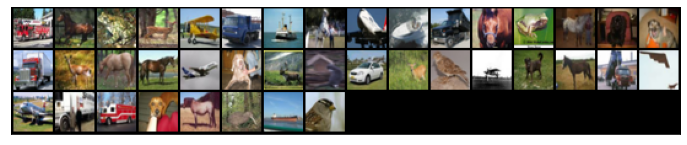

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

show_batch(train_loader)

1b) Create your convolutional neural network.
*   Go to https://dljudge.io/generate + /<YOUR NAME\> or use curl below
*   Save the page as json 
*   Build your CNN architecture based on those modules and hyperparameters
*   Use the right value for 'COMPUTE' 
*   See the example below

In [ ]:
#!curl https://dljudge.io/generate/ABDELBAR -o network1.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2681  100  2681    0     0  37760      0 --:--:-- --:--:-- --:--:-- 37760


In [ ]:
def validate_network(model, input_dict):
    """
    Validate if your network definition is same as provided archtiecture
    """
    output = {}
    i = 1
    for layer in model.children():
        if isinstance(layer, nn.Conv2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Conv2d',
                                                  'kernel_size': layer.kernel_size[0],
                                                   'input': layer.in_channels,
                                                   'output': layer.out_channels,
                                                   'padding': layer.padding[0]}

        if isinstance(layer, nn.ReLU):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'ReLU'}

        if isinstance(layer, nn.MaxPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'MaxPool2d',
                                                  'kernel_size': layer.kernel_size,
                                                  'stride': layer.stride}

        if isinstance(layer, nn.AdaptiveAvgPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'AdaptiveAvgPool2d',
                                                  'output': layer.output_size}

        if isinstance(layer, nn.BatchNorm2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'BatchNorm2d',
                                                  'input': layer.num_features}

        if isinstance(layer, nn.Dropout):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Dropout',
                                                  'p': layer.p}

        if isinstance(layer, nn.Linear):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Linear',
                                                  'input': layer.in_features,
                                                  'output': layer.out_features}

        i += 1

    
    correct = True
    for l in output.keys():
        if l in input_dict:
            inp_kvs = input_dict[l]
            out_kvs = output[l]
            for k in out_kvs:
                if inp_kvs[k] != 'COMPUTE':
                    if out_kvs[k] != inp_kvs[k]:
                        print (f'Error in {l}, {k}!')
                        correct = False

    if correct:
        print ('OK!')

In [ ]:
# *****START CODE 
# Import your individual architecture dictionnary here
fin = open('network1.json', 'r')
my_architecture_dict = json.load(fin)
fin.close()

pprint(my_architecture_dict)
# *****END CODE

{'Layer_001': {'input': 3,
               'kernel_size': 3,
               'output': 66,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_002': {'input': 66, 'type': 'BatchNorm2d'},
 'Layer_003': {'type': 'ReLU'},
 'Layer_004': {'input': 66,
               'kernel_size': 3,
               'output': 66,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_005': {'input': 66, 'type': 'BatchNorm2d'},
 'Layer_006': {'type': 'ReLU'},
 'Layer_007': {'kernel_size': 2, 'stride': 2, 'type': 'MaxPool2d'},
 'Layer_008': {'input': 66,
               'kernel_size': 3,
               'output': 127,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_009': {'input': 127, 'type': 'BatchNorm2d'},
 'Layer_010': {'type': 'ReLU'},
 'Layer_011': {'input': 127,
               'kernel_size': 3,
               'output': 127,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_012': {'input': 127, 'type': 'BatchNorm2d'},
 'Layer_013'

In [ ]:
#This is the architecture that was generated by the URL.

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        self.conv1= nn.Conv2d(3, 66, 3, padding= 1) # 32x32 #L001
        self.batchnorm1 = nn.BatchNorm2d(66) #L002
        self.act1 = nn.ReLU(inplace=False) #L003
        self.conv2 = nn.Conv2d(66,66, 3, padding=1) #L004

        self.batchnorm2 = nn.BatchNorm2d(66) #L005
        self.act2 = nn.ReLU(inplace=False) #L006
        self.pool1 = nn.MaxPool2d(2, stride=2) #L007     16x16
        self.conv3 = nn.Conv2d(66,127,3,padding=1) #L008

        self.batchnorm3 = nn.BatchNorm2d(127)
        self.act3 = nn.ReLU(inplace=False) #10
        self.conv4 = nn.Conv2d(127,127,3,padding=1) 
        self.batchnorm4 = nn.BatchNorm2d(127)

        self.act4 = nn.ReLU(inplace=False)
        self.pool2 = nn.MaxPool2d(2,stride=2)    # 8x8
        self.conv5 = nn.Conv2d(127,252, 3, padding=1) #15
        self.batchnorm5 = nn.BatchNorm2d(252)

        self.act5 = nn.ReLU(inplace=False) #L017
        self.conv6 = nn.Conv2d(252,252, 3, padding=1) #L018
        self.batchnorm6 = nn.BatchNorm2d(252) #L019
        self.act6 = nn.ReLU(inplace=False) #L020

        self.conv7= nn.Conv2d(252,252, 3, padding=1)
        self.batchnorm7 = nn.BatchNorm2d(252)
        self.act7 = nn.ReLU(inplace=False)
        self.pool3 = nn.MaxPool2d(2,stride=2)  #4x4

        self.conv8 = nn.Conv2d(252,510, 3, padding=1) #L025
        self.batchnorm8 = nn.BatchNorm2d(510)
        self.act8= nn.ReLU(inplace=False)
        self.conv9 = nn.Conv2d(510,510, 3, padding=1) 

        self.batchnorm9 = nn.BatchNorm2d(510)
        self.act9 = nn.ReLU(inplace=False) #L030
        self.conv10 = nn.Conv2d(510,510, 3, padding=1)
        self.batchnorm10 = nn.BatchNorm2d(510)

        self.act10 = nn.ReLU(inplace=False)
        self.pool4 = nn.MaxPool2d(2,stride=2)  #2x2
        self.conv11 = nn.Conv2d(510,510, 3, padding=1) #L035
        self.batchnorm11 = nn.BatchNorm2d(510)

        self.act11 = nn.ReLU(inplace=False)
        self.conv12 = nn.Conv2d(510,510, 3, padding=1)
        self.batchnorm12 = nn.BatchNorm2d(510)
        self.act12 = nn.ReLU(inplace=False) #L040

        self.conv13 = nn.Conv2d(510,510, 3, padding=1) #L040
        self.batchnorm13 = nn.BatchNorm2d(510)
        self.act13 = nn.ReLU(inplace=False)
        self.pool5 = nn.MaxPool2d(2,stride=2)  

        self.adaptativeavgpool2d_1 = nn.AdaptiveAvgPool2d(8)  
        self.drop = nn.Dropout(p=0.5006913449946377, inplace=False)
        self.f1 = nn.Linear(in_features= 510*8*8 , out_features= 2145)

        self.act14 = nn.ReLU(inplace=False)
        self.f2 = nn.Linear(in_features = 2145, out_features= 10)


    def forward(self, x):
 
        x= self.conv1(x)
        x= self.batchnorm1(x)
        x= self.act1(x)
        x= self.conv2(x)
     
        x= self.batchnorm2(x)
        x= self.act2(x)
        x= self.pool1(x)
        x= self.conv3(x)

        x= self.batchnorm3(x)
        x= self.act3(x)
        x= self.conv4(x) 
        x= self.batchnorm4(x)

        x= self.act4(x)
        x= self.pool2(x)
        x= self.conv5(x)
        x= self.batchnorm5(x)

        x= self.act5(x)
        x= self.conv6(x)
        x= self.batchnorm6(x)
        x= self.act6(x)
        
        x= self.conv7(x)
        x= self.batchnorm7(x)
        x= self.act7(x)
        x= self.pool3(x)

        x= self.conv8(x)
        x= self.batchnorm8(x)
        x= self.act8(x)
        x= self.conv9(x)

        x= self.batchnorm9(x)
        x= self.act9(x)
        x= self.conv10(x)
        x= self.batchnorm10(x)
        
        x= self.act10(x)
        x= self.pool4(x)
        x= self.conv11(x)
        x= self.batchnorm11(x)

        x= self.act11(x)
        x= self.conv12(x)
        x= self.batchnorm12(x)
        x= self.act12(x)

        x= self.conv13(x)
        x= self.batchnorm13(x)
        x= self.act13(x)
        x= self.pool5(x)

        x= self.adaptativeavgpool2d_1(x)
        x= self.drop(x)
        x = torch.flatten(x, 1)
        x= self.f1(x)
        x= self.act14(x)

        x= self.f2(x)

        return x


      #  return F.log_softmax(x, dim=1)

1c) Create the training scheme
*    Initialize the model
*    Validate the model
*    Specify the training hyperparameters like type of optimizer, criterion and learning rate
*    Specify number of epochs

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = get_default_device()
device

device(type='cuda')

In [ ]:
# *****START CODE
lr = 0.01
model = ConvNet()
validate_network(model, my_architecture_dict)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
criterion= criterion.to(device)
epochs = 100
# *****END CODE

OK!


1d) Plot the train and validation loss curves for the entire training process
*   Validate the model after each epoch
*   Plot both training and validation loss curves
*   Write a small description discussing about the curves. What is the behaviour of the model?

In [ ]:
!pip install torchnet
import torchnet as tnt

     |████████████████████████████████| 676 kB 12.7 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
  Created wheel for torchnet: filename=torchnet-0.0.4-py3-none-any.whl size=29742 sha256=ca3a7eb4acb501730482938edb869b3655a43905982081ee5768689303298034
  Stored in directory: /root/.cache/pip/wheels/93/17/b3/86db1d93e9dae198813aa79831b403e4844d67986cf93894b5
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=1dfd22cbfa960d1d1e9d79ad12c64bfc44b0be4361595946dcf22a3417e26f92
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5709 sha256=3e7aeb0bafe19a2fe6e11e92f29a11982e21d228939dbf763ad7a86d4c1a4334
  Stored in directory: /root/.cache/pip/wheels/ac/5c/3a/a80e1c65880945c71fd833408cd1e9a8cb7e2f8f37620bb75b
Successfully built torchnet visdom torchfile


In [ ]:
confusion_matrix = tnt.meter.ConfusionMeter(10)

In [ ]:
 # *****START CODE

def train_model(net):
      model = net.to(device)
      total_train_losses = []
      total_val_losses = []


      for epoch in range(1,epochs+1):
          ##TRAINING##
          model.train()
          train_losses = []
          confusion_matrix.reset()

          for i, batch, in enumerate(tqdm(train_loader)):
              img_batch, lbl_batch = batch
              img_batch = img_batch.to(device)
              lbl_batch = lbl_batch.to(device)
              ##implement the forward and backward backpropagation
              optimizer.zero_grad()
              output = model(img_batch.float())
              loss=criterion(output, lbl_batch.long())
              loss.backward()
              optimizer.step()

              train_losses.append(loss.item())
              confusion_matrix.add(output.data.squeeze(), lbl_batch.long())

              if i % 100 == 0:
                  print('Train (epoch {}/{}) [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                      epoch, epochs, i, len(train_loader),100.*i/len(train_loader), loss.item()))

          train_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
          train_loss_mean = np.mean(train_losses)
          total_train_losses.append(train_loss_mean)
          confusion_matrix.reset()

          ##VALIDATION##
          model.eval()
          val_losses = []

          for i, batch, in enumerate(tqdm(val_loader)):
              img_batch, lbl_batch = batch
              img_batch = img_batch.to(device)
              lbl_batch = lbl_batch.to(device)
        
              ##pass the images to the model and calculate the loss
              # *****START CODE
              outputs=model(img_batch.float())
              loss=criterion(outputs, lbl_batch.long())
              # *****END CODE

              confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())
              val_losses.append(loss.item())

          print('Confusion Matrix:')
          print(confusion_matrix.conf)

          val_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
          val_loss_mean = np.mean(val_losses)
          total_val_losses.append(val_loss_mean)

          print('TRAIN_LOSS: ', '%.3f' % train_loss_mean, 'TRAIN_ACC: ', '%.3f' % train_acc)
          print('VAL_LOSS: ', '%.3f' % val_loss_mean, 'VAL_ACC: ', '%.3f' % val_acc)
          confusion_matrix.reset()

  # *****END CODE

In [ ]:
train_model(model)

  0%|          | 5/1250 [00:00<00:49, 24.96it/s]

Train (epoch 1/100) [0/1250 (0%)]	Loss: 2.412986


  8%|▊         | 104/1250 [00:03<00:38, 29.49it/s]

Train (epoch 1/100) [100/1250 (8%)]	Loss: 2.018305


 16%|█▋        | 206/1250 [00:07<00:35, 29.32it/s]

Train (epoch 1/100) [200/1250 (16%)]	Loss: 1.845039


 24%|██▍       | 305/1250 [00:10<00:32, 29.42it/s]

Train (epoch 1/100) [300/1250 (24%)]	Loss: 1.468614


 32%|███▏      | 404/1250 [00:13<00:28, 29.52it/s]

Train (epoch 1/100) [400/1250 (32%)]	Loss: 1.631332


 40%|████      | 506/1250 [00:17<00:25, 29.48it/s]

Train (epoch 1/100) [500/1250 (40%)]	Loss: 1.416210


 48%|████▊     | 605/1250 [00:20<00:21, 29.36it/s]

Train (epoch 1/100) [600/1250 (48%)]	Loss: 1.354432


 56%|█████▋    | 704/1250 [00:23<00:18, 29.41it/s]

Train (epoch 1/100) [700/1250 (56%)]	Loss: 1.557678


 64%|██████▍   | 806/1250 [00:27<00:15, 29.30it/s]

Train (epoch 1/100) [800/1250 (64%)]	Loss: 1.360163


 72%|███████▏  | 905/1250 [00:30<00:11, 29.49it/s]

Train (epoch 1/100) [900/1250 (72%)]	Loss: 1.173368


 80%|████████  | 1004/1250 [00:34<00:08, 29.24it/s]

Train (epoch 1/100) [1000/1250 (80%)]	Loss: 1.036024


 88%|████████▊ | 1106/1250 [00:37<00:04, 29.34it/s]

Train (epoch 1/100) [1100/1250 (88%)]	Loss: 1.400025


 96%|█████████▋| 1205/1250 [00:40<00:01, 29.42it/s]

Train (epoch 1/100) [1200/1250 (96%)]	Loss: 1.091805


100%|██████████| 250/250 [00:03<00:00, 76.82it/s]


Confusion Matrix:
[[402  37  31  25   6   4   5   6 461  23]
 [  9 811   2  14   3   2   8   1 126  24]
 [101  13 362 129 139  87  53  17  95   4]
 [ 19  17  53 493  54 228  38  23  69   6]
 [ 31  12  84  81 535  58  35 112  50   2]
 [ 12   4  46 278  36 517  10  48  47   2]
 [  6   5  15 171 173   7 586   4  32   1]
 [ 20   9  29  72  61 120   1 637  20  31]
 [  5  15   1  13   0   1   1   0 955   9]
 [ 14 241   1  44   2   2  13  10 146 527]]
TRAIN_LOSS:  1.531 TRAIN_ACC:  43.790
VAL_LOSS:  1.167 VAL_ACC:  58.250


  0%|          | 3/1250 [00:00<00:44, 28.32it/s]

Train (epoch 2/100) [0/1250 (0%)]	Loss: 1.309153


  8%|▊         | 105/1250 [00:03<00:38, 29.37it/s]

Train (epoch 2/100) [100/1250 (8%)]	Loss: 1.030018


 16%|█▋        | 204/1250 [00:06<00:35, 29.09it/s]

Train (epoch 2/100) [200/1250 (16%)]	Loss: 0.982433


 24%|██▍       | 306/1250 [00:10<00:32, 29.36it/s]

Train (epoch 2/100) [300/1250 (24%)]	Loss: 1.001552


 32%|███▏      | 405/1250 [00:13<00:28, 29.38it/s]

Train (epoch 2/100) [400/1250 (32%)]	Loss: 0.696298


 40%|████      | 504/1250 [00:17<00:25, 29.43it/s]

Train (epoch 2/100) [500/1250 (40%)]	Loss: 0.890505


 48%|████▊     | 606/1250 [00:20<00:21, 29.39it/s]

Train (epoch 2/100) [600/1250 (48%)]	Loss: 1.399320


 56%|█████▋    | 705/1250 [00:23<00:18, 29.49it/s]

Train (epoch 2/100) [700/1250 (56%)]	Loss: 0.725420


 64%|██████▍   | 804/1250 [00:27<00:15, 29.32it/s]

Train (epoch 2/100) [800/1250 (64%)]	Loss: 0.848139


 72%|███████▏  | 906/1250 [00:30<00:11, 29.44it/s]

Train (epoch 2/100) [900/1250 (72%)]	Loss: 1.142155


 80%|████████  | 1005/1250 [00:34<00:08, 29.40it/s]

Train (epoch 2/100) [1000/1250 (80%)]	Loss: 0.720844


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.40it/s]

Train (epoch 2/100) [1100/1250 (88%)]	Loss: 1.031066


 96%|█████████▋| 1206/1250 [00:40<00:01, 29.44it/s]

Train (epoch 2/100) [1200/1250 (96%)]	Loss: 0.720961


100%|██████████| 250/250 [00:03<00:00, 76.88it/s]


Confusion Matrix:
[[740   6 164  17  18   7   4  14  21   9]
 [ 21 851  13  12   3  14   5   6  33  42]
 [ 31   2 709  63  34  90  44  22   1   4]
 [ 16   2  69 534  22 301  20  26  10   0]
 [ 16   2 119 170 512  53  81  42   5   0]
 [  8   1  44 144  18 748   6  31   0   0]
 [  5   1  59 191   2  33 705   1   3   0]
 [  8   1  43  54  47  81   8 757   0   1]
 [118  16  22  26   3   4   4   5 792  10]
 [ 84  85   4  57   3   5   6  28  25 703]]
TRAIN_LOSS:  0.910 TRAIN_ACC:  68.038
VAL_LOSS:  0.858 VAL_ACC:  70.510


  0%|          | 3/1250 [00:00<00:44, 27.92it/s]

Train (epoch 3/100) [0/1250 (0%)]	Loss: 0.427086


  8%|▊         | 105/1250 [00:03<00:38, 29.45it/s]

Train (epoch 3/100) [100/1250 (8%)]	Loss: 0.648843


 16%|█▋        | 204/1250 [00:06<00:35, 29.48it/s]

Train (epoch 3/100) [200/1250 (16%)]	Loss: 0.653921


 24%|██▍       | 306/1250 [00:10<00:32, 29.46it/s]

Train (epoch 3/100) [300/1250 (24%)]	Loss: 0.806847


 32%|███▏      | 405/1250 [00:13<00:28, 29.44it/s]

Train (epoch 3/100) [400/1250 (32%)]	Loss: 0.824112


 40%|████      | 504/1250 [00:17<00:25, 29.26it/s]

Train (epoch 3/100) [500/1250 (40%)]	Loss: 0.625023


 48%|████▊     | 606/1250 [00:20<00:21, 29.47it/s]

Train (epoch 3/100) [600/1250 (48%)]	Loss: 1.148026


 56%|█████▋    | 705/1250 [00:23<00:18, 29.46it/s]

Train (epoch 3/100) [700/1250 (56%)]	Loss: 0.411812


 64%|██████▍   | 804/1250 [00:27<00:15, 29.46it/s]

Train (epoch 3/100) [800/1250 (64%)]	Loss: 0.708010


 72%|███████▏  | 906/1250 [00:30<00:11, 29.39it/s]

Train (epoch 3/100) [900/1250 (72%)]	Loss: 0.655858


 80%|████████  | 1005/1250 [00:34<00:08, 29.31it/s]

Train (epoch 3/100) [1000/1250 (80%)]	Loss: 0.704310


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.34it/s]

Train (epoch 3/100) [1100/1250 (88%)]	Loss: 0.693834


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.21it/s]

Train (epoch 3/100) [1200/1250 (96%)]	Loss: 0.595887


100%|██████████| 250/250 [00:03<00:00, 77.12it/s]


Confusion Matrix:
[[874   0  54  17  13   4   5  13  11   9]
 [120 718   1   3   2   4   9  14  17 112]
 [ 62   1 678  31  55  60  69  36   4   4]
 [ 27   2  64 527  63 174  72  56   8   7]
 [ 28   0  68  28 704  20  76  75   1   0]
 [ 17   2  38 152  36 670  19  63   1   2]
 [ 14   3  31  50  14  30 851   7   0   0]
 [ 23   0  19  26  30  36   5 858   0   3]
 [208   6  15   5   4   2   3   5 732  20]
 [117  12   5   8   6   3  16  41   7 785]]
TRAIN_LOSS:  0.672 TRAIN_ACC:  77.038
VAL_LOSS:  0.762 VAL_ACC:  73.970


  0%|          | 3/1250 [00:00<00:44, 28.32it/s]

Train (epoch 4/100) [0/1250 (0%)]	Loss: 0.534663


  8%|▊         | 105/1250 [00:03<00:38, 29.47it/s]

Train (epoch 4/100) [100/1250 (8%)]	Loss: 0.401768


 16%|█▋        | 204/1250 [00:06<00:35, 29.47it/s]

Train (epoch 4/100) [200/1250 (16%)]	Loss: 0.794173


 24%|██▍       | 306/1250 [00:10<00:31, 29.51it/s]

Train (epoch 4/100) [300/1250 (24%)]	Loss: 0.465534


 32%|███▏      | 405/1250 [00:13<00:28, 29.30it/s]

Train (epoch 4/100) [400/1250 (32%)]	Loss: 0.598262


 40%|████      | 504/1250 [00:17<00:25, 29.23it/s]

Train (epoch 4/100) [500/1250 (40%)]	Loss: 0.695170


 48%|████▊     | 606/1250 [00:20<00:22, 29.27it/s]

Train (epoch 4/100) [600/1250 (48%)]	Loss: 0.612276


 56%|█████▋    | 705/1250 [00:23<00:18, 29.42it/s]

Train (epoch 4/100) [700/1250 (56%)]	Loss: 0.487629


 64%|██████▍   | 804/1250 [00:27<00:15, 29.39it/s]

Train (epoch 4/100) [800/1250 (64%)]	Loss: 0.725787


 72%|███████▏  | 906/1250 [00:30<00:11, 29.39it/s]

Train (epoch 4/100) [900/1250 (72%)]	Loss: 0.942425


 80%|████████  | 1005/1250 [00:34<00:08, 29.32it/s]

Train (epoch 4/100) [1000/1250 (80%)]	Loss: 0.465370


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.48it/s]

Train (epoch 4/100) [1100/1250 (88%)]	Loss: 0.515166


 96%|█████████▋| 1206/1250 [00:40<00:01, 29.37it/s]

Train (epoch 4/100) [1200/1250 (96%)]	Loss: 0.693182


100%|██████████| 250/250 [00:03<00:00, 77.21it/s]


Confusion Matrix:
[[803   5  81  20   9   1   4  10  40  27]
 [ 16 851   7  11   0   2   4   0  26  83]
 [ 39   1 751  48  57  18  59  19   4   4]
 [ 13   3  80 710  32  58  59  34   9   2]
 [ 14   0  50  60 759  16  31  64   4   2]
 [  9   0  52 270  36 547  26  54   4   2]
 [  4   1  18  65  16   2 890   2   2   0]
 [  6   0  31  55  33  10   5 855   2   3]
 [ 53  14  15  13   1   0   6   0 888  10]
 [ 23  35   9  23   2   1   8   3  34 862]]
TRAIN_LOSS:  0.515 TRAIN_ACC:  82.368
VAL_LOSS:  0.607 VAL_ACC:  79.160


  0%|          | 3/1250 [00:00<00:44, 28.30it/s]

Train (epoch 5/100) [0/1250 (0%)]	Loss: 0.485081


  8%|▊         | 105/1250 [00:03<00:38, 29.47it/s]

Train (epoch 5/100) [100/1250 (8%)]	Loss: 0.431902


 16%|█▋        | 204/1250 [00:06<00:35, 29.42it/s]

Train (epoch 5/100) [200/1250 (16%)]	Loss: 0.689487


 24%|██▍       | 306/1250 [00:10<00:32, 29.36it/s]

Train (epoch 5/100) [300/1250 (24%)]	Loss: 0.365121


 32%|███▏      | 405/1250 [00:13<00:28, 29.44it/s]

Train (epoch 5/100) [400/1250 (32%)]	Loss: 0.288101


 40%|████      | 504/1250 [00:17<00:25, 29.38it/s]

Train (epoch 5/100) [500/1250 (40%)]	Loss: 0.372921


 48%|████▊     | 606/1250 [00:20<00:21, 29.37it/s]

Train (epoch 5/100) [600/1250 (48%)]	Loss: 0.285814


 56%|█████▋    | 705/1250 [00:23<00:18, 29.33it/s]

Train (epoch 5/100) [700/1250 (56%)]	Loss: 0.316683


 64%|██████▍   | 804/1250 [00:27<00:15, 29.46it/s]

Train (epoch 5/100) [800/1250 (64%)]	Loss: 0.345255


 72%|███████▏  | 906/1250 [00:30<00:11, 29.42it/s]

Train (epoch 5/100) [900/1250 (72%)]	Loss: 0.456920


 80%|████████  | 1005/1250 [00:34<00:08, 29.41it/s]

Train (epoch 5/100) [1000/1250 (80%)]	Loss: 0.448506


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.46it/s]

Train (epoch 5/100) [1100/1250 (88%)]	Loss: 0.236519


 96%|█████████▋| 1206/1250 [00:40<00:01, 29.37it/s]

Train (epoch 5/100) [1200/1250 (96%)]	Loss: 0.450841


100%|██████████| 250/250 [00:03<00:00, 77.37it/s]


Confusion Matrix:
[[769  10  14  28  32   1   4   8 115  19]
 [  9 902   0   8   3   3   5   3  19  48]
 [ 93   2 627  51 114  25  43  25  11   9]
 [ 30   3  40 714  66  47  43  44  11   2]
 [ 12   2  19  45 857   5  25  29   6   0]
 [ 12   3  27 253  63 567  16  59   0   0]
 [ 14   6  23  62  27   5 855   3   4   1]
 [  9   1   7  41  55  10   1 874   0   2]
 [ 19  19   5  20  10   0   1   3 902  21]
 [ 33  39   5  17   5   1  12  13  11 864]]
TRAIN_LOSS:  0.401 TRAIN_ACC:  86.372
VAL_LOSS:  0.641 VAL_ACC:  79.310


  0%|          | 3/1250 [00:00<00:45, 27.36it/s]

Train (epoch 6/100) [0/1250 (0%)]	Loss: 0.307386


  8%|▊         | 105/1250 [00:03<00:39, 29.24it/s]

Train (epoch 6/100) [100/1250 (8%)]	Loss: 0.289306


 16%|█▋        | 204/1250 [00:06<00:35, 29.26it/s]

Train (epoch 6/100) [200/1250 (16%)]	Loss: 0.171981


 24%|██▍       | 306/1250 [00:10<00:32, 29.28it/s]

Train (epoch 6/100) [300/1250 (24%)]	Loss: 0.415725


 32%|███▏      | 405/1250 [00:13<00:28, 29.39it/s]

Train (epoch 6/100) [400/1250 (32%)]	Loss: 0.280131


 40%|████      | 504/1250 [00:17<00:25, 29.35it/s]

Train (epoch 6/100) [500/1250 (40%)]	Loss: 0.314893


 48%|████▊     | 606/1250 [00:20<00:21, 29.45it/s]

Train (epoch 6/100) [600/1250 (48%)]	Loss: 0.298431


 56%|█████▋    | 705/1250 [00:23<00:18, 29.39it/s]

Train (epoch 6/100) [700/1250 (56%)]	Loss: 0.232317


 64%|██████▍   | 804/1250 [00:27<00:15, 29.29it/s]

Train (epoch 6/100) [800/1250 (64%)]	Loss: 0.285852


 72%|███████▏  | 906/1250 [00:30<00:11, 29.45it/s]

Train (epoch 6/100) [900/1250 (72%)]	Loss: 0.415932


 80%|████████  | 1005/1250 [00:34<00:08, 28.98it/s]

Train (epoch 6/100) [1000/1250 (80%)]	Loss: 0.441093


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.35it/s]

Train (epoch 6/100) [1100/1250 (88%)]	Loss: 0.120166


 96%|█████████▋| 1206/1250 [00:40<00:01, 29.22it/s]

Train (epoch 6/100) [1200/1250 (96%)]	Loss: 0.131272


100%|██████████| 250/250 [00:03<00:00, 76.18it/s]


Confusion Matrix:
[[839  14  29  18  10   4   3   3  51  29]
 [  2 920   1   0   0   0   1   0  27  49]
 [ 48   3 740  51  40  36  39  20  12  11]
 [ 15  12  40 665  34 123  38  23  23  27]
 [ 10   4  69  53 760  13  40  36  11   4]
 [  6   9  38 140  40 685  27  31  13  11]
 [  2   7  34  64   8   4 865   3   7   6]
 [ 17  10  29  35  33  25   2 825   6  18]
 [ 27   9   6   7   2   0   1   1 939   8]
 [ 22  64   5   6   0   1   1   4  20 877]]
TRAIN_LOSS:  0.312 TRAIN_ACC:  89.414
VAL_LOSS:  0.582 VAL_ACC:  81.150


  0%|          | 3/1250 [00:00<00:45, 27.25it/s]

Train (epoch 7/100) [0/1250 (0%)]	Loss: 0.315454


  8%|▊         | 105/1250 [00:03<00:38, 29.38it/s]

Train (epoch 7/100) [100/1250 (8%)]	Loss: 0.103922


 16%|█▋        | 204/1250 [00:06<00:35, 29.53it/s]

Train (epoch 7/100) [200/1250 (16%)]	Loss: 0.392428


 24%|██▍       | 306/1250 [00:10<00:32, 29.34it/s]

Train (epoch 7/100) [300/1250 (24%)]	Loss: 0.137948


 32%|███▏      | 405/1250 [00:13<00:28, 29.32it/s]

Train (epoch 7/100) [400/1250 (32%)]	Loss: 0.189470


 40%|████      | 504/1250 [00:17<00:25, 29.47it/s]

Train (epoch 7/100) [500/1250 (40%)]	Loss: 0.145013


 48%|████▊     | 606/1250 [00:20<00:22, 29.14it/s]

Train (epoch 7/100) [600/1250 (48%)]	Loss: 0.193118


 56%|█████▋    | 705/1250 [00:23<00:18, 29.46it/s]

Train (epoch 7/100) [700/1250 (56%)]	Loss: 0.156120


 64%|██████▍   | 804/1250 [00:27<00:15, 29.45it/s]

Train (epoch 7/100) [800/1250 (64%)]	Loss: 0.392726


 72%|███████▏  | 906/1250 [00:30<00:11, 29.37it/s]

Train (epoch 7/100) [900/1250 (72%)]	Loss: 0.318413


 80%|████████  | 1005/1250 [00:34<00:08, 29.44it/s]

Train (epoch 7/100) [1000/1250 (80%)]	Loss: 0.154932


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.39it/s]

Train (epoch 7/100) [1100/1250 (88%)]	Loss: 0.259257


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.43it/s]

Train (epoch 7/100) [1200/1250 (96%)]	Loss: 0.488212


100%|██████████| 250/250 [00:03<00:00, 77.19it/s]


Confusion Matrix:
[[833   9  36  26  10  14  11   7  20  34]
 [  6 854   0   2   2   7  20   0  15  94]
 [ 42   0 765  18  49  57  44  15   4   6]
 [  9   2  64 492  46 261  92  15   4  15]
 [ 17   2  71  34 787  29  31  25   1   3]
 [  6   1  40  62  30 815  27  17   1   1]
 [  2   2  28  26  10  17 911   4   0   0]
 [  7   0  39  21  42  90   5 777   0  19]
 [ 72  17   8   7   2   6  14   2 841  31]
 [ 19  18   8   4   2   5  31   1  10 902]]
TRAIN_LOSS:  0.245 TRAIN_ACC:  91.568
VAL_LOSS:  0.668 VAL_ACC:  79.770


  0%|          | 3/1250 [00:00<00:44, 28.11it/s]

Train (epoch 8/100) [0/1250 (0%)]	Loss: 0.158125


  8%|▊         | 105/1250 [00:03<00:39, 29.32it/s]

Train (epoch 8/100) [100/1250 (8%)]	Loss: 0.201956


 16%|█▋        | 204/1250 [00:06<00:35, 29.51it/s]

Train (epoch 8/100) [200/1250 (16%)]	Loss: 0.375179


 24%|██▍       | 306/1250 [00:10<00:31, 29.53it/s]

Train (epoch 8/100) [300/1250 (24%)]	Loss: 0.252117


 32%|███▏      | 405/1250 [00:13<00:28, 29.37it/s]

Train (epoch 8/100) [400/1250 (32%)]	Loss: 0.096325


 40%|████      | 504/1250 [00:17<00:25, 29.42it/s]

Train (epoch 8/100) [500/1250 (40%)]	Loss: 0.044908


 48%|████▊     | 606/1250 [00:20<00:21, 29.41it/s]

Train (epoch 8/100) [600/1250 (48%)]	Loss: 0.085365


 56%|█████▋    | 705/1250 [00:23<00:18, 29.42it/s]

Train (epoch 8/100) [700/1250 (56%)]	Loss: 0.187398


 64%|██████▍   | 804/1250 [00:27<00:15, 29.31it/s]

Train (epoch 8/100) [800/1250 (64%)]	Loss: 0.269645


 72%|███████▏  | 906/1250 [00:30<00:11, 29.17it/s]

Train (epoch 8/100) [900/1250 (72%)]	Loss: 0.209665


 80%|████████  | 1005/1250 [00:34<00:08, 29.40it/s]

Train (epoch 8/100) [1000/1250 (80%)]	Loss: 0.251142


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.49it/s]

Train (epoch 8/100) [1100/1250 (88%)]	Loss: 0.214957


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.46it/s]

Train (epoch 8/100) [1200/1250 (96%)]	Loss: 0.164076


100%|██████████| 250/250 [00:03<00:00, 76.67it/s]


Confusion Matrix:
[[795  23  24  18  23   3  31   6  67  10]
 [  5 933   0   2   3   2   5   1  19  30]
 [ 55   5 620  41  93  39 108  22  15   2]
 [  9  13  21 650  48 100 127  13  15   4]
 [ 11   3  20  41 854  14  40  12   4   1]
 [  9   5  16 170  40 674  57  27   1   1]
 [  2   6   6  27  18   2 934   2   2   1]
 [ 15   4   3  47  62  16  13 829   6   5]
 [ 17  20   4   7   4   0   8   0 934   6]
 [ 27  87   4  11   3   1  14   4  34 815]]
TRAIN_LOSS:  0.191 TRAIN_ACC:  93.590
VAL_LOSS:  0.685 VAL_ACC:  80.380


  0%|          | 3/1250 [00:00<00:44, 27.92it/s]

Train (epoch 9/100) [0/1250 (0%)]	Loss: 0.023603


  8%|▊         | 105/1250 [00:03<00:39, 29.30it/s]

Train (epoch 9/100) [100/1250 (8%)]	Loss: 0.111114


 16%|█▋        | 204/1250 [00:06<00:35, 29.43it/s]

Train (epoch 9/100) [200/1250 (16%)]	Loss: 0.195594


 24%|██▍       | 306/1250 [00:10<00:32, 29.32it/s]

Train (epoch 9/100) [300/1250 (24%)]	Loss: 0.595214


 32%|███▏      | 405/1250 [00:13<00:28, 29.42it/s]

Train (epoch 9/100) [400/1250 (32%)]	Loss: 0.324420


 40%|████      | 504/1250 [00:17<00:25, 29.40it/s]

Train (epoch 9/100) [500/1250 (40%)]	Loss: 0.296456


 48%|████▊     | 606/1250 [00:20<00:21, 29.34it/s]

Train (epoch 9/100) [600/1250 (48%)]	Loss: 0.248118


 56%|█████▋    | 705/1250 [00:24<00:18, 29.34it/s]

Train (epoch 9/100) [700/1250 (56%)]	Loss: 0.337661


 64%|██████▍   | 804/1250 [00:27<00:15, 29.32it/s]

Train (epoch 9/100) [800/1250 (64%)]	Loss: 0.043168


 72%|███████▏  | 906/1250 [00:30<00:11, 29.33it/s]

Train (epoch 9/100) [900/1250 (72%)]	Loss: 0.053919


 80%|████████  | 1005/1250 [00:34<00:08, 29.45it/s]

Train (epoch 9/100) [1000/1250 (80%)]	Loss: 0.266544


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.55it/s]

Train (epoch 9/100) [1100/1250 (88%)]	Loss: 0.213491


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.43it/s]

Train (epoch 9/100) [1200/1250 (96%)]	Loss: 0.185400


100%|██████████| 250/250 [00:03<00:00, 76.99it/s]


Confusion Matrix:
[[774   5  24  30  22  16   4  12  61  52]
 [  6 838   0   1   3   8   2   3  31 108]
 [ 47   2 629  74  69  92  37  26  14  10]
 [  4   1  25 613  37 254  19  23  18   6]
 [  7   1  22  57 815  37  11  38   7   5]
 [  4   0   7  87  30 826   6  31   4   5]
 [  1   2  17 114  37  33 777   2   9   8]
 [  2   1   7  42  33  54   2 849   6   4]
 [ 15   6   5  10   3   3   2   5 927  24]
 [  7  14   3  10   2   5   1   6  21 931]]
TRAIN_LOSS:  0.153 TRAIN_ACC:  94.754
VAL_LOSS:  0.770 VAL_ACC:  79.790


  0%|          | 3/1250 [00:00<00:44, 27.88it/s]

Train (epoch 10/100) [0/1250 (0%)]	Loss: 0.127398


  8%|▊         | 105/1250 [00:03<00:38, 29.52it/s]

Train (epoch 10/100) [100/1250 (8%)]	Loss: 0.062176


 16%|█▋        | 204/1250 [00:06<00:35, 29.55it/s]

Train (epoch 10/100) [200/1250 (16%)]	Loss: 0.076319


 24%|██▍       | 306/1250 [00:10<00:32, 29.43it/s]

Train (epoch 10/100) [300/1250 (24%)]	Loss: 0.036043


 32%|███▏      | 405/1250 [00:13<00:28, 29.49it/s]

Train (epoch 10/100) [400/1250 (32%)]	Loss: 0.234242


 40%|████      | 504/1250 [00:17<00:25, 29.34it/s]

Train (epoch 10/100) [500/1250 (40%)]	Loss: 0.100029


 48%|████▊     | 606/1250 [00:20<00:21, 29.55it/s]

Train (epoch 10/100) [600/1250 (48%)]	Loss: 0.124308


 56%|█████▋    | 705/1250 [00:23<00:18, 29.47it/s]

Train (epoch 10/100) [700/1250 (56%)]	Loss: 0.173123


 64%|██████▍   | 804/1250 [00:27<00:15, 29.20it/s]

Train (epoch 10/100) [800/1250 (64%)]	Loss: 0.449839


 72%|███████▏  | 906/1250 [00:30<00:11, 29.43it/s]

Train (epoch 10/100) [900/1250 (72%)]	Loss: 0.211296


 80%|████████  | 1005/1250 [00:34<00:08, 29.40it/s]

Train (epoch 10/100) [1000/1250 (80%)]	Loss: 0.104965


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.32it/s]

Train (epoch 10/100) [1100/1250 (88%)]	Loss: 0.090329


 96%|█████████▋| 1206/1250 [00:40<00:01, 29.36it/s]

Train (epoch 10/100) [1200/1250 (96%)]	Loss: 0.048442


100%|██████████| 250/250 [00:03<00:00, 76.99it/s]


Confusion Matrix:
[[866   5  61  14   6   3   5   0  17  23]
 [ 21 813   4   5   1   3   7   0   8 138]
 [ 30   2 849  30  26  37  14   6   1   5]
 [ 18   3 110 582  28 220  21   7   3   8]
 [ 36   1 103  33 742  41  23  17   1   3]
 [ 15   1  68  86  28 787   4   6   0   5]
 [  6   2  78  56   9  38 806   1   1   3]
 [ 41   2  73  38  41  74   1 708   0  22]
 [ 77   9  25  16   0   7   9   1 832  24]
 [ 36  12  10   7   1   4   3   0   4 923]]
TRAIN_LOSS:  0.124 TRAIN_ACC:  95.712
VAL_LOSS:  0.809 VAL_ACC:  79.080


  0%|          | 3/1250 [00:00<00:44, 28.04it/s]

Train (epoch 11/100) [0/1250 (0%)]	Loss: 0.162031


  8%|▊         | 105/1250 [00:03<00:39, 29.32it/s]

Train (epoch 11/100) [100/1250 (8%)]	Loss: 0.220139


 16%|█▋        | 204/1250 [00:06<00:35, 29.51it/s]

Train (epoch 11/100) [200/1250 (16%)]	Loss: 0.140731


 24%|██▍       | 306/1250 [00:10<00:32, 29.50it/s]

Train (epoch 11/100) [300/1250 (24%)]	Loss: 0.041102


 32%|███▏      | 405/1250 [00:13<00:28, 29.48it/s]

Train (epoch 11/100) [400/1250 (32%)]	Loss: 0.103924


 40%|████      | 504/1250 [00:17<00:25, 29.44it/s]

Train (epoch 11/100) [500/1250 (40%)]	Loss: 0.046042


 48%|████▊     | 606/1250 [00:20<00:21, 29.49it/s]

Train (epoch 11/100) [600/1250 (48%)]	Loss: 0.181460


 56%|█████▋    | 705/1250 [00:23<00:18, 29.50it/s]

Train (epoch 11/100) [700/1250 (56%)]	Loss: 0.088791


 64%|██████▍   | 804/1250 [00:27<00:15, 29.52it/s]

Train (epoch 11/100) [800/1250 (64%)]	Loss: 0.073291


 72%|███████▏  | 906/1250 [00:30<00:11, 29.40it/s]

Train (epoch 11/100) [900/1250 (72%)]	Loss: 0.055695


 80%|████████  | 1005/1250 [00:34<00:08, 29.34it/s]

Train (epoch 11/100) [1000/1250 (80%)]	Loss: 0.148372


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.53it/s]

Train (epoch 11/100) [1100/1250 (88%)]	Loss: 0.107884


 96%|█████████▋| 1206/1250 [00:40<00:01, 29.31it/s]

Train (epoch 11/100) [1200/1250 (96%)]	Loss: 0.026460


100%|██████████| 250/250 [00:03<00:00, 76.95it/s]


Confusion Matrix:
[[921   7  30   7   3   3   3   3  23   0]
 [ 36 908   2   1   1   2   8   2  30  10]
 [ 54   0 805  39  29  19  29  21   3   1]
 [ 44   2  72 663  26 107  40  30  16   0]
 [ 31   1  76  56 739  21  42  27   5   2]
 [ 18   2  47 138  29 709  20  33   4   0]
 [  6   0  47  29   6  11 891   6   3   1]
 [ 36   2  30  27  32  30   2 833   8   0]
 [ 54   9   8   7   0   4   2   1 912   3]
 [117  97  13   6   1   1  18   5  43 699]]
TRAIN_LOSS:  0.105 TRAIN_ACC:  96.388
VAL_LOSS:  0.749 VAL_ACC:  80.800


  0%|          | 3/1250 [00:00<00:44, 28.23it/s]

Train (epoch 12/100) [0/1250 (0%)]	Loss: 0.023998


  8%|▊         | 105/1250 [00:03<00:39, 29.17it/s]

Train (epoch 12/100) [100/1250 (8%)]	Loss: 0.016105


 16%|█▋        | 204/1250 [00:06<00:35, 29.34it/s]

Train (epoch 12/100) [200/1250 (16%)]	Loss: 0.007265


 24%|██▍       | 306/1250 [00:10<00:31, 29.51it/s]

Train (epoch 12/100) [300/1250 (24%)]	Loss: 0.017661


 32%|███▏      | 405/1250 [00:13<00:28, 29.26it/s]

Train (epoch 12/100) [400/1250 (32%)]	Loss: 0.064545


 40%|████      | 504/1250 [00:17<00:25, 29.35it/s]

Train (epoch 12/100) [500/1250 (40%)]	Loss: 0.055677


 48%|████▊     | 606/1250 [00:20<00:21, 29.38it/s]

Train (epoch 12/100) [600/1250 (48%)]	Loss: 0.060170


 56%|█████▋    | 705/1250 [00:24<00:18, 29.34it/s]

Train (epoch 12/100) [700/1250 (56%)]	Loss: 0.006683


 64%|██████▍   | 804/1250 [00:27<00:15, 29.25it/s]

Train (epoch 12/100) [800/1250 (64%)]	Loss: 0.059315


 72%|███████▏  | 906/1250 [00:30<00:11, 29.34it/s]

Train (epoch 12/100) [900/1250 (72%)]	Loss: 0.106488


 80%|████████  | 1005/1250 [00:34<00:08, 29.35it/s]

Train (epoch 12/100) [1000/1250 (80%)]	Loss: 0.083526


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.39it/s]

Train (epoch 12/100) [1100/1250 (88%)]	Loss: 0.137369


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.29it/s]

Train (epoch 12/100) [1200/1250 (96%)]	Loss: 0.011423


100%|██████████| 250/250 [00:03<00:00, 76.66it/s]


Confusion Matrix:
[[861  15  16  18   9   5   4   9  28  35]
 [  5 945   0   2   1   1   2   0   6  38]
 [ 53   6 621  89  88  59  19  41  11  13]
 [ 10   9  14 710  38 125  21  38  15  20]
 [ 19   2  10  52 844  23   4  38   1   7]
 [  6   6   5 134  31 758   5  48   1   6]
 [  5   7  14  69  49  16 810   6  12  12]
 [  5   4   5  25  37  21   0 887   0  16]
 [ 38  23   2   6   3   2   1   4 892  29]
 [ 10  62   3   3   1   0   1   5   7 908]]
TRAIN_LOSS:  0.083 TRAIN_ACC:  97.136
VAL_LOSS:  0.753 VAL_ACC:  82.360


  0%|          | 3/1250 [00:00<00:43, 28.49it/s]

Train (epoch 13/100) [0/1250 (0%)]	Loss: 0.020886


  8%|▊         | 105/1250 [00:03<00:39, 29.33it/s]

Train (epoch 13/100) [100/1250 (8%)]	Loss: 0.006563


 16%|█▋        | 204/1250 [00:06<00:35, 29.25it/s]

Train (epoch 13/100) [200/1250 (16%)]	Loss: 0.025397


 24%|██▍       | 306/1250 [00:10<00:32, 29.45it/s]

Train (epoch 13/100) [300/1250 (24%)]	Loss: 0.009304


 32%|███▏      | 405/1250 [00:13<00:29, 29.12it/s]

Train (epoch 13/100) [400/1250 (32%)]	Loss: 0.014172


 40%|████      | 504/1250 [00:17<00:25, 29.38it/s]

Train (epoch 13/100) [500/1250 (40%)]	Loss: 0.110502


 48%|████▊     | 606/1250 [00:20<00:21, 29.35it/s]

Train (epoch 13/100) [600/1250 (48%)]	Loss: 0.119049


 56%|█████▋    | 705/1250 [00:24<00:18, 29.25it/s]

Train (epoch 13/100) [700/1250 (56%)]	Loss: 0.006644


 64%|██████▍   | 804/1250 [00:27<00:15, 29.39it/s]

Train (epoch 13/100) [800/1250 (64%)]	Loss: 0.121470


 72%|███████▏  | 906/1250 [00:30<00:11, 29.30it/s]

Train (epoch 13/100) [900/1250 (72%)]	Loss: 0.072107


 80%|████████  | 1005/1250 [00:34<00:08, 29.32it/s]

Train (epoch 13/100) [1000/1250 (80%)]	Loss: 0.084621


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.12it/s]

Train (epoch 13/100) [1100/1250 (88%)]	Loss: 0.073874


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.39it/s]

Train (epoch 13/100) [1200/1250 (96%)]	Loss: 0.021228


100%|██████████| 250/250 [00:03<00:00, 76.62it/s]


Confusion Matrix:
[[860   9  39  11  10   4   4   2  34  27]
 [ 11 904   1   4   3   3   7   0  14  53]
 [ 32   2 740  52  50  56  51   7   4   6]
 [  8   2  34 649  41 196  42   8  10  10]
 [ 12   1  38  45 821  26  34  15   3   5]
 [  4   0  16 104  34 811  12  15   1   3]
 [  2   3  15  44  14  16 901   0   2   3]
 [  8   4  24  39  65  88  12 738   3  19]
 [ 29  14   6   8   3   3   4   1 919  13]
 [ 18  45   4   6   3   3   8   2  17 894]]
TRAIN_LOSS:  0.069 TRAIN_ACC:  97.632
VAL_LOSS:  0.737 VAL_ACC:  82.370


  0%|          | 3/1250 [00:00<00:45, 27.38it/s]

Train (epoch 14/100) [0/1250 (0%)]	Loss: 0.015464


  8%|▊         | 105/1250 [00:03<00:39, 29.34it/s]

Train (epoch 14/100) [100/1250 (8%)]	Loss: 0.084724


 16%|█▋        | 204/1250 [00:06<00:35, 29.23it/s]

Train (epoch 14/100) [200/1250 (16%)]	Loss: 0.003998


 24%|██▍       | 306/1250 [00:10<00:32, 29.25it/s]

Train (epoch 14/100) [300/1250 (24%)]	Loss: 0.010187


 32%|███▏      | 405/1250 [00:13<00:28, 29.27it/s]

Train (epoch 14/100) [400/1250 (32%)]	Loss: 0.225766


 40%|████      | 504/1250 [00:17<00:25, 29.39it/s]

Train (epoch 14/100) [500/1250 (40%)]	Loss: 0.044819


 48%|████▊     | 606/1250 [00:20<00:21, 29.32it/s]

Train (epoch 14/100) [600/1250 (48%)]	Loss: 0.051815


 56%|█████▋    | 705/1250 [00:24<00:18, 29.39it/s]

Train (epoch 14/100) [700/1250 (56%)]	Loss: 0.077499


 64%|██████▍   | 804/1250 [00:27<00:15, 29.27it/s]

Train (epoch 14/100) [800/1250 (64%)]	Loss: 0.029909


 72%|███████▏  | 906/1250 [00:30<00:11, 29.53it/s]

Train (epoch 14/100) [900/1250 (72%)]	Loss: 0.041419


 80%|████████  | 1005/1250 [00:34<00:08, 29.26it/s]

Train (epoch 14/100) [1000/1250 (80%)]	Loss: 0.093935


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.30it/s]

Train (epoch 14/100) [1100/1250 (88%)]	Loss: 0.205541


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.40it/s]

Train (epoch 14/100) [1200/1250 (96%)]	Loss: 0.021648


100%|██████████| 250/250 [00:03<00:00, 76.50it/s]


Confusion Matrix:
[[836  10  52  28  11   9  12   7  28   7]
 [  9 938   4   7   3   2   3   0  16  18]
 [ 34   2 785  48  39  46  24  20   2   0]
 [ 14   4  44 641  42 190  30  25   5   5]
 [ 11   1  51  44 814  32  22  23   1   1]
 [  4   1  26  77  35 821   6  29   0   1]
 [  4   1  23  39  27  23 876   6   1   0]
 [  5   2  24  24  34  31   0 876   0   4]
 [ 41  11  15  14   2   9   8   1 895   4]
 [ 33  93   8   5   3   5  12   9  18 814]]
TRAIN_LOSS:  0.058 TRAIN_ACC:  98.090
VAL_LOSS:  0.759 VAL_ACC:  82.960


  0%|          | 3/1250 [00:00<00:45, 27.62it/s]

Train (epoch 15/100) [0/1250 (0%)]	Loss: 0.012783


  8%|▊         | 105/1250 [00:03<00:38, 29.43it/s]

Train (epoch 15/100) [100/1250 (8%)]	Loss: 0.008305


 16%|█▋        | 204/1250 [00:06<00:35, 29.26it/s]

Train (epoch 15/100) [200/1250 (16%)]	Loss: 0.010562


 24%|██▍       | 306/1250 [00:10<00:32, 29.46it/s]

Train (epoch 15/100) [300/1250 (24%)]	Loss: 0.004188


 32%|███▏      | 405/1250 [00:13<00:28, 29.40it/s]

Train (epoch 15/100) [400/1250 (32%)]	Loss: 0.001873


 40%|████      | 504/1250 [00:17<00:25, 29.37it/s]

Train (epoch 15/100) [500/1250 (40%)]	Loss: 0.003471


 48%|████▊     | 606/1250 [00:20<00:21, 29.36it/s]

Train (epoch 15/100) [600/1250 (48%)]	Loss: 0.003481


 56%|█████▋    | 705/1250 [00:24<00:18, 29.27it/s]

Train (epoch 15/100) [700/1250 (56%)]	Loss: 0.151250


 64%|██████▍   | 804/1250 [00:27<00:15, 29.16it/s]

Train (epoch 15/100) [800/1250 (64%)]	Loss: 0.014798


 72%|███████▏  | 906/1250 [00:30<00:11, 29.38it/s]

Train (epoch 15/100) [900/1250 (72%)]	Loss: 0.038314


 80%|████████  | 1005/1250 [00:34<00:08, 29.03it/s]

Train (epoch 15/100) [1000/1250 (80%)]	Loss: 0.002710


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.45it/s]

Train (epoch 15/100) [1100/1250 (88%)]	Loss: 0.010468


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.39it/s]

Train (epoch 15/100) [1200/1250 (96%)]	Loss: 0.008901


100%|██████████| 250/250 [00:03<00:00, 76.33it/s]


Confusion Matrix:
[[933  11   9   5   4   5   0   1  26   6]
 [ 17 945   2   1   2   3   1   0  10  19]
 [108   4 702  35  44  60  26  12   8   1]
 [ 53   6  36 672  42 126  30  19   8   8]
 [ 35   2  53  31 799  40  18  18   3   1]
 [ 26   1  17 115  27 780   8  22   3   1]
 [ 28   4  21  35  16  17 871   3   3   2]
 [ 38   4  14  27  50  46   2 808   5   6]
 [ 61  16   6   6   1   4   3   2 894   7]
 [ 54  94   3   4   2   5   5   7  12 814]]
TRAIN_LOSS:  0.052 TRAIN_ACC:  98.194
VAL_LOSS:  0.835 VAL_ACC:  82.180


  0%|          | 3/1250 [00:00<00:45, 27.31it/s]

Train (epoch 16/100) [0/1250 (0%)]	Loss: 0.002630


  8%|▊         | 105/1250 [00:03<00:38, 29.37it/s]

Train (epoch 16/100) [100/1250 (8%)]	Loss: 0.002276


 16%|█▋        | 204/1250 [00:06<00:35, 29.39it/s]

Train (epoch 16/100) [200/1250 (16%)]	Loss: 0.000872


 24%|██▍       | 306/1250 [00:10<00:32, 29.26it/s]

Train (epoch 16/100) [300/1250 (24%)]	Loss: 0.000792


 32%|███▏      | 405/1250 [00:13<00:29, 29.13it/s]

Train (epoch 16/100) [400/1250 (32%)]	Loss: 0.003340


 40%|████      | 504/1250 [00:17<00:25, 29.35it/s]

Train (epoch 16/100) [500/1250 (40%)]	Loss: 0.005020


 48%|████▊     | 606/1250 [00:20<00:22, 29.24it/s]

Train (epoch 16/100) [600/1250 (48%)]	Loss: 0.028369


 56%|█████▋    | 705/1250 [00:24<00:18, 29.44it/s]

Train (epoch 16/100) [700/1250 (56%)]	Loss: 0.106381


 64%|██████▍   | 804/1250 [00:27<00:15, 29.20it/s]

Train (epoch 16/100) [800/1250 (64%)]	Loss: 0.012571


 72%|███████▏  | 906/1250 [00:30<00:11, 29.35it/s]

Train (epoch 16/100) [900/1250 (72%)]	Loss: 0.070140


 80%|████████  | 1005/1250 [00:34<00:08, 29.28it/s]

Train (epoch 16/100) [1000/1250 (80%)]	Loss: 0.049049


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.36it/s]

Train (epoch 16/100) [1100/1250 (88%)]	Loss: 0.025385


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.40it/s]

Train (epoch 16/100) [1200/1250 (96%)]	Loss: 0.028683


100%|██████████| 250/250 [00:03<00:00, 76.63it/s]


Confusion Matrix:
[[904  13  14  12   4   1   1   7  22  22]
 [  8 903   1   5   2   3   6   0  12  60]
 [ 68   3 725  55  39  27  42  29   6   6]
 [ 33   7  37 682  39  80  61  29  14  18]
 [ 28   2  53  58 746  13  19  69   7   5]
 [ 21   3  31 167  29 685  21  32   3   8]
 [ 16   3  17  31  20   5 900   5   1   2]
 [ 13   4   8  40  14  17   3 878   2  21]
 [ 38   7   4   7   3   0   4   2 918  17]
 [ 13  31   1   8   1   0   7   4  20 915]]
TRAIN_LOSS:  0.047 TRAIN_ACC:  98.400
VAL_LOSS:  0.763 VAL_ACC:  82.560


  0%|          | 3/1250 [00:00<00:45, 27.44it/s]

Train (epoch 17/100) [0/1250 (0%)]	Loss: 0.006628


  8%|▊         | 105/1250 [00:03<00:38, 29.38it/s]

Train (epoch 17/100) [100/1250 (8%)]	Loss: 0.008324


 16%|█▋        | 204/1250 [00:06<00:35, 29.51it/s]

Train (epoch 17/100) [200/1250 (16%)]	Loss: 0.126104


 24%|██▍       | 306/1250 [00:10<00:32, 29.12it/s]

Train (epoch 17/100) [300/1250 (24%)]	Loss: 0.042598


 32%|███▏      | 405/1250 [00:13<00:28, 29.16it/s]

Train (epoch 17/100) [400/1250 (32%)]	Loss: 0.020353


 40%|████      | 504/1250 [00:17<00:25, 29.22it/s]

Train (epoch 17/100) [500/1250 (40%)]	Loss: 0.005134


 48%|████▊     | 606/1250 [00:20<00:22, 29.24it/s]

Train (epoch 17/100) [600/1250 (48%)]	Loss: 0.003178


 56%|█████▋    | 705/1250 [00:24<00:18, 29.23it/s]

Train (epoch 17/100) [700/1250 (56%)]	Loss: 0.023320


 64%|██████▍   | 804/1250 [00:27<00:15, 29.40it/s]

Train (epoch 17/100) [800/1250 (64%)]	Loss: 0.001275


 72%|███████▏  | 906/1250 [00:30<00:11, 29.30it/s]

Train (epoch 17/100) [900/1250 (72%)]	Loss: 0.003728


 80%|████████  | 1005/1250 [00:34<00:08, 29.42it/s]

Train (epoch 17/100) [1000/1250 (80%)]	Loss: 0.000634


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.12it/s]

Train (epoch 17/100) [1100/1250 (88%)]	Loss: 0.034334


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.36it/s]

Train (epoch 17/100) [1200/1250 (96%)]	Loss: 0.004863


100%|██████████| 250/250 [00:03<00:00, 76.41it/s]


Confusion Matrix:
[[877   9  23  10   7   3   6   6  39  20]
 [ 13 896   1   3   2   0   7   0  13  65]
 [ 47   1 769  37  36  28  56  14   7   5]
 [ 34   8  40 693  35  85  53  24  17  11]
 [ 13   2  49  45 800  24  36  20   9   2]
 [ 22   6  31 125  27 732  22  24   8   3]
 [ 10   1  14  30  12   7 921   2   2   1]
 [ 19   1  17  28  37  31   0 853   4  10]
 [ 31   4   5   5   1   1   3   2 933  15]
 [ 19  35   2   5   2   2  13   5  19 898]]
TRAIN_LOSS:  0.036 TRAIN_ACC:  98.824
VAL_LOSS:  0.773 VAL_ACC:  83.720


  0%|          | 3/1250 [00:00<00:44, 28.00it/s]

Train (epoch 18/100) [0/1250 (0%)]	Loss: 0.001485


  8%|▊         | 105/1250 [00:03<00:39, 29.13it/s]

Train (epoch 18/100) [100/1250 (8%)]	Loss: 0.074657


 16%|█▋        | 204/1250 [00:06<00:35, 29.46it/s]

Train (epoch 18/100) [200/1250 (16%)]	Loss: 0.003977


 24%|██▍       | 306/1250 [00:10<00:32, 29.35it/s]

Train (epoch 18/100) [300/1250 (24%)]	Loss: 0.008859


 32%|███▏      | 405/1250 [00:13<00:28, 29.35it/s]

Train (epoch 18/100) [400/1250 (32%)]	Loss: 0.063513


 40%|████      | 504/1250 [00:17<00:25, 29.15it/s]

Train (epoch 18/100) [500/1250 (40%)]	Loss: 0.110121


 48%|████▊     | 606/1250 [00:20<00:21, 29.38it/s]

Train (epoch 18/100) [600/1250 (48%)]	Loss: 0.017927


 56%|█████▋    | 705/1250 [00:24<00:18, 29.48it/s]

Train (epoch 18/100) [700/1250 (56%)]	Loss: 0.002300


 64%|██████▍   | 804/1250 [00:27<00:15, 29.30it/s]

Train (epoch 18/100) [800/1250 (64%)]	Loss: 0.003510


 72%|███████▏  | 906/1250 [00:30<00:11, 29.51it/s]

Train (epoch 18/100) [900/1250 (72%)]	Loss: 0.012700


 80%|████████  | 1005/1250 [00:34<00:08, 29.27it/s]

Train (epoch 18/100) [1000/1250 (80%)]	Loss: 0.080257


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.33it/s]

Train (epoch 18/100) [1100/1250 (88%)]	Loss: 0.064500


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.20it/s]

Train (epoch 18/100) [1200/1250 (96%)]	Loss: 0.094919


100%|██████████| 250/250 [00:03<00:00, 76.21it/s]


Confusion Matrix:
[[881  13  19   2  21   3   6   4  26  25]
 [ 14 910   2   0   2   0   2   0  17  53]
 [ 44   1 761  11  82  31  31  25   4  10]
 [ 30   7  49 464 111 185  60  46  26  22]
 [  7   0  22   4 906  16  18  20   4   3]
 [ 14   1  38  38  66 783  16  37   4   3]
 [  8   3  19   9  31  15 900   2   7   6]
 [ 11   3  29   5  69  31   5 839   1   7]
 [ 31   6   5   1   8   3   6   2 923  15]
 [ 14  35   3   1   7   1   4   4  18 913]]
TRAIN_LOSS:  0.039 TRAIN_ACC:  98.674
VAL_LOSS:  0.839 VAL_ACC:  82.800


  0%|          | 3/1250 [00:00<00:44, 27.73it/s]

Train (epoch 19/100) [0/1250 (0%)]	Loss: 0.138507


  8%|▊         | 105/1250 [00:03<00:39, 29.22it/s]

Train (epoch 19/100) [100/1250 (8%)]	Loss: 0.000546


 16%|█▋        | 204/1250 [00:06<00:35, 29.23it/s]

Train (epoch 19/100) [200/1250 (16%)]	Loss: 0.007085


 24%|██▍       | 306/1250 [00:10<00:32, 29.02it/s]

Train (epoch 19/100) [300/1250 (24%)]	Loss: 0.018835


 32%|███▏      | 405/1250 [00:13<00:29, 29.04it/s]

Train (epoch 19/100) [400/1250 (32%)]	Loss: 0.006586


 40%|████      | 504/1250 [00:17<00:25, 29.27it/s]

Train (epoch 19/100) [500/1250 (40%)]	Loss: 0.006262


 48%|████▊     | 606/1250 [00:20<00:21, 29.29it/s]

Train (epoch 19/100) [600/1250 (48%)]	Loss: 0.040465


 56%|█████▋    | 705/1250 [00:24<00:18, 29.30it/s]

Train (epoch 19/100) [700/1250 (56%)]	Loss: 0.002476


 64%|██████▍   | 804/1250 [00:27<00:15, 29.25it/s]

Train (epoch 19/100) [800/1250 (64%)]	Loss: 0.012138


 72%|███████▏  | 906/1250 [00:30<00:11, 29.17it/s]

Train (epoch 19/100) [900/1250 (72%)]	Loss: 0.023531


 80%|████████  | 1005/1250 [00:34<00:08, 29.10it/s]

Train (epoch 19/100) [1000/1250 (80%)]	Loss: 0.000117


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.45it/s]

Train (epoch 19/100) [1100/1250 (88%)]	Loss: 0.013180


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.42it/s]

Train (epoch 19/100) [1200/1250 (96%)]	Loss: 0.001552


100%|██████████| 250/250 [00:03<00:00, 76.85it/s]


Confusion Matrix:
[[868   8  16  30   8   5   1   1  40  23]
 [ 12 863   3   5   2   3   5   0  32  75]
 [ 53   1 733  78  49  36  28   8   9   5]
 [ 11   0  39 758  35 101  25  14   8   9]
 [ 14   2  33  58 845  13  14  14   6   1]
 [ 12   0  21 159  41 735  14  11   4   3]
 [  4   0  23  62  22   4 873   3   3   6]
 [ 19   2  20  61  52  37   0 790   4  15]
 [ 36   4   8  11   3   2   2   1 916  17]
 [ 17  22   3   5   2   2   6   1  15 927]]
TRAIN_LOSS:  0.031 TRAIN_ACC:  98.918
VAL_LOSS:  0.821 VAL_ACC:  83.080


  0%|          | 3/1250 [00:00<00:44, 27.90it/s]

Train (epoch 20/100) [0/1250 (0%)]	Loss: 0.024663


  8%|▊         | 105/1250 [00:03<00:39, 29.22it/s]

Train (epoch 20/100) [100/1250 (8%)]	Loss: 0.001711


 16%|█▋        | 204/1250 [00:06<00:35, 29.13it/s]

Train (epoch 20/100) [200/1250 (16%)]	Loss: 0.009580


 24%|██▍       | 306/1250 [00:10<00:32, 28.95it/s]

Train (epoch 20/100) [300/1250 (24%)]	Loss: 0.002731


 32%|███▏      | 405/1250 [00:13<00:28, 29.32it/s]

Train (epoch 20/100) [400/1250 (32%)]	Loss: 0.010850


 40%|████      | 504/1250 [00:17<00:25, 29.19it/s]

Train (epoch 20/100) [500/1250 (40%)]	Loss: 0.048565


 48%|████▊     | 606/1250 [00:20<00:22, 29.17it/s]

Train (epoch 20/100) [600/1250 (48%)]	Loss: 0.008023


 56%|█████▋    | 705/1250 [00:24<00:18, 29.17it/s]

Train (epoch 20/100) [700/1250 (56%)]	Loss: 0.066215


 64%|██████▍   | 804/1250 [00:27<00:15, 29.27it/s]

Train (epoch 20/100) [800/1250 (64%)]	Loss: 0.045659


 72%|███████▏  | 906/1250 [00:30<00:11, 29.22it/s]

Train (epoch 20/100) [900/1250 (72%)]	Loss: 0.037861


 80%|████████  | 1005/1250 [00:34<00:08, 29.40it/s]

Train (epoch 20/100) [1000/1250 (80%)]	Loss: 0.005317


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.29it/s]

Train (epoch 20/100) [1100/1250 (88%)]	Loss: 0.062331


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.17it/s]

Train (epoch 20/100) [1200/1250 (96%)]	Loss: 0.011163


100%|██████████| 250/250 [00:03<00:00, 76.54it/s]


Confusion Matrix:
[[833  14  50  20  13   3   3   4  27  33]
 [  6 921   1   6   2   0   6   0   9  49]
 [ 27   0 853  40  31  19  18   8   3   1]
 [  7   1  78 728  45  85  17  19  10  10]
 [ 10   2  67  40 835  17  15  12   1   1]
 [  7   1  58 154  33 715   8  19   0   5]
 [  6   2  51  50  24  11 848   3   1   4]
 [  4   4  34  37  50  37   1 826   3   4]
 [ 33  15  17  10   5   1   2   1 899  17]
 [ 11  39   8   8   3   2   9   2   5 913]]
TRAIN_LOSS:  0.031 TRAIN_ACC:  98.924
VAL_LOSS:  0.763 VAL_ACC:  83.710


  0%|          | 3/1250 [00:00<00:44, 28.11it/s]

Train (epoch 21/100) [0/1250 (0%)]	Loss: 0.002486


  8%|▊         | 105/1250 [00:03<00:39, 29.28it/s]

Train (epoch 21/100) [100/1250 (8%)]	Loss: 0.018001


 16%|█▋        | 204/1250 [00:06<00:35, 29.13it/s]

Train (epoch 21/100) [200/1250 (16%)]	Loss: 0.020208


 24%|██▍       | 306/1250 [00:10<00:32, 29.22it/s]

Train (epoch 21/100) [300/1250 (24%)]	Loss: 0.050783


 32%|███▏      | 405/1250 [00:13<00:28, 29.29it/s]

Train (epoch 21/100) [400/1250 (32%)]	Loss: 0.036188


 40%|████      | 504/1250 [00:17<00:25, 29.37it/s]

Train (epoch 21/100) [500/1250 (40%)]	Loss: 0.005459


 48%|████▊     | 606/1250 [00:20<00:21, 29.31it/s]

Train (epoch 21/100) [600/1250 (48%)]	Loss: 0.002752


 56%|█████▋    | 705/1250 [00:24<00:18, 29.37it/s]

Train (epoch 21/100) [700/1250 (56%)]	Loss: 0.003156


 64%|██████▍   | 804/1250 [00:27<00:15, 29.10it/s]

Train (epoch 21/100) [800/1250 (64%)]	Loss: 0.000986


 72%|███████▏  | 906/1250 [00:30<00:11, 29.26it/s]

Train (epoch 21/100) [900/1250 (72%)]	Loss: 0.017590


 80%|████████  | 1005/1250 [00:34<00:08, 29.19it/s]

Train (epoch 21/100) [1000/1250 (80%)]	Loss: 0.001631


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.45it/s]

Train (epoch 21/100) [1100/1250 (88%)]	Loss: 0.004089


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.29it/s]

Train (epoch 21/100) [1200/1250 (96%)]	Loss: 0.044742


100%|██████████| 250/250 [00:03<00:00, 76.72it/s]


Confusion Matrix:
[[889  11  26  18   7   4   6   2  26  11]
 [  6 957   1   7   2   1   6   1   6  13]
 [ 48   1 779  55  41  25  30  16   4   1]
 [ 20   4  50 756  28  78  35  22   3   4]
 [ 18   2  45  75 793  15  23  26   3   0]
 [  9   2  40 192  27 694  14  22   0   0]
 [  8   4  22  52  13   4 889   5   2   1]
 [  8   4  23  43  27  25   1 862   1   6]
 [ 48  29  11  11   2   3   4   1 882   9]
 [ 25  90  14  14   0   3  17   7   8 822]]
TRAIN_LOSS:  0.026 TRAIN_ACC:  99.150
VAL_LOSS:  0.842 VAL_ACC:  83.230


  0%|          | 3/1250 [00:00<00:45, 27.36it/s]

Train (epoch 22/100) [0/1250 (0%)]	Loss: 0.000181


  8%|▊         | 105/1250 [00:03<00:39, 29.32it/s]

Train (epoch 22/100) [100/1250 (8%)]	Loss: 0.017719


 16%|█▋        | 204/1250 [00:06<00:35, 29.34it/s]

Train (epoch 22/100) [200/1250 (16%)]	Loss: 0.000473


 24%|██▍       | 306/1250 [00:10<00:32, 29.39it/s]

Train (epoch 22/100) [300/1250 (24%)]	Loss: 0.041461


 32%|███▏      | 405/1250 [00:13<00:29, 29.14it/s]

Train (epoch 22/100) [400/1250 (32%)]	Loss: 0.006066


 40%|████      | 504/1250 [00:17<00:25, 29.16it/s]

Train (epoch 22/100) [500/1250 (40%)]	Loss: 0.001535


 48%|████▊     | 606/1250 [00:20<00:22, 29.07it/s]

Train (epoch 22/100) [600/1250 (48%)]	Loss: 0.098774


 56%|█████▋    | 705/1250 [00:24<00:18, 29.50it/s]

Train (epoch 22/100) [700/1250 (56%)]	Loss: 0.017516


 64%|██████▍   | 804/1250 [00:27<00:15, 29.00it/s]

Train (epoch 22/100) [800/1250 (64%)]	Loss: 0.007992


 72%|███████▏  | 906/1250 [00:30<00:11, 29.37it/s]

Train (epoch 22/100) [900/1250 (72%)]	Loss: 0.025888


 80%|████████  | 1005/1250 [00:34<00:08, 29.29it/s]

Train (epoch 22/100) [1000/1250 (80%)]	Loss: 0.006090


 88%|████████▊ | 1104/1250 [00:37<00:05, 28.87it/s]

Train (epoch 22/100) [1100/1250 (88%)]	Loss: 0.174701


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.39it/s]

Train (epoch 22/100) [1200/1250 (96%)]	Loss: 0.055588


100%|██████████| 250/250 [00:03<00:00, 76.42it/s]


Confusion Matrix:
[[854  10  41  13  24   1   6   4  30  17]
 [  4 919   1   7   2   1   4   0  11  51]
 [ 33   1 804  48  44  14  34  11   6   5]
 [ 18   2  55 746  41  46  47  24  13   8]
 [ 13   1  63  38 811  15  24  32   2   1]
 [ 14   1  53 218  40 619  23  28   1   3]
 [  4   1  25  40  14   3 903   5   2   3]
 [  7   5  26  33  30  13   4 869   3  10]
 [ 44   9   9  10   3   2   3   3 914   3]
 [ 26  31   3   9   1   0   7   5  22 896]]
TRAIN_LOSS:  0.024 TRAIN_ACC:  99.168
VAL_LOSS:  0.821 VAL_ACC:  83.350


  0%|          | 3/1250 [00:00<00:45, 27.67it/s]

Train (epoch 23/100) [0/1250 (0%)]	Loss: 0.140349


  8%|▊         | 105/1250 [00:03<00:38, 29.39it/s]

Train (epoch 23/100) [100/1250 (8%)]	Loss: 0.033248


 16%|█▋        | 204/1250 [00:06<00:36, 29.00it/s]

Train (epoch 23/100) [200/1250 (16%)]	Loss: 0.006643


 24%|██▍       | 306/1250 [00:10<00:32, 29.20it/s]

Train (epoch 23/100) [300/1250 (24%)]	Loss: 0.045351


 32%|███▏      | 405/1250 [00:13<00:28, 29.43it/s]

Train (epoch 23/100) [400/1250 (32%)]	Loss: 0.000173


 40%|████      | 504/1250 [00:17<00:25, 29.22it/s]

Train (epoch 23/100) [500/1250 (40%)]	Loss: 0.001554


 48%|████▊     | 606/1250 [00:20<00:22, 29.26it/s]

Train (epoch 23/100) [600/1250 (48%)]	Loss: 0.020722


 56%|█████▋    | 705/1250 [00:24<00:18, 29.21it/s]

Train (epoch 23/100) [700/1250 (56%)]	Loss: 0.051334


 64%|██████▍   | 804/1250 [00:27<00:15, 29.22it/s]

Train (epoch 23/100) [800/1250 (64%)]	Loss: 0.004029


 72%|███████▏  | 906/1250 [00:30<00:11, 29.24it/s]

Train (epoch 23/100) [900/1250 (72%)]	Loss: 0.015719


 80%|████████  | 1005/1250 [00:34<00:08, 29.17it/s]

Train (epoch 23/100) [1000/1250 (80%)]	Loss: 0.068435


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.18it/s]

Train (epoch 23/100) [1100/1250 (88%)]	Loss: 0.012056


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.07it/s]

Train (epoch 23/100) [1200/1250 (96%)]	Loss: 0.020518


100%|██████████| 250/250 [00:03<00:00, 76.79it/s]


Confusion Matrix:
[[771  17  40  48  13  10   2  13  32  54]
 [  3 886   1   6   2   4   3   0   3  92]
 [ 18   1 774  55  36  51  23  22   3  17]
 [  4   0  37 703  31 158  15  22   5  25]
 [  5   1  41  70 778  47   6  46   2   4]
 [  4   3  19 121  17 800   5  20   0  11]
 [  1   4  38  85  19  33 802   6   1  11]
 [  3   0   5  44  21  48   2 865   1  11]
 [ 19  23   6  19   1  13   3   2 847  67]
 [  4  19   4   4   0   4   2   3   5 955]]
TRAIN_LOSS:  0.027 TRAIN_ACC:  99.066
VAL_LOSS:  0.903 VAL_ACC:  81.810


  0%|          | 3/1250 [00:00<00:45, 27.32it/s]

Train (epoch 24/100) [0/1250 (0%)]	Loss: 0.015080


  8%|▊         | 105/1250 [00:03<00:39, 29.10it/s]

Train (epoch 24/100) [100/1250 (8%)]	Loss: 0.039318


 16%|█▋        | 204/1250 [00:06<00:35, 29.07it/s]

Train (epoch 24/100) [200/1250 (16%)]	Loss: 0.001673


 24%|██▍       | 306/1250 [00:10<00:32, 29.14it/s]

Train (epoch 24/100) [300/1250 (24%)]	Loss: 0.005059


 32%|███▏      | 405/1250 [00:13<00:28, 29.41it/s]

Train (epoch 24/100) [400/1250 (32%)]	Loss: 0.000797


 40%|████      | 504/1250 [00:17<00:25, 29.04it/s]

Train (epoch 24/100) [500/1250 (40%)]	Loss: 0.000090


 48%|████▊     | 606/1250 [00:20<00:21, 29.37it/s]

Train (epoch 24/100) [600/1250 (48%)]	Loss: 0.003623


 56%|█████▋    | 705/1250 [00:24<00:18, 29.21it/s]

Train (epoch 24/100) [700/1250 (56%)]	Loss: 0.004073


 64%|██████▍   | 804/1250 [00:27<00:15, 29.21it/s]

Train (epoch 24/100) [800/1250 (64%)]	Loss: 0.033019


 72%|███████▏  | 906/1250 [00:31<00:11, 29.14it/s]

Train (epoch 24/100) [900/1250 (72%)]	Loss: 0.010280


 80%|████████  | 1005/1250 [00:34<00:08, 29.07it/s]

Train (epoch 24/100) [1000/1250 (80%)]	Loss: 0.159718


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.24it/s]

Train (epoch 24/100) [1100/1250 (88%)]	Loss: 0.001290


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.20it/s]

Train (epoch 24/100) [1200/1250 (96%)]	Loss: 0.001170


100%|██████████| 250/250 [00:03<00:00, 76.46it/s]


Confusion Matrix:
[[906   7   7   8   8   3   2   5  32  22]
 [ 10 913   0   4   5   1   2   0  20  45]
 [ 80   2 693  43  53  49  36  25  14   5]
 [ 21   5  33 705  49  92  35  34  19   7]
 [ 16   1  24  46 851  22   9  24   7   0]
 [ 17   1  10 164  38 713  16  34   4   3]
 [  9   3  13  48  24   8 885   2   4   4]
 [ 13   2   5  15  39  25   2 889   5   5]
 [ 32   8   3   7   2   3   3   2 927  13]
 [ 21  40   1   4   5   1   6   5  16 901]]
TRAIN_LOSS:  0.020 TRAIN_ACC:  99.344
VAL_LOSS:  0.831 VAL_ACC:  83.830


  0%|          | 3/1250 [00:00<00:45, 27.40it/s]

Train (epoch 25/100) [0/1250 (0%)]	Loss: 0.000174


  8%|▊         | 105/1250 [00:03<00:39, 29.25it/s]

Train (epoch 25/100) [100/1250 (8%)]	Loss: 0.001369


 16%|█▋        | 204/1250 [00:06<00:35, 29.39it/s]

Train (epoch 25/100) [200/1250 (16%)]	Loss: 0.001630


 24%|██▍       | 306/1250 [00:10<00:32, 29.48it/s]

Train (epoch 25/100) [300/1250 (24%)]	Loss: 0.008272


 32%|███▏      | 405/1250 [00:13<00:28, 29.29it/s]

Train (epoch 25/100) [400/1250 (32%)]	Loss: 0.001235


 40%|████      | 504/1250 [00:17<00:25, 29.22it/s]

Train (epoch 25/100) [500/1250 (40%)]	Loss: 0.000726


 48%|████▊     | 606/1250 [00:20<00:21, 29.41it/s]

Train (epoch 25/100) [600/1250 (48%)]	Loss: 0.034247


 56%|█████▋    | 705/1250 [00:24<00:18, 29.31it/s]

Train (epoch 25/100) [700/1250 (56%)]	Loss: 0.001505


 64%|██████▍   | 804/1250 [00:27<00:15, 29.18it/s]

Train (epoch 25/100) [800/1250 (64%)]	Loss: 0.001026


 72%|███████▏  | 906/1250 [00:30<00:11, 29.23it/s]

Train (epoch 25/100) [900/1250 (72%)]	Loss: 0.003869


 80%|████████  | 1005/1250 [00:34<00:08, 29.27it/s]

Train (epoch 25/100) [1000/1250 (80%)]	Loss: 0.067045


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.16it/s]

Train (epoch 25/100) [1100/1250 (88%)]	Loss: 0.003136


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.37it/s]

Train (epoch 25/100) [1200/1250 (96%)]	Loss: 0.001385


100%|██████████| 250/250 [00:03<00:00, 76.37it/s]


Confusion Matrix:
[[848  13  29   8   5   6   9   7  56  19]
 [  5 912   2   1   2   2   4   0  17  55]
 [ 41   2 776  33  35  37  45  18  10   3]
 [ 19   6  57 621  35 177  38  17  18  12]
 [ 13   2  46  46 795  30  36  21   8   3]
 [ 11   3  23  90  32 812  12  13   3   1]
 [  5   6  19  26  14  20 902   2   3   3]
 [  9   4  22  20  40  31   3 861   4   6]
 [ 24   9   7   4   0   3   3   2 930  18]
 [ 19  45   4   4   3   3   6   4  21 891]]
TRAIN_LOSS:  0.018 TRAIN_ACC:  99.438
VAL_LOSS:  0.786 VAL_ACC:  83.480


  0%|          | 3/1250 [00:00<00:42, 29.10it/s]

Train (epoch 26/100) [0/1250 (0%)]	Loss: 0.000702


  8%|▊         | 105/1250 [00:03<00:38, 29.36it/s]

Train (epoch 26/100) [100/1250 (8%)]	Loss: 0.000629


 16%|█▋        | 204/1250 [00:06<00:35, 29.29it/s]

Train (epoch 26/100) [200/1250 (16%)]	Loss: 0.001208


 24%|██▍       | 306/1250 [00:10<00:32, 29.32it/s]

Train (epoch 26/100) [300/1250 (24%)]	Loss: 0.005670


 32%|███▏      | 405/1250 [00:13<00:28, 29.50it/s]

Train (epoch 26/100) [400/1250 (32%)]	Loss: 0.000029


 40%|████      | 504/1250 [00:17<00:25, 29.17it/s]

Train (epoch 26/100) [500/1250 (40%)]	Loss: 0.145299


 48%|████▊     | 606/1250 [00:20<00:21, 29.34it/s]

Train (epoch 26/100) [600/1250 (48%)]	Loss: 0.002130


 56%|█████▋    | 705/1250 [00:24<00:18, 29.57it/s]

Train (epoch 26/100) [700/1250 (56%)]	Loss: 0.005243


 64%|██████▍   | 804/1250 [00:27<00:15, 29.39it/s]

Train (epoch 26/100) [800/1250 (64%)]	Loss: 0.001165


 72%|███████▏  | 906/1250 [00:30<00:11, 29.28it/s]

Train (epoch 26/100) [900/1250 (72%)]	Loss: 0.028225


 80%|████████  | 1005/1250 [00:34<00:08, 29.31it/s]

Train (epoch 26/100) [1000/1250 (80%)]	Loss: 0.000108


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.18it/s]

Train (epoch 26/100) [1100/1250 (88%)]	Loss: 0.015297


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.20it/s]

Train (epoch 26/100) [1200/1250 (96%)]	Loss: 0.001605


100%|██████████| 250/250 [00:03<00:00, 76.70it/s]


Confusion Matrix:
[[843   6  31  19  12   6  11   5  42  25]
 [ 16 865   1   3   4   0   8   0  23  80]
 [ 25   1 767  41  45  56  41  16   6   2]
 [  9   3  39 705  42 111  45  18  16  12]
 [ 12   0  34  54 809  33  32  19   6   1]
 [  3   1  16 120  34 776  22  24   1   3]
 [  2   2  15  45  14   7 909   3   1   2]
 [  3   0  15  31  41  42   3 854   6   5]
 [ 21   2   9   8   1   1   5   3 935  15]
 [ 25  22   8   8   3   2   7   2  20 903]]
TRAIN_LOSS:  0.015 TRAIN_ACC:  99.488
VAL_LOSS:  0.850 VAL_ACC:  83.660


  0%|          | 3/1250 [00:00<00:44, 28.01it/s]

Train (epoch 27/100) [0/1250 (0%)]	Loss: 0.021823


  8%|▊         | 105/1250 [00:03<00:39, 29.07it/s]

Train (epoch 27/100) [100/1250 (8%)]	Loss: 0.011312


 16%|█▋        | 204/1250 [00:06<00:36, 29.01it/s]

Train (epoch 27/100) [200/1250 (16%)]	Loss: 0.001945


 24%|██▍       | 306/1250 [00:10<00:32, 29.01it/s]

Train (epoch 27/100) [300/1250 (24%)]	Loss: 0.027232


 32%|███▏      | 405/1250 [00:13<00:28, 29.40it/s]

Train (epoch 27/100) [400/1250 (32%)]	Loss: 0.030901


 40%|████      | 504/1250 [00:17<00:25, 29.33it/s]

Train (epoch 27/100) [500/1250 (40%)]	Loss: 0.000156


 48%|████▊     | 606/1250 [00:20<00:22, 29.17it/s]

Train (epoch 27/100) [600/1250 (48%)]	Loss: 0.001766


 56%|█████▋    | 705/1250 [00:24<00:18, 29.21it/s]

Train (epoch 27/100) [700/1250 (56%)]	Loss: 0.001088


 64%|██████▍   | 804/1250 [00:27<00:15, 29.26it/s]

Train (epoch 27/100) [800/1250 (64%)]	Loss: 0.085864


 72%|███████▏  | 906/1250 [00:30<00:11, 29.17it/s]

Train (epoch 27/100) [900/1250 (72%)]	Loss: 0.000236


 80%|████████  | 1005/1250 [00:34<00:08, 29.37it/s]

Train (epoch 27/100) [1000/1250 (80%)]	Loss: 0.351824


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.23it/s]

Train (epoch 27/100) [1100/1250 (88%)]	Loss: 0.007653


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.32it/s]

Train (epoch 27/100) [1200/1250 (96%)]	Loss: 0.005230


100%|██████████| 250/250 [00:03<00:00, 76.07it/s]


Confusion Matrix:
[[863  13  20  20   7   3   5   2  50  17]
 [  5 922   3   4   2   0   1   0  19  44]
 [ 41   3 792  47  38  22  32  16   6   3]
 [ 17   6  55 742  31  56  48  10  22  13]
 [  7   0  40  58 820  21  22  21   9   2]
 [  5   4  39 201  27 676  23  15   7   3]
 [  9   4  25  50  20   6 881   1   3   1]
 [  9   6  21  62  38  30   1 811   7  15]
 [ 14   6   3   7   2   0   4   1 952  11]
 [  9  48   3   6   1   2   6   3  27 895]]
TRAIN_LOSS:  0.015 TRAIN_ACC:  99.534
VAL_LOSS:  0.845 VAL_ACC:  83.540


  0%|          | 3/1250 [00:00<00:45, 27.13it/s]

Train (epoch 28/100) [0/1250 (0%)]	Loss: 0.002704


  8%|▊         | 105/1250 [00:03<00:39, 29.23it/s]

Train (epoch 28/100) [100/1250 (8%)]	Loss: 0.003088


 16%|█▋        | 204/1250 [00:06<00:35, 29.39it/s]

Train (epoch 28/100) [200/1250 (16%)]	Loss: 0.003888


 24%|██▍       | 306/1250 [00:10<00:32, 29.20it/s]

Train (epoch 28/100) [300/1250 (24%)]	Loss: 0.027254


 32%|███▏      | 405/1250 [00:13<00:28, 29.44it/s]

Train (epoch 28/100) [400/1250 (32%)]	Loss: 0.081129


 40%|████      | 504/1250 [00:17<00:25, 29.23it/s]

Train (epoch 28/100) [500/1250 (40%)]	Loss: 0.001021


 48%|████▊     | 606/1250 [00:20<00:21, 29.38it/s]

Train (epoch 28/100) [600/1250 (48%)]	Loss: 0.000262


 56%|█████▋    | 705/1250 [00:24<00:18, 29.08it/s]

Train (epoch 28/100) [700/1250 (56%)]	Loss: 0.030148


 64%|██████▍   | 804/1250 [00:27<00:15, 29.28it/s]

Train (epoch 28/100) [800/1250 (64%)]	Loss: 0.001028


 72%|███████▏  | 906/1250 [00:31<00:11, 29.45it/s]

Train (epoch 28/100) [900/1250 (72%)]	Loss: 0.002107


 80%|████████  | 1005/1250 [00:34<00:08, 29.23it/s]

Train (epoch 28/100) [1000/1250 (80%)]	Loss: 0.120933


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.09it/s]

Train (epoch 28/100) [1100/1250 (88%)]	Loss: 0.039968


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.49it/s]

Train (epoch 28/100) [1200/1250 (96%)]	Loss: 0.001161


100%|██████████| 250/250 [00:03<00:00, 76.45it/s]


Confusion Matrix:
[[856  15  25  27   5   6   5   5  38  18]
 [  5 928   0   0   2   1   7   0  11  46]
 [ 37   1 790  57  34  35  27  12   5   2]
 [ 11   4  31 702  37 136  42  18  10   9]
 [ 13   1  60  49 805  27  17  21   6   1]
 [  7   0  21 108  30 801  10  21   1   1]
 [  8   3  26  33  19  11 893   3   3   1]
 [  7   3  14  40  35  37   0 859   2   3]
 [ 19  13   4  10   0   5   4   2 930  13]
 [ 17  29   3   7   1   4   9   3  16 911]]
TRAIN_LOSS:  0.016 TRAIN_ACC:  99.494
VAL_LOSS:  0.781 VAL_ACC:  84.750


  0%|          | 3/1250 [00:00<00:44, 27.76it/s]

Train (epoch 29/100) [0/1250 (0%)]	Loss: 0.001422


  8%|▊         | 105/1250 [00:03<00:39, 29.08it/s]

Train (epoch 29/100) [100/1250 (8%)]	Loss: 0.000153


 16%|█▋        | 204/1250 [00:06<00:36, 29.03it/s]

Train (epoch 29/100) [200/1250 (16%)]	Loss: 0.003299


 24%|██▍       | 306/1250 [00:10<00:32, 29.41it/s]

Train (epoch 29/100) [300/1250 (24%)]	Loss: 0.002028


 32%|███▏      | 405/1250 [00:13<00:28, 29.32it/s]

Train (epoch 29/100) [400/1250 (32%)]	Loss: 0.097965


 40%|████      | 504/1250 [00:17<00:25, 29.39it/s]

Train (epoch 29/100) [500/1250 (40%)]	Loss: 0.000999


 48%|████▊     | 606/1250 [00:20<00:21, 29.31it/s]

Train (epoch 29/100) [600/1250 (48%)]	Loss: 0.000257


 56%|█████▋    | 705/1250 [00:24<00:18, 29.34it/s]

Train (epoch 29/100) [700/1250 (56%)]	Loss: 0.001020


 64%|██████▍   | 804/1250 [00:27<00:15, 29.51it/s]

Train (epoch 29/100) [800/1250 (64%)]	Loss: 0.043608


 72%|███████▏  | 906/1250 [00:30<00:11, 29.16it/s]

Train (epoch 29/100) [900/1250 (72%)]	Loss: 0.000211


 80%|████████  | 1005/1250 [00:34<00:08, 29.52it/s]

Train (epoch 29/100) [1000/1250 (80%)]	Loss: 0.001746


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.25it/s]

Train (epoch 29/100) [1100/1250 (88%)]	Loss: 0.002210


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.18it/s]

Train (epoch 29/100) [1200/1250 (96%)]	Loss: 0.007452


100%|██████████| 250/250 [00:03<00:00, 76.63it/s]


Confusion Matrix:
[[859   7  29  23   6  10   5  12  38  11]
 [ 10 887   3  11   2   5   5   3  22  52]
 [ 33   0 792  52  25  45  22  20   6   5]
 [ 15   1  38 740  29 125  15  25   6   6]
 [ 12   0  56  62 758  37  15  52   7   1]
 [  5   0  20 112  22 807   5  28   1   0]
 [  5   1  26  69   9  17 861  10   1   1]
 [  5   0  12  32  20  31   0 892   5   3]
 [ 26   2   8  14   1   4   2   2 928  13]
 [ 19  31   6   8   1   6   4  12  18 895]]
TRAIN_LOSS:  0.015 TRAIN_ACC:  99.488
VAL_LOSS:  0.863 VAL_ACC:  84.190


  0%|          | 3/1250 [00:00<00:44, 28.10it/s]

Train (epoch 30/100) [0/1250 (0%)]	Loss: 0.000996


  8%|▊         | 105/1250 [00:03<00:39, 29.14it/s]

Train (epoch 30/100) [100/1250 (8%)]	Loss: 0.000383


 16%|█▋        | 204/1250 [00:06<00:35, 29.51it/s]

Train (epoch 30/100) [200/1250 (16%)]	Loss: 0.000058


 24%|██▍       | 306/1250 [00:10<00:32, 29.34it/s]

Train (epoch 30/100) [300/1250 (24%)]	Loss: 0.001120


 32%|███▏      | 405/1250 [00:13<00:28, 29.17it/s]

Train (epoch 30/100) [400/1250 (32%)]	Loss: 0.000259


 40%|████      | 504/1250 [00:17<00:25, 29.42it/s]

Train (epoch 30/100) [500/1250 (40%)]	Loss: 0.006024


 48%|████▊     | 606/1250 [00:20<00:21, 29.27it/s]

Train (epoch 30/100) [600/1250 (48%)]	Loss: 0.000902


 56%|█████▋    | 705/1250 [00:24<00:18, 29.36it/s]

Train (epoch 30/100) [700/1250 (56%)]	Loss: 0.000085


 64%|██████▍   | 804/1250 [00:27<00:15, 29.31it/s]

Train (epoch 30/100) [800/1250 (64%)]	Loss: 0.091194


 72%|███████▏  | 906/1250 [00:30<00:11, 29.29it/s]

Train (epoch 30/100) [900/1250 (72%)]	Loss: 0.004380


 80%|████████  | 1005/1250 [00:34<00:08, 29.12it/s]

Train (epoch 30/100) [1000/1250 (80%)]	Loss: 0.003825


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.16it/s]

Train (epoch 30/100) [1100/1250 (88%)]	Loss: 0.247053


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.26it/s]

Train (epoch 30/100) [1200/1250 (96%)]	Loss: 0.000281


100%|██████████| 250/250 [00:03<00:00, 75.62it/s]


Confusion Matrix:
[[867  11  43  14   3   3  12   3  30  14]
 [ 11 928   3   2   2   1   4   0  13  36]
 [ 27   0 844  50  24  24  19   5   4   3]
 [ 21   4  57 742  34  70  39  10   8  15]
 [ 20   1  72  48 788  22  17  25   4   3]
 [ 13   4  49 168  30 703  13  16   2   2]
 [  6   3  41  36  12   6 889   3   3   1]
 [ 13   3  37  49  40  19   2 818   6  13]
 [ 42  15  11  10   1   1   5   1 904  10]
 [ 27  48   6   4   3   0   4   1  12 895]]
TRAIN_LOSS:  0.016 TRAIN_ACC:  99.446
VAL_LOSS:  0.859 VAL_ACC:  83.780


  0%|          | 3/1250 [00:00<00:45, 27.64it/s]

Train (epoch 31/100) [0/1250 (0%)]	Loss: 0.001816


  8%|▊         | 105/1250 [00:03<00:39, 29.13it/s]

Train (epoch 31/100) [100/1250 (8%)]	Loss: 0.000106


 16%|█▋        | 204/1250 [00:06<00:35, 29.16it/s]

Train (epoch 31/100) [200/1250 (16%)]	Loss: 0.000053


 24%|██▍       | 306/1250 [00:10<00:32, 29.02it/s]

Train (epoch 31/100) [300/1250 (24%)]	Loss: 0.002732


 32%|███▏      | 405/1250 [00:13<00:29, 29.07it/s]

Train (epoch 31/100) [400/1250 (32%)]	Loss: 0.000513


 40%|████      | 504/1250 [00:17<00:25, 29.14it/s]

Train (epoch 31/100) [500/1250 (40%)]	Loss: 0.000110


 48%|████▊     | 606/1250 [00:20<00:21, 29.48it/s]

Train (epoch 31/100) [600/1250 (48%)]	Loss: 0.016911


 56%|█████▋    | 705/1250 [00:24<00:18, 29.20it/s]

Train (epoch 31/100) [700/1250 (56%)]	Loss: 0.023687


 64%|██████▍   | 804/1250 [00:27<00:15, 28.68it/s]

Train (epoch 31/100) [800/1250 (64%)]	Loss: 0.034535


 72%|███████▏  | 906/1250 [00:30<00:11, 29.08it/s]

Train (epoch 31/100) [900/1250 (72%)]	Loss: 0.003458


 80%|████████  | 1005/1250 [00:34<00:08, 29.49it/s]

Train (epoch 31/100) [1000/1250 (80%)]	Loss: 0.001638


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.13it/s]

Train (epoch 31/100) [1100/1250 (88%)]	Loss: 0.000261


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.02it/s]

Train (epoch 31/100) [1200/1250 (96%)]	Loss: 0.048696


100%|██████████| 250/250 [00:03<00:00, 76.43it/s]


Confusion Matrix:
[[857   8  52  14  10   2   4  10  20  23]
 [  9 896   1   3   2   0   5   1   7  76]
 [ 33   0 795  46  34  23  33  24   4   8]
 [ 16   1  45 726  40  88  34  36   4  10]
 [ 11   1  45  32 832  19  20  35   3   2]
 [  8   0  30 128  27 748  25  28   3   3]
 [  4   3  23  35  17  12 897   7   1   1]
 [  9   0  19  20  26  16   1 901   2   6]
 [ 40  20  10  15   5   2   5   4 872  27]
 [ 18  27   3   4   3   1   5   3   9 927]]
TRAIN_LOSS:  0.015 TRAIN_ACC:  99.508
VAL_LOSS:  0.802 VAL_ACC:  84.510


  0%|          | 3/1250 [00:00<00:46, 27.05it/s]

Train (epoch 32/100) [0/1250 (0%)]	Loss: 0.000237


  8%|▊         | 105/1250 [00:03<00:39, 28.98it/s]

Train (epoch 32/100) [100/1250 (8%)]	Loss: 0.015802


 16%|█▋        | 204/1250 [00:06<00:35, 29.10it/s]

Train (epoch 32/100) [200/1250 (16%)]	Loss: 0.000078


 24%|██▍       | 306/1250 [00:10<00:32, 29.14it/s]

Train (epoch 32/100) [300/1250 (24%)]	Loss: 0.000699


 32%|███▏      | 405/1250 [00:13<00:29, 29.08it/s]

Train (epoch 32/100) [400/1250 (32%)]	Loss: 0.004982


 40%|████      | 504/1250 [00:17<00:25, 29.11it/s]

Train (epoch 32/100) [500/1250 (40%)]	Loss: 0.002045


 48%|████▊     | 606/1250 [00:20<00:21, 29.33it/s]

Train (epoch 32/100) [600/1250 (48%)]	Loss: 0.000930


 56%|█████▋    | 705/1250 [00:24<00:18, 29.13it/s]

Train (epoch 32/100) [700/1250 (56%)]	Loss: 0.000804


 64%|██████▍   | 804/1250 [00:27<00:15, 29.08it/s]

Train (epoch 32/100) [800/1250 (64%)]	Loss: 0.000427


 72%|███████▏  | 906/1250 [00:31<00:11, 29.50it/s]

Train (epoch 32/100) [900/1250 (72%)]	Loss: 0.000289


 80%|████████  | 1005/1250 [00:34<00:08, 29.11it/s]

Train (epoch 32/100) [1000/1250 (80%)]	Loss: 0.001470


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.26it/s]

Train (epoch 32/100) [1100/1250 (88%)]	Loss: 0.000923


 96%|█████████▋| 1206/1250 [00:41<00:01, 28.76it/s]

Train (epoch 32/100) [1200/1250 (96%)]	Loss: 0.001137


100%|██████████| 250/250 [00:03<00:00, 76.99it/s]


Confusion Matrix:
[[821  14  45  17  12  11   7   6  44  23]
 [  9 909   3   2   2   7   5   0  10  53]
 [ 24   1 821  31  36  44  30   6   5   2]
 [ 11   3  57 632  41 186  42  11  11   6]
 [ 10   1  51  30 802  47  33  18   7   1]
 [  5   0  29  68  31 851   8   6   2   0]
 [  2   3  27  40  12  22 887   4   2   1]
 [  7   3  23  30  38  61   1 831   3   3]
 [ 26  10   8   8   2   5   7   1 914  19]
 [ 14  33   7   5   3   7   6   5  13 907]]
TRAIN_LOSS:  0.013 TRAIN_ACC:  99.558
VAL_LOSS:  0.843 VAL_ACC:  83.750


  0%|          | 3/1250 [00:00<00:44, 27.79it/s]

Train (epoch 33/100) [0/1250 (0%)]	Loss: 0.004389


  8%|▊         | 105/1250 [00:03<00:39, 29.27it/s]

Train (epoch 33/100) [100/1250 (8%)]	Loss: 0.013266


 16%|█▋        | 204/1250 [00:06<00:35, 29.23it/s]

Train (epoch 33/100) [200/1250 (16%)]	Loss: 0.001390


 24%|██▍       | 306/1250 [00:10<00:32, 28.91it/s]

Train (epoch 33/100) [300/1250 (24%)]	Loss: 0.069460


 32%|███▏      | 405/1250 [00:13<00:29, 29.11it/s]

Train (epoch 33/100) [400/1250 (32%)]	Loss: 0.007405


 40%|████      | 504/1250 [00:17<00:25, 29.12it/s]

Train (epoch 33/100) [500/1250 (40%)]	Loss: 0.000713


 48%|████▊     | 606/1250 [00:20<00:22, 29.06it/s]

Train (epoch 33/100) [600/1250 (48%)]	Loss: 0.000347


 56%|█████▋    | 705/1250 [00:24<00:18, 29.06it/s]

Train (epoch 33/100) [700/1250 (56%)]	Loss: 0.000111


 64%|██████▍   | 804/1250 [00:27<00:15, 29.37it/s]

Train (epoch 33/100) [800/1250 (64%)]	Loss: 0.051481


 72%|███████▏  | 906/1250 [00:31<00:11, 29.11it/s]

Train (epoch 33/100) [900/1250 (72%)]	Loss: 0.016400


 80%|████████  | 1005/1250 [00:34<00:08, 29.17it/s]

Train (epoch 33/100) [1000/1250 (80%)]	Loss: 0.000076


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.34it/s]

Train (epoch 33/100) [1100/1250 (88%)]	Loss: 0.013505


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.04it/s]

Train (epoch 33/100) [1200/1250 (96%)]	Loss: 0.000984


100%|██████████| 250/250 [00:03<00:00, 76.21it/s]


Confusion Matrix:
[[872  11  49  11   1   3   7   8  29   9]
 [  7 922   6   7   2   1   1   1  11  42]
 [ 31   4 817  38  34  20  25  25   3   3]
 [ 20   1  59 703  29  98  41  39   7   3]
 [ 19   1  53  38 787  24  30  40   5   3]
 [ 10   1  38 113  23 752  13  47   2   1]
 [  8   7  32  29  10   7 893   9   4   1]
 [  7   0  19  19  19  17   1 912   3   3]
 [ 37  10  12  14   0   0   2   4 911  10]
 [ 25  34   6  10   1   1   4   7  13 899]]
TRAIN_LOSS:  0.012 TRAIN_ACC:  99.592
VAL_LOSS:  0.832 VAL_ACC:  84.680


  0%|          | 3/1250 [00:00<00:42, 29.04it/s]

Train (epoch 34/100) [0/1250 (0%)]	Loss: 0.038236


  8%|▊         | 105/1250 [00:03<00:39, 29.17it/s]

Train (epoch 34/100) [100/1250 (8%)]	Loss: 0.002898


 16%|█▋        | 204/1250 [00:06<00:35, 29.54it/s]

Train (epoch 34/100) [200/1250 (16%)]	Loss: 0.013193


 24%|██▍       | 306/1250 [00:10<00:32, 29.26it/s]

Train (epoch 34/100) [300/1250 (24%)]	Loss: 0.000105


 32%|███▏      | 405/1250 [00:13<00:29, 29.08it/s]

Train (epoch 34/100) [400/1250 (32%)]	Loss: 0.000778


 40%|████      | 504/1250 [00:17<00:25, 29.00it/s]

Train (epoch 34/100) [500/1250 (40%)]	Loss: 0.016782


 48%|████▊     | 606/1250 [00:20<00:22, 29.23it/s]

Train (epoch 34/100) [600/1250 (48%)]	Loss: 0.000279


 56%|█████▋    | 705/1250 [00:24<00:18, 29.22it/s]

Train (epoch 34/100) [700/1250 (56%)]	Loss: 0.001142


 64%|██████▍   | 804/1250 [00:27<00:15, 29.03it/s]

Train (epoch 34/100) [800/1250 (64%)]	Loss: 0.000024


 72%|███████▏  | 906/1250 [00:31<00:11, 29.20it/s]

Train (epoch 34/100) [900/1250 (72%)]	Loss: 0.000145


 80%|████████  | 1005/1250 [00:34<00:08, 29.12it/s]

Train (epoch 34/100) [1000/1250 (80%)]	Loss: 0.021013


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.37it/s]

Train (epoch 34/100) [1100/1250 (88%)]	Loss: 0.087430


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.09it/s]

Train (epoch 34/100) [1200/1250 (96%)]	Loss: 0.006919


100%|██████████| 250/250 [00:03<00:00, 76.20it/s]


Confusion Matrix:
[[885   8  21  12   5   5   2   6  37  19]
 [ 12 912   3   2   2   4   1   0   8  56]
 [ 34   3 814  30  43  30  20  13   6   7]
 [ 21   2  44 672  42 147  28  25   6  13]
 [ 15   1  45  35 844  11  13  31   4   1]
 [ 10   0  31  78  39 800   8  28   3   3]
 [  6   3  40  53  14   7 862   7   3   5]
 [ 11   2  18  14  38  29   1 877   3   7]
 [ 34   8   6   9   0   5   2   1 921  14]
 [ 15  32   4   3   2   1   2   2  14 925]]
TRAIN_LOSS:  0.009 TRAIN_ACC:  99.714
VAL_LOSS:  0.870 VAL_ACC:  85.120


  0%|          | 3/1250 [00:00<00:44, 28.05it/s]

Train (epoch 35/100) [0/1250 (0%)]	Loss: 0.000102


  8%|▊         | 105/1250 [00:03<00:39, 29.09it/s]

Train (epoch 35/100) [100/1250 (8%)]	Loss: 0.000099


 16%|█▋        | 204/1250 [00:07<00:36, 28.68it/s]

Train (epoch 35/100) [200/1250 (16%)]	Loss: 0.000618


 24%|██▍       | 306/1250 [00:10<00:32, 29.18it/s]

Train (epoch 35/100) [300/1250 (24%)]	Loss: 0.009062


 32%|███▏      | 405/1250 [00:13<00:28, 29.22it/s]

Train (epoch 35/100) [400/1250 (32%)]	Loss: 0.131133


 40%|████      | 504/1250 [00:17<00:25, 29.01it/s]

Train (epoch 35/100) [500/1250 (40%)]	Loss: 0.000270


 48%|████▊     | 606/1250 [00:20<00:22, 28.95it/s]

Train (epoch 35/100) [600/1250 (48%)]	Loss: 0.000685


 56%|█████▋    | 705/1250 [00:24<00:18, 29.22it/s]

Train (epoch 35/100) [700/1250 (56%)]	Loss: 0.004091


 64%|██████▍   | 804/1250 [00:27<00:15, 29.16it/s]

Train (epoch 35/100) [800/1250 (64%)]	Loss: 0.001677


 72%|███████▏  | 906/1250 [00:31<00:11, 28.99it/s]

Train (epoch 35/100) [900/1250 (72%)]	Loss: 0.020310


 80%|████████  | 1005/1250 [00:34<00:08, 29.10it/s]

Train (epoch 35/100) [1000/1250 (80%)]	Loss: 0.003665


 88%|████████▊ | 1104/1250 [00:37<00:05, 28.99it/s]

Train (epoch 35/100) [1100/1250 (88%)]	Loss: 0.046835


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.25it/s]

Train (epoch 35/100) [1200/1250 (96%)]	Loss: 0.023635


100%|██████████| 250/250 [00:03<00:00, 76.61it/s]


Confusion Matrix:
[[876  11  30  19   8   6   4   4  26  16]
 [  6 930   1   6   1   4   3   0  14  35]
 [ 33   0 786  74  30  29  27   8   5   8]
 [  9   0  41 782  24  91  25   9  13   6]
 [ 14   0  39  72 798  27  17  23   9   1]
 [  7   0  21 173  26 744  10  15   1   3]
 [  4   5  26  71  13  10 864   1   3   3]
 [ 11   4  21  39  42  55   1 820   3   4]
 [ 30  14   9  15   0   1   3   2 904  22]
 [ 16  51   2  15   1   2   2   3  13 895]]
TRAIN_LOSS:  0.009 TRAIN_ACC:  99.698
VAL_LOSS:  0.894 VAL_ACC:  83.990


  0%|          | 3/1250 [00:00<00:44, 27.73it/s]

Train (epoch 36/100) [0/1250 (0%)]	Loss: 0.000051


  8%|▊         | 105/1250 [00:03<00:39, 29.34it/s]

Train (epoch 36/100) [100/1250 (8%)]	Loss: 0.002603


 16%|█▋        | 204/1250 [00:07<00:36, 29.00it/s]

Train (epoch 36/100) [200/1250 (16%)]	Loss: 0.000229


 24%|██▍       | 306/1250 [00:10<00:32, 29.15it/s]

Train (epoch 36/100) [300/1250 (24%)]	Loss: 0.000009


 32%|███▏      | 405/1250 [00:13<00:28, 29.45it/s]

Train (epoch 36/100) [400/1250 (32%)]	Loss: 0.085749


 40%|████      | 504/1250 [00:17<00:25, 29.31it/s]

Train (epoch 36/100) [500/1250 (40%)]	Loss: 0.000103


 48%|████▊     | 606/1250 [00:20<00:22, 29.19it/s]

Train (epoch 36/100) [600/1250 (48%)]	Loss: 0.000401


 56%|█████▋    | 705/1250 [00:24<00:18, 29.35it/s]

Train (epoch 36/100) [700/1250 (56%)]	Loss: 0.004721


 64%|██████▍   | 804/1250 [00:27<00:15, 29.33it/s]

Train (epoch 36/100) [800/1250 (64%)]	Loss: 0.014372


 72%|███████▏  | 906/1250 [00:31<00:11, 28.87it/s]

Train (epoch 36/100) [900/1250 (72%)]	Loss: 0.050114


 80%|████████  | 1005/1250 [00:34<00:08, 29.09it/s]

Train (epoch 36/100) [1000/1250 (80%)]	Loss: 0.001595


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.01it/s]

Train (epoch 36/100) [1100/1250 (88%)]	Loss: 0.024681


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.44it/s]

Train (epoch 36/100) [1200/1250 (96%)]	Loss: 0.001424


100%|██████████| 250/250 [00:03<00:00, 76.32it/s]


Confusion Matrix:
[[868  10  38   6   6   3   8   7  27  27]
 [  8 916   2   1   2   1   4   0   8  58]
 [ 34   3 802  47  39  29  24  10   4   8]
 [ 20   3  37 718  47  90  40  21   7  17]
 [  8   1  41  29 859  12  20  23   5   2]
 [  9   1  26 122  47 759  13  19   2   2]
 [  7   6  22  32  17   8 898   2   2   6]
 [ 15   4  18  29  41  18   1 866   1   7]
 [ 36  15   9   9   2   1   4   1 894  29]
 [ 13  30   4   4   3   3   2   4  14 923]]
TRAIN_LOSS:  0.011 TRAIN_ACC:  99.624
VAL_LOSS:  0.809 VAL_ACC:  85.030


  0%|          | 3/1250 [00:00<00:45, 27.45it/s]

Train (epoch 37/100) [0/1250 (0%)]	Loss: 0.001148


  8%|▊         | 105/1250 [00:03<00:39, 29.03it/s]

Train (epoch 37/100) [100/1250 (8%)]	Loss: 0.006624


 16%|█▋        | 204/1250 [00:07<00:36, 29.05it/s]

Train (epoch 37/100) [200/1250 (16%)]	Loss: 0.022596


 24%|██▍       | 306/1250 [00:10<00:32, 29.11it/s]

Train (epoch 37/100) [300/1250 (24%)]	Loss: 0.000628


 32%|███▏      | 405/1250 [00:13<00:29, 28.92it/s]

Train (epoch 37/100) [400/1250 (32%)]	Loss: 0.003897


 40%|████      | 504/1250 [00:17<00:25, 29.29it/s]

Train (epoch 37/100) [500/1250 (40%)]	Loss: 0.000168


 48%|████▊     | 606/1250 [00:20<00:22, 29.23it/s]

Train (epoch 37/100) [600/1250 (48%)]	Loss: 0.000931


 56%|█████▋    | 705/1250 [00:24<00:18, 28.86it/s]

Train (epoch 37/100) [700/1250 (56%)]	Loss: 0.009353


 64%|██████▍   | 804/1250 [00:27<00:15, 29.18it/s]

Train (epoch 37/100) [800/1250 (64%)]	Loss: 0.035935


 72%|███████▏  | 906/1250 [00:31<00:11, 28.90it/s]

Train (epoch 37/100) [900/1250 (72%)]	Loss: 0.073677


 80%|████████  | 1005/1250 [00:34<00:08, 29.11it/s]

Train (epoch 37/100) [1000/1250 (80%)]	Loss: 0.002440


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.09it/s]

Train (epoch 37/100) [1100/1250 (88%)]	Loss: 0.000498


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.17it/s]

Train (epoch 37/100) [1200/1250 (96%)]	Loss: 0.005390


100%|██████████| 250/250 [00:03<00:00, 76.49it/s]


Confusion Matrix:
[[860  19  22   8   7   3   6   6  43  26]
 [  3 938   1   3   1   2   1   0  12  39]
 [ 35   5 772  55  38  29  41   8   7  10]
 [ 10   9  32 733  38  94  53  15  11   5]
 [ 11   2  30  55 832  12  34  17   4   3]
 [  7   7  29 132  32 734  35  19   1   4]
 [  4   5  20  48  12   4 896   3   5   3]
 [  9   5  24  31  47  35   3 836   1   9]
 [ 18  13   3  21   3   2   3   1 916  20]
 [ 10  56   3   5   1   2   2   0  13 908]]
TRAIN_LOSS:  0.012 TRAIN_ACC:  99.598
VAL_LOSS:  0.842 VAL_ACC:  84.250


  0%|          | 3/1250 [00:00<00:48, 25.88it/s]

Train (epoch 38/100) [0/1250 (0%)]	Loss: 0.000606


  8%|▊         | 105/1250 [00:03<00:39, 29.21it/s]

Train (epoch 38/100) [100/1250 (8%)]	Loss: 0.002544


 16%|█▋        | 204/1250 [00:06<00:35, 29.37it/s]

Train (epoch 38/100) [200/1250 (16%)]	Loss: 0.002166


 24%|██▍       | 306/1250 [00:10<00:32, 29.11it/s]

Train (epoch 38/100) [300/1250 (24%)]	Loss: 0.000198


 32%|███▏      | 405/1250 [00:13<00:28, 29.21it/s]

Train (epoch 38/100) [400/1250 (32%)]	Loss: 0.000528


 40%|████      | 504/1250 [00:17<00:25, 29.14it/s]

Train (epoch 38/100) [500/1250 (40%)]	Loss: 0.002377


 48%|████▊     | 606/1250 [00:20<00:21, 29.30it/s]

Train (epoch 38/100) [600/1250 (48%)]	Loss: 0.000038


 56%|█████▋    | 705/1250 [00:24<00:18, 29.19it/s]

Train (epoch 38/100) [700/1250 (56%)]	Loss: 0.000105


 64%|██████▍   | 804/1250 [00:27<00:15, 29.18it/s]

Train (epoch 38/100) [800/1250 (64%)]	Loss: 0.067438


 72%|███████▏  | 906/1250 [00:31<00:11, 29.43it/s]

Train (epoch 38/100) [900/1250 (72%)]	Loss: 0.063316


 80%|████████  | 1005/1250 [00:34<00:08, 29.03it/s]

Train (epoch 38/100) [1000/1250 (80%)]	Loss: 0.001055


 88%|████████▊ | 1104/1250 [00:37<00:05, 28.85it/s]

Train (epoch 38/100) [1100/1250 (88%)]	Loss: 0.000379


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.27it/s]

Train (epoch 38/100) [1200/1250 (96%)]	Loss: 0.000733


100%|██████████| 250/250 [00:03<00:00, 76.09it/s]


Confusion Matrix:
[[894   5  49   4   6   1   3   5  23  10]
 [ 17 922   1   1   1   4   2   1  15  36]
 [ 35   3 834  25  27  24  29  15   3   5]
 [ 26   3  65 693  44  95  42  16   9   7]
 [ 15   2  60  36 821  13  16  30   6   1]
 [ 15   0  45 137  32 722  22  21   3   3]
 [  5   4  27  44  15   6 891   4   1   3]
 [ 17   1  14  31  27  19   3 880   1   7]
 [ 41   6   4   8   3   2   2   1 915  18]
 [ 24  42   4   6   1   2   7   7  12 895]]
TRAIN_LOSS:  0.011 TRAIN_ACC:  99.642
VAL_LOSS:  0.836 VAL_ACC:  84.670


  0%|          | 3/1250 [00:00<00:45, 27.70it/s]

Train (epoch 39/100) [0/1250 (0%)]	Loss: 0.079296


  8%|▊         | 105/1250 [00:03<00:39, 29.26it/s]

Train (epoch 39/100) [100/1250 (8%)]	Loss: 0.000017


 16%|█▋        | 204/1250 [00:06<00:35, 29.39it/s]

Train (epoch 39/100) [200/1250 (16%)]	Loss: 0.000026


 24%|██▍       | 306/1250 [00:10<00:32, 29.12it/s]

Train (epoch 39/100) [300/1250 (24%)]	Loss: 0.000197


 32%|███▏      | 405/1250 [00:13<00:29, 28.97it/s]

Train (epoch 39/100) [400/1250 (32%)]	Loss: 0.001634


 40%|████      | 504/1250 [00:17<00:25, 29.14it/s]

Train (epoch 39/100) [500/1250 (40%)]	Loss: 0.000014


 48%|████▊     | 606/1250 [00:20<00:22, 29.17it/s]

Train (epoch 39/100) [600/1250 (48%)]	Loss: 0.001776


 56%|█████▋    | 705/1250 [00:24<00:18, 29.25it/s]

Train (epoch 39/100) [700/1250 (56%)]	Loss: 0.001920


 64%|██████▍   | 804/1250 [00:27<00:15, 29.27it/s]

Train (epoch 39/100) [800/1250 (64%)]	Loss: 0.000085


 72%|███████▏  | 906/1250 [00:31<00:11, 29.07it/s]

Train (epoch 39/100) [900/1250 (72%)]	Loss: 0.000051


 80%|████████  | 1005/1250 [00:34<00:08, 29.02it/s]

Train (epoch 39/100) [1000/1250 (80%)]	Loss: 0.000441


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.37it/s]

Train (epoch 39/100) [1100/1250 (88%)]	Loss: 0.019062


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.05it/s]

Train (epoch 39/100) [1200/1250 (96%)]	Loss: 0.004958


100%|██████████| 250/250 [00:03<00:00, 75.83it/s]


Confusion Matrix:
[[904   7  32   8   5   1   4   4  25  10]
 [ 12 927   2   1   2   3   3   0   9  41]
 [ 34   3 841  15  34  26  21  18   4   4]
 [ 20   3  92 623  45 123  59  21   5   9]
 [ 17   1  61  19 823  16  10  46   6   1]
 [ 11   1  56  89  36 764  19  21   0   3]
 [  6   4  32  29  20   7 891   6   3   2]
 [ 11   1  27  15  23  22   1 891   2   7]
 [ 40  12  15   5   0   2   4   2 899  21]
 [ 21  37   9   3   2   0   4   4   8 912]]
TRAIN_LOSS:  0.006 TRAIN_ACC:  99.830
VAL_LOSS:  0.889 VAL_ACC:  84.750


  0%|          | 3/1250 [00:00<00:45, 27.63it/s]

Train (epoch 40/100) [0/1250 (0%)]	Loss: 0.000056


  8%|▊         | 105/1250 [00:03<00:39, 29.12it/s]

Train (epoch 40/100) [100/1250 (8%)]	Loss: 0.000031


 16%|█▋        | 204/1250 [00:06<00:35, 29.10it/s]

Train (epoch 40/100) [200/1250 (16%)]	Loss: 0.000332


 24%|██▍       | 306/1250 [00:10<00:32, 29.13it/s]

Train (epoch 40/100) [300/1250 (24%)]	Loss: 0.000089


 32%|███▏      | 405/1250 [00:13<00:28, 29.48it/s]

Train (epoch 40/100) [400/1250 (32%)]	Loss: 0.000091


 40%|████      | 504/1250 [00:17<00:25, 28.91it/s]

Train (epoch 40/100) [500/1250 (40%)]	Loss: 0.000025


 48%|████▊     | 606/1250 [00:20<00:21, 29.44it/s]

Train (epoch 40/100) [600/1250 (48%)]	Loss: 0.000038


 56%|█████▋    | 705/1250 [00:24<00:18, 29.32it/s]

Train (epoch 40/100) [700/1250 (56%)]	Loss: 0.005000


 64%|██████▍   | 804/1250 [00:27<00:15, 29.26it/s]

Train (epoch 40/100) [800/1250 (64%)]	Loss: 0.000056


 72%|███████▏  | 906/1250 [00:30<00:11, 29.03it/s]

Train (epoch 40/100) [900/1250 (72%)]	Loss: 0.000118


 80%|████████  | 1005/1250 [00:34<00:08, 29.05it/s]

Train (epoch 40/100) [1000/1250 (80%)]	Loss: 0.003650


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.18it/s]

Train (epoch 40/100) [1100/1250 (88%)]	Loss: 0.000176


 96%|█████████▋| 1206/1250 [00:41<00:01, 28.99it/s]

Train (epoch 40/100) [1200/1250 (96%)]	Loss: 0.002509


100%|██████████| 250/250 [00:03<00:00, 76.85it/s]


Confusion Matrix:
[[876  12  22  27  10   4   5   5  22  17]
 [  9 934   0   3   2   3   2   1   9  37]
 [ 42   2 761  57  35  40  36  20   4   3]
 [ 10   4  31 749  34  89  44  24   6   9]
 [ 10   4  44  47 822  16  23  28   5   1]
 [  6   3  22 119  34 753  26  34   1   2]
 [  4   3  22  40  17   6 905   1   1   1]
 [  6   0  14  24  26  18   0 903   2   7]
 [ 45  19   5  11   2   0   4   4 894  16]
 [ 18  46   6   7   2   0   6   4   6 905]]
TRAIN_LOSS:  0.008 TRAIN_ACC:  99.762
VAL_LOSS:  0.829 VAL_ACC:  85.020


  0%|          | 3/1250 [00:00<00:44, 28.17it/s]

Train (epoch 41/100) [0/1250 (0%)]	Loss: 0.000239


  8%|▊         | 105/1250 [00:03<00:39, 29.27it/s]

Train (epoch 41/100) [100/1250 (8%)]	Loss: 0.000089


 16%|█▋        | 204/1250 [00:06<00:35, 29.24it/s]

Train (epoch 41/100) [200/1250 (16%)]	Loss: 0.009218


 24%|██▍       | 306/1250 [00:10<00:32, 28.96it/s]

Train (epoch 41/100) [300/1250 (24%)]	Loss: 0.000940


 32%|███▏      | 405/1250 [00:13<00:28, 29.28it/s]

Train (epoch 41/100) [400/1250 (32%)]	Loss: 0.001320


 40%|████      | 504/1250 [00:17<00:25, 29.35it/s]

Train (epoch 41/100) [500/1250 (40%)]	Loss: 0.000196


 48%|████▊     | 606/1250 [00:20<00:22, 28.95it/s]

Train (epoch 41/100) [600/1250 (48%)]	Loss: 0.073059


 56%|█████▋    | 705/1250 [00:24<00:18, 29.16it/s]

Train (epoch 41/100) [700/1250 (56%)]	Loss: 0.000435


 64%|██████▍   | 804/1250 [00:27<00:15, 28.98it/s]

Train (epoch 41/100) [800/1250 (64%)]	Loss: 0.000018


 72%|███████▏  | 906/1250 [00:30<00:11, 29.20it/s]

Train (epoch 41/100) [900/1250 (72%)]	Loss: 0.001887


 80%|████████  | 1005/1250 [00:34<00:08, 29.39it/s]

Train (epoch 41/100) [1000/1250 (80%)]	Loss: 0.000085


 88%|████████▊ | 1104/1250 [00:37<00:05, 28.84it/s]

Train (epoch 41/100) [1100/1250 (88%)]	Loss: 0.000381


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.09it/s]

Train (epoch 41/100) [1200/1250 (96%)]	Loss: 0.000075


100%|██████████| 250/250 [00:03<00:00, 76.75it/s]


Confusion Matrix:
[[874  12  14  13   7   4   5   6  35  30]
 [  7 911   0   3   3   3   3   1  10  59]
 [ 55   1 762  47  20  54  32  16   6   7]
 [ 13   2  32 755  32 102  36  14   7   7]
 [ 17   2  46  59 786  24  26  31   7   2]
 [ 12   2  15 136  27 768  12  23   1   4]
 [  7   4  22  38  13   7 903   1   1   4]
 [  9   1  14  27  25  27   2 884   3   8]
 [ 23  11   3   7   1   2   6   3 918  26]
 [  8  31   2   5   3   0   3   4  11 933]]
TRAIN_LOSS:  0.008 TRAIN_ACC:  99.736
VAL_LOSS:  0.870 VAL_ACC:  84.940


  0%|          | 3/1250 [00:00<00:46, 26.59it/s]

Train (epoch 42/100) [0/1250 (0%)]	Loss: 0.000087


  8%|▊         | 105/1250 [00:03<00:39, 29.15it/s]

Train (epoch 42/100) [100/1250 (8%)]	Loss: 0.003169


 16%|█▋        | 204/1250 [00:07<00:35, 29.06it/s]

Train (epoch 42/100) [200/1250 (16%)]	Loss: 0.013537


 24%|██▍       | 306/1250 [00:10<00:32, 29.35it/s]

Train (epoch 42/100) [300/1250 (24%)]	Loss: 0.067497


 32%|███▏      | 405/1250 [00:13<00:29, 28.97it/s]

Train (epoch 42/100) [400/1250 (32%)]	Loss: 0.003232


 40%|████      | 504/1250 [00:17<00:25, 29.33it/s]

Train (epoch 42/100) [500/1250 (40%)]	Loss: 0.000218


 48%|████▊     | 606/1250 [00:20<00:22, 28.99it/s]

Train (epoch 42/100) [600/1250 (48%)]	Loss: 0.001147


 56%|█████▋    | 705/1250 [00:24<00:18, 29.40it/s]

Train (epoch 42/100) [700/1250 (56%)]	Loss: 0.001066


 64%|██████▍   | 804/1250 [00:27<00:15, 29.16it/s]

Train (epoch 42/100) [800/1250 (64%)]	Loss: 0.000149


 72%|███████▏  | 906/1250 [00:31<00:11, 29.39it/s]

Train (epoch 42/100) [900/1250 (72%)]	Loss: 0.004417


 80%|████████  | 1005/1250 [00:34<00:08, 29.19it/s]

Train (epoch 42/100) [1000/1250 (80%)]	Loss: 0.000085


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.08it/s]

Train (epoch 42/100) [1100/1250 (88%)]	Loss: 0.006141


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.33it/s]

Train (epoch 42/100) [1200/1250 (96%)]	Loss: 0.000902


100%|██████████| 250/250 [00:03<00:00, 76.59it/s]


Confusion Matrix:
[[841  12  36  17  14   6   6   6  43  19]
 [  8 919   2   2   2   3   4   0  20  40]
 [ 28   3 789  41  41  38  34  18   6   2]
 [  7   5  36 706  44 120  42  20  11   9]
 [  8   1  36  40 846  20  20  23   4   2]
 [  5   3  22 106  27 792  15  27   2   1]
 [  7   2  18  36  15  10 902   5   2   3]
 [  6   2  12  18  37  36   1 877   2   9]
 [ 21   3  11   5   5   5   8   2 928  12]
 [ 10  45   5   3   2   1   6   6  11 911]]
TRAIN_LOSS:  0.008 TRAIN_ACC:  99.764
VAL_LOSS:  0.831 VAL_ACC:  85.110


  0%|          | 3/1250 [00:00<00:46, 26.92it/s]

Train (epoch 43/100) [0/1250 (0%)]	Loss: 0.000294


  8%|▊         | 105/1250 [00:03<00:39, 29.22it/s]

Train (epoch 43/100) [100/1250 (8%)]	Loss: 0.003320


 16%|█▋        | 204/1250 [00:06<00:36, 29.02it/s]

Train (epoch 43/100) [200/1250 (16%)]	Loss: 0.001219


 24%|██▍       | 306/1250 [00:10<00:32, 29.34it/s]

Train (epoch 43/100) [300/1250 (24%)]	Loss: 0.000605


 32%|███▏      | 405/1250 [00:13<00:28, 29.35it/s]

Train (epoch 43/100) [400/1250 (32%)]	Loss: 0.000038


 40%|████      | 504/1250 [00:17<00:25, 29.48it/s]

Train (epoch 43/100) [500/1250 (40%)]	Loss: 0.000019


 48%|████▊     | 606/1250 [00:20<00:22, 29.22it/s]

Train (epoch 43/100) [600/1250 (48%)]	Loss: 0.000128


 56%|█████▋    | 705/1250 [00:24<00:18, 29.12it/s]

Train (epoch 43/100) [700/1250 (56%)]	Loss: 0.000213


 64%|██████▍   | 804/1250 [00:27<00:15, 29.38it/s]

Train (epoch 43/100) [800/1250 (64%)]	Loss: 0.000129


 72%|███████▏  | 906/1250 [00:31<00:11, 29.19it/s]

Train (epoch 43/100) [900/1250 (72%)]	Loss: 0.002182


 80%|████████  | 1005/1250 [00:34<00:08, 29.26it/s]

Train (epoch 43/100) [1000/1250 (80%)]	Loss: 0.000366


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.01it/s]

Train (epoch 43/100) [1100/1250 (88%)]	Loss: 0.000112


 96%|█████████▋| 1206/1250 [00:41<00:01, 28.97it/s]

Train (epoch 43/100) [1200/1250 (96%)]	Loss: 0.001173


100%|██████████| 250/250 [00:03<00:00, 75.74it/s]


Confusion Matrix:
[[873  12  27  13   5   6   7   0  32  25]
 [  4 937   4   1   2   1   4   0  12  35]
 [ 45   6 746  47  42  42  47  15   4   6]
 [ 19   5  31 729  46 100  33  14   8  15]
 [ 16   1  42  45 825  22  23  19   5   2]
 [ 15   3  17 127  36 762  15  18   2   5]
 [  8   2  20  42  17   8 900   0   1   2]
 [ 15   5  15  34  33  35   2 845   1  15]
 [ 22  16  10  10   1   2   6   2 911  20]
 [ 10  56   5   4   2   2   3   1   8 909]]
TRAIN_LOSS:  0.007 TRAIN_ACC:  99.744
VAL_LOSS:  0.869 VAL_ACC:  84.370


  0%|          | 3/1250 [00:00<00:46, 27.10it/s]

Train (epoch 44/100) [0/1250 (0%)]	Loss: 0.000093


  8%|▊         | 105/1250 [00:03<00:38, 29.41it/s]

Train (epoch 44/100) [100/1250 (8%)]	Loss: 0.000096


 16%|█▋        | 204/1250 [00:06<00:35, 29.14it/s]

Train (epoch 44/100) [200/1250 (16%)]	Loss: 0.000088


 24%|██▍       | 306/1250 [00:10<00:32, 29.10it/s]

Train (epoch 44/100) [300/1250 (24%)]	Loss: 0.000892


 32%|███▏      | 405/1250 [00:13<00:28, 29.22it/s]

Train (epoch 44/100) [400/1250 (32%)]	Loss: 0.006624


 40%|████      | 504/1250 [00:17<00:25, 28.96it/s]

Train (epoch 44/100) [500/1250 (40%)]	Loss: 0.115179


 48%|████▊     | 606/1250 [00:20<00:22, 29.20it/s]

Train (epoch 44/100) [600/1250 (48%)]	Loss: 0.000696


 56%|█████▋    | 705/1250 [00:24<00:18, 28.85it/s]

Train (epoch 44/100) [700/1250 (56%)]	Loss: 0.000886


 64%|██████▍   | 804/1250 [00:27<00:15, 29.28it/s]

Train (epoch 44/100) [800/1250 (64%)]	Loss: 0.001407


 72%|███████▏  | 906/1250 [00:31<00:11, 29.16it/s]

Train (epoch 44/100) [900/1250 (72%)]	Loss: 0.011389


 80%|████████  | 1005/1250 [00:34<00:08, 29.38it/s]

Train (epoch 44/100) [1000/1250 (80%)]	Loss: 0.001636


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.19it/s]

Train (epoch 44/100) [1100/1250 (88%)]	Loss: 0.025150


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.08it/s]

Train (epoch 44/100) [1200/1250 (96%)]	Loss: 0.000371


100%|██████████| 250/250 [00:03<00:00, 76.33it/s]


Confusion Matrix:
[[858  14  37  17   5   4   2   8  38  17]
 [  6 943   2   1   1   1   4   0  10  32]
 [ 30   3 816  45  28  25  30  14   4   5]
 [ 17   8  43 732  35 100  36  16   5   8]
 [ 18   2  73  43 784  21  25  28   5   1]
 [ 10   2  32 115  32 761  25  18   1   4]
 [  7   3  35  43  10   6 889   4   1   2]
 [  8   3  18  31  30  31   2 865   2  10]
 [ 23  10   9  14   1   3   8   1 907  24]
 [ 15  53   6   8   1   0   2   4  11 900]]
TRAIN_LOSS:  0.012 TRAIN_ACC:  99.610
VAL_LOSS:  0.849 VAL_ACC:  84.550


  0%|          | 3/1250 [00:00<00:45, 27.55it/s]

Train (epoch 45/100) [0/1250 (0%)]	Loss: 0.165071


  8%|▊         | 105/1250 [00:03<00:39, 29.06it/s]

Train (epoch 45/100) [100/1250 (8%)]	Loss: 0.000352


 16%|█▋        | 204/1250 [00:06<00:35, 29.46it/s]

Train (epoch 45/100) [200/1250 (16%)]	Loss: 0.044983


 24%|██▍       | 306/1250 [00:10<00:32, 29.34it/s]

Train (epoch 45/100) [300/1250 (24%)]	Loss: 0.000319


 32%|███▏      | 405/1250 [00:13<00:28, 29.19it/s]

Train (epoch 45/100) [400/1250 (32%)]	Loss: 0.003728


 40%|████      | 504/1250 [00:17<00:25, 29.48it/s]

Train (epoch 45/100) [500/1250 (40%)]	Loss: 0.001333


 48%|████▊     | 606/1250 [00:20<00:21, 29.32it/s]

Train (epoch 45/100) [600/1250 (48%)]	Loss: 0.017808


 56%|█████▋    | 705/1250 [00:24<00:18, 29.30it/s]

Train (epoch 45/100) [700/1250 (56%)]	Loss: 0.000398


 64%|██████▍   | 804/1250 [00:27<00:15, 28.87it/s]

Train (epoch 45/100) [800/1250 (64%)]	Loss: 0.000227


 72%|███████▏  | 906/1250 [00:30<00:11, 29.17it/s]

Train (epoch 45/100) [900/1250 (72%)]	Loss: 0.000292


 80%|████████  | 1005/1250 [00:34<00:08, 29.43it/s]

Train (epoch 45/100) [1000/1250 (80%)]	Loss: 0.000943


 88%|████████▊ | 1104/1250 [00:37<00:05, 28.95it/s]

Train (epoch 45/100) [1100/1250 (88%)]	Loss: 0.001143


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.08it/s]

Train (epoch 45/100) [1200/1250 (96%)]	Loss: 0.003188


100%|██████████| 250/250 [00:03<00:00, 76.41it/s]


Confusion Matrix:
[[892   9   6   9  10   5   8   5  45  11]
 [ 12 885   3   2   2   3   9   4  15  65]
 [ 78   2 700  37  63  36  51  19  12   2]
 [ 31   4  29 693  56 120  35  15  12   5]
 [ 10   2  19  34 856  21  24  24   7   3]
 [ 14   1  17  91  43 796  14  20   2   2]
 [  9   3  15  33  27   9 898   2   3   1]
 [ 10   1  17  18  51  31   2 861   2   7]
 [ 29   6   2   7   2   2   2   2 938  10]
 [ 16  23   4   6   3   2   5   5  17 919]]
TRAIN_LOSS:  0.007 TRAIN_ACC:  99.758
VAL_LOSS:  0.924 VAL_ACC:  84.380


  0%|          | 3/1250 [00:00<00:49, 25.41it/s]

Train (epoch 46/100) [0/1250 (0%)]	Loss: 0.001035


  8%|▊         | 105/1250 [00:03<00:39, 29.06it/s]

Train (epoch 46/100) [100/1250 (8%)]	Loss: 0.000357


 16%|█▋        | 204/1250 [00:07<00:36, 28.54it/s]

Train (epoch 46/100) [200/1250 (16%)]	Loss: 0.000140


 24%|██▍       | 306/1250 [00:10<00:32, 29.42it/s]

Train (epoch 46/100) [300/1250 (24%)]	Loss: 0.000281


 32%|███▏      | 405/1250 [00:13<00:28, 29.27it/s]

Train (epoch 46/100) [400/1250 (32%)]	Loss: 0.000040


 40%|████      | 504/1250 [00:17<00:25, 29.09it/s]

Train (epoch 46/100) [500/1250 (40%)]	Loss: 0.003492


 48%|████▊     | 606/1250 [00:20<00:22, 29.13it/s]

Train (epoch 46/100) [600/1250 (48%)]	Loss: 0.000342


 56%|█████▋    | 705/1250 [00:24<00:18, 28.92it/s]

Train (epoch 46/100) [700/1250 (56%)]	Loss: 0.000299


 64%|██████▍   | 804/1250 [00:27<00:15, 29.13it/s]

Train (epoch 46/100) [800/1250 (64%)]	Loss: 0.000080


 72%|███████▏  | 906/1250 [00:31<00:11, 29.20it/s]

Train (epoch 46/100) [900/1250 (72%)]	Loss: 0.000690


 80%|████████  | 1005/1250 [00:34<00:08, 29.10it/s]

Train (epoch 46/100) [1000/1250 (80%)]	Loss: 0.000169


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.07it/s]

Train (epoch 46/100) [1100/1250 (88%)]	Loss: 0.000876


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.09it/s]

Train (epoch 46/100) [1200/1250 (96%)]	Loss: 0.005254


100%|██████████| 250/250 [00:03<00:00, 75.97it/s]


Confusion Matrix:
[[918   5  16   9   7   2   5  10  19   9]
 [ 12 913   4   4   2   3   8   1  14  39]
 [ 57   1 774  36  36  44  23  24   3   2]
 [ 22   3  43 676  41 138  33  30   6   8]
 [ 17   1  42  35 829  22  22  30   1   1]
 [ 14   1  25  81  26 812  13  27   1   0]
 [ 13   2  39  36  20  10 868   7   4   1]
 [ 12   1  13  16  29  24   0 900   0   5]
 [ 48   8  12  12   1   3   4   1 900  11]
 [ 22  40   5   6   4   1   3  10  15 894]]
TRAIN_LOSS:  0.006 TRAIN_ACC:  99.822
VAL_LOSS:  0.921 VAL_ACC:  84.840


  0%|          | 3/1250 [00:00<00:44, 27.80it/s]

Train (epoch 47/100) [0/1250 (0%)]	Loss: 0.000040


  8%|▊         | 105/1250 [00:03<00:39, 29.13it/s]

Train (epoch 47/100) [100/1250 (8%)]	Loss: 0.000015


 16%|█▋        | 204/1250 [00:07<00:35, 29.45it/s]

Train (epoch 47/100) [200/1250 (16%)]	Loss: 0.000029


 24%|██▍       | 306/1250 [00:10<00:32, 29.17it/s]

Train (epoch 47/100) [300/1250 (24%)]	Loss: 0.000101


 32%|███▏      | 405/1250 [00:13<00:29, 28.97it/s]

Train (epoch 47/100) [400/1250 (32%)]	Loss: 0.000090


 40%|████      | 504/1250 [00:17<00:25, 29.01it/s]

Train (epoch 47/100) [500/1250 (40%)]	Loss: 0.000176


 48%|████▊     | 606/1250 [00:20<00:22, 28.99it/s]

Train (epoch 47/100) [600/1250 (48%)]	Loss: 0.000418


 56%|█████▋    | 705/1250 [00:24<00:18, 29.45it/s]

Train (epoch 47/100) [700/1250 (56%)]	Loss: 0.000457


 64%|██████▍   | 804/1250 [00:27<00:15, 29.35it/s]

Train (epoch 47/100) [800/1250 (64%)]	Loss: 0.001242


 72%|███████▏  | 906/1250 [00:31<00:11, 29.06it/s]

Train (epoch 47/100) [900/1250 (72%)]	Loss: 0.000608


 80%|████████  | 1005/1250 [00:34<00:08, 29.33it/s]

Train (epoch 47/100) [1000/1250 (80%)]	Loss: 0.000163


 88%|████████▊ | 1104/1250 [00:37<00:05, 28.94it/s]

Train (epoch 47/100) [1100/1250 (88%)]	Loss: 0.000044


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.24it/s]

Train (epoch 47/100) [1200/1250 (96%)]	Loss: 0.000302


100%|██████████| 250/250 [00:03<00:00, 75.98it/s]


Confusion Matrix:
[[891   7  21  13   9   2   7   6  29  15]
 [ 12 910   6   4   2   2   7   1  10  46]
 [ 38   1 795  30  53  29  24  23   5   2]
 [ 17   1  51 692  49 119  43  17   6   5]
 [ 11   0  25  28 861  16  19  34   4   2]
 [  7   1  24  87  34 793  19  29   3   3]
 [  5   2  30  39  30   9 879   4   1   1]
 [  8   2  12  25  30  17   2 892   2  10]
 [ 35   8  11   5   2   4   3   1 922   9]
 [ 15  36   8   6   2   1   4   4  16 908]]
TRAIN_LOSS:  0.005 TRAIN_ACC:  99.838
VAL_LOSS:  0.869 VAL_ACC:  85.430


  0%|          | 3/1250 [00:00<00:45, 27.64it/s]

Train (epoch 48/100) [0/1250 (0%)]	Loss: 0.000429


  8%|▊         | 105/1250 [00:03<00:39, 29.23it/s]

Train (epoch 48/100) [100/1250 (8%)]	Loss: 0.000144


 16%|█▋        | 204/1250 [00:06<00:35, 29.33it/s]

Train (epoch 48/100) [200/1250 (16%)]	Loss: 0.002782


 24%|██▍       | 306/1250 [00:10<00:32, 29.39it/s]

Train (epoch 48/100) [300/1250 (24%)]	Loss: 0.019522


 32%|███▏      | 405/1250 [00:13<00:29, 28.97it/s]

Train (epoch 48/100) [400/1250 (32%)]	Loss: 0.000023


 40%|████      | 504/1250 [00:17<00:25, 29.28it/s]

Train (epoch 48/100) [500/1250 (40%)]	Loss: 0.170070


 48%|████▊     | 606/1250 [00:20<00:22, 29.04it/s]

Train (epoch 48/100) [600/1250 (48%)]	Loss: 0.000604


 56%|█████▋    | 705/1250 [00:24<00:18, 29.19it/s]

Train (epoch 48/100) [700/1250 (56%)]	Loss: 0.000032


 64%|██████▍   | 804/1250 [00:27<00:15, 29.09it/s]

Train (epoch 48/100) [800/1250 (64%)]	Loss: 0.000420


 72%|███████▏  | 906/1250 [00:31<00:11, 29.33it/s]

Train (epoch 48/100) [900/1250 (72%)]	Loss: 0.000861


 80%|████████  | 1005/1250 [00:34<00:08, 29.21it/s]

Train (epoch 48/100) [1000/1250 (80%)]	Loss: 0.000245


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.12it/s]

Train (epoch 48/100) [1100/1250 (88%)]	Loss: 0.025513


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.13it/s]

Train (epoch 48/100) [1200/1250 (96%)]	Loss: 0.000025


100%|██████████| 250/250 [00:03<00:00, 76.04it/s]


Confusion Matrix:
[[875   7  40  26   4   3   2   7  27   9]
 [ 14 930   1   5   2   1   2   1  14  30]
 [ 37   2 785  65  40  13  30  21   5   2]
 [ 13   4  42 772  34  65  41  16   8   5]
 [ 14   1  36  68 806  10  24  36   5   0]
 [ 12   5  37 210  32 642  25  34   2   1]
 [  7   3  19  50  15   3 895   4   1   3]
 [ 10   2  13  32  28  10   3 896   2   4]
 [ 43  11   4  13   0   1   6   3 910   9]
 [ 28  55   4  16   1   0   4   8  14 870]]
TRAIN_LOSS:  0.007 TRAIN_ACC:  99.766
VAL_LOSS:  0.935 VAL_ACC:  83.810


  0%|          | 3/1250 [00:00<00:45, 27.22it/s]

Train (epoch 49/100) [0/1250 (0%)]	Loss: 0.000064


  8%|▊         | 105/1250 [00:03<00:39, 29.11it/s]

Train (epoch 49/100) [100/1250 (8%)]	Loss: 0.005551


 16%|█▋        | 204/1250 [00:07<00:35, 29.33it/s]

Train (epoch 49/100) [200/1250 (16%)]	Loss: 0.000995


 24%|██▍       | 306/1250 [00:10<00:32, 28.98it/s]

Train (epoch 49/100) [300/1250 (24%)]	Loss: 0.000137


 32%|███▏      | 405/1250 [00:13<00:28, 29.41it/s]

Train (epoch 49/100) [400/1250 (32%)]	Loss: 0.000051


 40%|████      | 504/1250 [00:17<00:25, 29.21it/s]

Train (epoch 49/100) [500/1250 (40%)]	Loss: 0.005121


 48%|████▊     | 606/1250 [00:20<00:22, 29.14it/s]

Train (epoch 49/100) [600/1250 (48%)]	Loss: 0.005097


 56%|█████▋    | 705/1250 [00:24<00:18, 29.23it/s]

Train (epoch 49/100) [700/1250 (56%)]	Loss: 0.000197


 64%|██████▍   | 804/1250 [00:27<00:15, 28.93it/s]

Train (epoch 49/100) [800/1250 (64%)]	Loss: 0.000227


 72%|███████▏  | 906/1250 [00:31<00:11, 29.23it/s]

Train (epoch 49/100) [900/1250 (72%)]	Loss: 0.000099


 80%|████████  | 1005/1250 [00:34<00:08, 29.36it/s]

Train (epoch 49/100) [1000/1250 (80%)]	Loss: 0.000876


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.21it/s]

Train (epoch 49/100) [1100/1250 (88%)]	Loss: 0.017141


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.10it/s]

Train (epoch 49/100) [1200/1250 (96%)]	Loss: 0.004383


100%|██████████| 250/250 [00:03<00:00, 76.17it/s]


Confusion Matrix:
[[879  10  24  14   6   8  10   6  32  11]
 [  9 920   1   3   2   4   5   0  13  43]
 [ 36   2 788  29  42  37  41  14   8   3]
 [ 12   4  37 641  55 148  67  13   8  15]
 [ 12   2  42  22 830  27  34  28   2   1]
 [  8   0  17  77  34 812  31  17   2   2]
 [  4   2  17  22  13   9 928   2   2   1]
 [  6   3  16  23  33  35   4 871   2   7]
 [ 35  10   7   4   2   5   2   1 925   9]
 [ 17  50   4   3   2   3   9   3  13 896]]
TRAIN_LOSS:  0.007 TRAIN_ACC:  99.756
VAL_LOSS:  0.879 VAL_ACC:  84.900


  0%|          | 3/1250 [00:00<00:45, 27.52it/s]

Train (epoch 50/100) [0/1250 (0%)]	Loss: 0.000042


  8%|▊         | 105/1250 [00:03<00:39, 29.24it/s]

Train (epoch 50/100) [100/1250 (8%)]	Loss: 0.000074


 16%|█▋        | 204/1250 [00:07<00:35, 29.07it/s]

Train (epoch 50/100) [200/1250 (16%)]	Loss: 0.000360


 24%|██▍       | 306/1250 [00:10<00:32, 29.46it/s]

Train (epoch 50/100) [300/1250 (24%)]	Loss: 0.006371


 32%|███▏      | 405/1250 [00:13<00:28, 29.24it/s]

Train (epoch 50/100) [400/1250 (32%)]	Loss: 0.084303


 40%|████      | 504/1250 [00:17<00:25, 29.20it/s]

Train (epoch 50/100) [500/1250 (40%)]	Loss: 0.000056


 48%|████▊     | 606/1250 [00:20<00:21, 29.41it/s]

Train (epoch 50/100) [600/1250 (48%)]	Loss: 0.000153


 56%|█████▋    | 705/1250 [00:24<00:18, 29.34it/s]

Train (epoch 50/100) [700/1250 (56%)]	Loss: 0.000174


 64%|██████▍   | 804/1250 [00:27<00:15, 28.99it/s]

Train (epoch 50/100) [800/1250 (64%)]	Loss: 0.000130


 72%|███████▏  | 906/1250 [00:30<00:11, 29.41it/s]

Train (epoch 50/100) [900/1250 (72%)]	Loss: 0.000102


 80%|████████  | 1005/1250 [00:34<00:08, 29.19it/s]

Train (epoch 50/100) [1000/1250 (80%)]	Loss: 0.019438


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.16it/s]

Train (epoch 50/100) [1100/1250 (88%)]	Loss: 0.023601


 96%|█████████▋| 1206/1250 [00:41<00:01, 28.76it/s]

Train (epoch 50/100) [1200/1250 (96%)]	Loss: 0.000685


100%|██████████| 250/250 [00:03<00:00, 75.91it/s]


Confusion Matrix:
[[871  13  35  19   5   4   8   7  29   9]
 [  9 926   3   4   2   3   2   0  11  40]
 [ 30   1 830  40  40  22  22  10   4   1]
 [ 11   2  69 709  37 119  31  12   5   5]
 [ 14   1  56  43 813  28  24  17   4   0]
 [  7   1  47 111  26 776  15  15   1   1]
 [  5   4  44  37  10  11 885   1   1   2]
 [  9   5  39  31  32  36   1 840   1   6]
 [ 36  14   7  11   1   4   4   1 915   7]
 [ 18  48   8   6   1   1   4   5  16 893]]
TRAIN_LOSS:  0.008 TRAIN_ACC:  99.754
VAL_LOSS:  0.884 VAL_ACC:  84.580


  0%|          | 3/1250 [00:00<00:45, 27.13it/s]

Train (epoch 51/100) [0/1250 (0%)]	Loss: 0.000169


  8%|▊         | 105/1250 [00:03<00:39, 29.21it/s]

Train (epoch 51/100) [100/1250 (8%)]	Loss: 0.000576


 16%|█▋        | 204/1250 [00:07<00:36, 28.98it/s]

Train (epoch 51/100) [200/1250 (16%)]	Loss: 0.000078


 24%|██▍       | 306/1250 [00:10<00:32, 29.04it/s]

Train (epoch 51/100) [300/1250 (24%)]	Loss: 0.000318


 32%|███▏      | 405/1250 [00:13<00:29, 29.04it/s]

Train (epoch 51/100) [400/1250 (32%)]	Loss: 0.000020


 40%|████      | 504/1250 [00:17<00:25, 29.01it/s]

Train (epoch 51/100) [500/1250 (40%)]	Loss: 0.002443


 48%|████▊     | 606/1250 [00:20<00:21, 29.30it/s]

Train (epoch 51/100) [600/1250 (48%)]	Loss: 0.000453


 56%|█████▋    | 705/1250 [00:24<00:18, 29.36it/s]

Train (epoch 51/100) [700/1250 (56%)]	Loss: 0.000264


 64%|██████▍   | 804/1250 [00:27<00:15, 29.23it/s]

Train (epoch 51/100) [800/1250 (64%)]	Loss: 0.012299


 72%|███████▏  | 906/1250 [00:31<00:11, 29.19it/s]

Train (epoch 51/100) [900/1250 (72%)]	Loss: 0.000031


 80%|████████  | 1005/1250 [00:34<00:08, 29.22it/s]

Train (epoch 51/100) [1000/1250 (80%)]	Loss: 0.000011


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.10it/s]

Train (epoch 51/100) [1100/1250 (88%)]	Loss: 0.000018


 96%|█████████▋| 1206/1250 [00:41<00:01, 28.90it/s]

Train (epoch 51/100) [1200/1250 (96%)]	Loss: 0.000080


100%|██████████| 250/250 [00:03<00:00, 76.39it/s]


Confusion Matrix:
[[875  13  16  21   9   5   5   6  42   8]
 [  8 942   2   4   2   1   2   1  11  27]
 [ 32   1 784  52  43  40  26  15   5   2]
 [ 12   2  32 689  42 150  39  19   8   7]
 [ 13   2  35  42 832  25  22  23   2   4]
 [ 10   2  18  82  24 825  14  23   1   1]
 [  6   4  18  36  20  12 900   1   1   2]
 [  8   4  16  27  29  28   1 881   1   5]
 [ 26   8   4   6   3   2   1   3 940   7]
 [ 21  61   4   4   2   4   5   6  15 878]]
TRAIN_LOSS:  0.004 TRAIN_ACC:  99.898
VAL_LOSS:  0.873 VAL_ACC:  85.460


  0%|          | 3/1250 [00:00<00:45, 27.44it/s]

Train (epoch 52/100) [0/1250 (0%)]	Loss: 0.000643


  8%|▊         | 105/1250 [00:03<00:39, 29.14it/s]

Train (epoch 52/100) [100/1250 (8%)]	Loss: 0.000208


 16%|█▋        | 204/1250 [00:07<00:36, 29.00it/s]

Train (epoch 52/100) [200/1250 (16%)]	Loss: 0.000121


 24%|██▍       | 306/1250 [00:10<00:32, 29.09it/s]

Train (epoch 52/100) [300/1250 (24%)]	Loss: 0.000049


 32%|███▏      | 405/1250 [00:13<00:28, 29.39it/s]

Train (epoch 52/100) [400/1250 (32%)]	Loss: 0.000075


 40%|████      | 504/1250 [00:17<00:25, 29.43it/s]

Train (epoch 52/100) [500/1250 (40%)]	Loss: 0.001046


 48%|████▊     | 606/1250 [00:20<00:22, 28.95it/s]

Train (epoch 52/100) [600/1250 (48%)]	Loss: 0.000015


 56%|█████▋    | 705/1250 [00:24<00:18, 29.11it/s]

Train (epoch 52/100) [700/1250 (56%)]	Loss: 0.000113


 64%|██████▍   | 804/1250 [00:27<00:15, 29.21it/s]

Train (epoch 52/100) [800/1250 (64%)]	Loss: 0.166756


 72%|███████▏  | 906/1250 [00:30<00:11, 29.46it/s]

Train (epoch 52/100) [900/1250 (72%)]	Loss: 0.000040


 80%|████████  | 1005/1250 [00:34<00:08, 29.11it/s]

Train (epoch 52/100) [1000/1250 (80%)]	Loss: 0.000953


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.24it/s]

Train (epoch 52/100) [1100/1250 (88%)]	Loss: 0.002461


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.14it/s]

Train (epoch 52/100) [1200/1250 (96%)]	Loss: 0.002129


100%|██████████| 250/250 [00:03<00:00, 75.95it/s]


Confusion Matrix:
[[907   6  23  17  13   2   2   3  21   6]
 [ 17 910   4   4   2   1   3   1  16  42]
 [ 45   1 818  39  43  17  17  12   5   3]
 [ 20   1  85 704  53  64  37  12  10  14]
 [ 14   1  51  29 851  12  14  20   6   2]
 [ 17   2  48 163  44 669  22  25   5   5]
 [ 10   2  38  36  22   7 882   0   1   2]
 [ 13   2  23  29  44  19   1 860   1   8]
 [ 45   2   8   5   3   0   2   1 921  13]
 [ 32  35   5   4   3   1   1   4  15 900]]
TRAIN_LOSS:  0.003 TRAIN_ACC:  99.924
VAL_LOSS:  0.996 VAL_ACC:  84.220


  0%|          | 3/1250 [00:00<00:46, 27.00it/s]

Train (epoch 53/100) [0/1250 (0%)]	Loss: 0.001652


  8%|▊         | 105/1250 [00:03<00:39, 28.87it/s]

Train (epoch 53/100) [100/1250 (8%)]	Loss: 0.000750


 16%|█▋        | 204/1250 [00:07<00:35, 29.27it/s]

Train (epoch 53/100) [200/1250 (16%)]	Loss: 0.000543


 24%|██▍       | 306/1250 [00:10<00:32, 28.97it/s]

Train (epoch 53/100) [300/1250 (24%)]	Loss: 0.000237


 32%|███▏      | 405/1250 [00:13<00:28, 29.28it/s]

Train (epoch 53/100) [400/1250 (32%)]	Loss: 0.000028


 40%|████      | 504/1250 [00:17<00:25, 29.24it/s]

Train (epoch 53/100) [500/1250 (40%)]	Loss: 0.000011


 48%|████▊     | 606/1250 [00:20<00:22, 29.23it/s]

Train (epoch 53/100) [600/1250 (48%)]	Loss: 0.000657


 56%|█████▋    | 705/1250 [00:24<00:18, 29.12it/s]

Train (epoch 53/100) [700/1250 (56%)]	Loss: 0.000038


 64%|██████▍   | 804/1250 [00:27<00:15, 29.00it/s]

Train (epoch 53/100) [800/1250 (64%)]	Loss: 0.000380


 72%|███████▏  | 906/1250 [00:31<00:11, 29.08it/s]

Train (epoch 53/100) [900/1250 (72%)]	Loss: 0.000780


 80%|████████  | 1005/1250 [00:34<00:08, 29.28it/s]

Train (epoch 53/100) [1000/1250 (80%)]	Loss: 0.000049


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.07it/s]

Train (epoch 53/100) [1100/1250 (88%)]	Loss: 0.000152


 96%|█████████▋| 1206/1250 [00:41<00:01, 28.93it/s]

Train (epoch 53/100) [1200/1250 (96%)]	Loss: 0.012070


100%|██████████| 250/250 [00:03<00:00, 76.17it/s]


Confusion Matrix:
[[924   7  18  14   2   6   3   0  20   6]
 [ 11 932   1   3   2   3   2   0  24  22]
 [ 53   3 780  38  31  53  19  14   5   4]
 [ 22   5  33 633  29 211  36  16   7   8]
 [ 28   2  47  43 794  39  14  27   5   1]
 [ 17   1  15  55  21 860  10  18   2   1]
 [  9   6  28  38  15  23 874   1   2   4]
 [ 16   5  16  23  22  48   2 858   3   7]
 [ 43   4   5   8   1   4   1   1 930   3]
 [ 38  61   3   3   2   2   3   2  20 866]]
TRAIN_LOSS:  0.005 TRAIN_ACC:  99.844
VAL_LOSS:  1.005 VAL_ACC:  84.510


  0%|          | 3/1250 [00:00<00:45, 27.60it/s]

Train (epoch 54/100) [0/1250 (0%)]	Loss: 0.000221


  8%|▊         | 105/1250 [00:03<00:39, 29.21it/s]

Train (epoch 54/100) [100/1250 (8%)]	Loss: 0.034154


 16%|█▋        | 204/1250 [00:06<00:35, 29.12it/s]

Train (epoch 54/100) [200/1250 (16%)]	Loss: 0.028289


 24%|██▍       | 306/1250 [00:10<00:32, 29.16it/s]

Train (epoch 54/100) [300/1250 (24%)]	Loss: 0.004549


 32%|███▏      | 405/1250 [00:13<00:28, 29.41it/s]

Train (epoch 54/100) [400/1250 (32%)]	Loss: 0.002640


 40%|████      | 504/1250 [00:17<00:25, 29.08it/s]

Train (epoch 54/100) [500/1250 (40%)]	Loss: 0.000346


 48%|████▊     | 606/1250 [00:20<00:22, 28.80it/s]

Train (epoch 54/100) [600/1250 (48%)]	Loss: 0.001797


 56%|█████▋    | 705/1250 [00:24<00:18, 29.30it/s]

Train (epoch 54/100) [700/1250 (56%)]	Loss: 0.000002


 64%|██████▍   | 804/1250 [00:27<00:15, 29.02it/s]

Train (epoch 54/100) [800/1250 (64%)]	Loss: 0.000151


 72%|███████▏  | 906/1250 [00:31<00:11, 29.06it/s]

Train (epoch 54/100) [900/1250 (72%)]	Loss: 0.000250


 80%|████████  | 1005/1250 [00:34<00:08, 29.06it/s]

Train (epoch 54/100) [1000/1250 (80%)]	Loss: 0.000038


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.01it/s]

Train (epoch 54/100) [1100/1250 (88%)]	Loss: 0.015314


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.17it/s]

Train (epoch 54/100) [1200/1250 (96%)]	Loss: 0.000023


100%|██████████| 250/250 [00:03<00:00, 76.67it/s]


Confusion Matrix:
[[883   9  23  14  12   3   4   4  30  18]
 [  8 925   1   6   2   1   2   2  14  39]
 [ 34   1 798  41  44  28  24  22   4   4]
 [ 17   4  40 703  36 120  24  39  10   7]
 [ 13   3  36  36 841  22  16  28   3   2]
 [ 11   2  24  96  35 773  12  42   2   3]
 [  6   5  25  56  16   7 874   5   2   4]
 [  9   3  19  11  38  16   3 896   1   4]
 [ 34  14   7   9   2   2   3   5 909  15]
 [ 18  52   6   5   2   1   3   6   8 899]]
TRAIN_LOSS:  0.006 TRAIN_ACC:  99.848
VAL_LOSS:  0.872 VAL_ACC:  85.010


  0%|          | 3/1250 [00:00<00:44, 27.74it/s]

Train (epoch 55/100) [0/1250 (0%)]	Loss: 0.000071


  8%|▊         | 105/1250 [00:03<00:39, 29.06it/s]

Train (epoch 55/100) [100/1250 (8%)]	Loss: 0.000735


 16%|█▋        | 204/1250 [00:06<00:35, 29.34it/s]

Train (epoch 55/100) [200/1250 (16%)]	Loss: 0.000049


 24%|██▍       | 306/1250 [00:10<00:32, 29.34it/s]

Train (epoch 55/100) [300/1250 (24%)]	Loss: 0.000016


 32%|███▏      | 405/1250 [00:13<00:28, 29.35it/s]

Train (epoch 55/100) [400/1250 (32%)]	Loss: 0.000037


 40%|████      | 504/1250 [00:17<00:25, 28.83it/s]

Train (epoch 55/100) [500/1250 (40%)]	Loss: 0.000731


 48%|████▊     | 606/1250 [00:20<00:22, 29.19it/s]

Train (epoch 55/100) [600/1250 (48%)]	Loss: 0.000058


 56%|█████▋    | 705/1250 [00:24<00:18, 29.29it/s]

Train (epoch 55/100) [700/1250 (56%)]	Loss: 0.000045


 64%|██████▍   | 804/1250 [00:27<00:15, 29.05it/s]

Train (epoch 55/100) [800/1250 (64%)]	Loss: 0.000064


 72%|███████▏  | 906/1250 [00:30<00:11, 29.30it/s]

Train (epoch 55/100) [900/1250 (72%)]	Loss: 0.000073


 80%|████████  | 1005/1250 [00:34<00:08, 29.16it/s]

Train (epoch 55/100) [1000/1250 (80%)]	Loss: 0.000051


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.05it/s]

Train (epoch 55/100) [1100/1250 (88%)]	Loss: 0.000110


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.32it/s]

Train (epoch 55/100) [1200/1250 (96%)]	Loss: 0.000124


100%|██████████| 250/250 [00:03<00:00, 76.19it/s]


Confusion Matrix:
[[852  11  25  23  12  14   7   5  32  19]
 [  5 922   2   4   1   5   5   1  13  42]
 [ 21   2 779  28  32  72  40  18   4   4]
 [  9   5  35 595  29 246  39  25   4  13]
 [  8   1  41  32 766  66  43  36   4   3]
 [  6   0  15  47  18 879  12  20   1   2]
 [  4   5  17  30  12  35 893   1   1   2]
 [  5   2  13  14  19  52   2 889   1   3]
 [ 28  10  10   6   4  12   6   1 908  15]
 [ 18  46   3   3   1   4   6   5  14 900]]
TRAIN_LOSS:  0.003 TRAIN_ACC:  99.908
VAL_LOSS:  1.022 VAL_ACC:  83.830


  0%|          | 3/1250 [00:00<00:44, 27.97it/s]

Train (epoch 56/100) [0/1250 (0%)]	Loss: 0.006220


  8%|▊         | 105/1250 [00:03<00:39, 29.34it/s]

Train (epoch 56/100) [100/1250 (8%)]	Loss: 0.000029


 16%|█▋        | 204/1250 [00:06<00:36, 28.76it/s]

Train (epoch 56/100) [200/1250 (16%)]	Loss: 0.000507


 24%|██▍       | 306/1250 [00:10<00:32, 29.32it/s]

Train (epoch 56/100) [300/1250 (24%)]	Loss: 0.001806


 32%|███▏      | 405/1250 [00:13<00:29, 29.08it/s]

Train (epoch 56/100) [400/1250 (32%)]	Loss: 0.149362


 40%|████      | 504/1250 [00:17<00:25, 28.95it/s]

Train (epoch 56/100) [500/1250 (40%)]	Loss: 0.000039


 48%|████▊     | 606/1250 [00:20<00:21, 29.34it/s]

Train (epoch 56/100) [600/1250 (48%)]	Loss: 0.000156


 56%|█████▋    | 705/1250 [00:24<00:18, 29.00it/s]

Train (epoch 56/100) [700/1250 (56%)]	Loss: 0.000123


 64%|██████▍   | 804/1250 [00:27<00:15, 28.99it/s]

Train (epoch 56/100) [800/1250 (64%)]	Loss: 0.000011


 72%|███████▏  | 906/1250 [00:31<00:11, 29.12it/s]

Train (epoch 56/100) [900/1250 (72%)]	Loss: 0.000024


 80%|████████  | 1005/1250 [00:34<00:08, 29.01it/s]

Train (epoch 56/100) [1000/1250 (80%)]	Loss: 0.000023


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.24it/s]

Train (epoch 56/100) [1100/1250 (88%)]	Loss: 0.000839


 96%|█████████▋| 1206/1250 [00:41<00:01, 28.88it/s]

Train (epoch 56/100) [1200/1250 (96%)]	Loss: 0.000254


100%|██████████| 250/250 [00:03<00:00, 76.38it/s]


Confusion Matrix:
[[880  12  18  15   7   4   6   6  42  10]
 [  7 944   1   4   2   3   4   1  11  23]
 [ 40   1 799  41  35  31  32  13   5   3]
 [ 21   2  48 721  37 102  41  16   8   4]
 [  9   3  49  50 816  17  25  22   7   2]
 [ 12   0  33 110  27 767  22  26   1   2]
 [  5   3  24  44  15   5 899   2   2   1]
 [  8   3  18  33  38  19   2 874   3   2]
 [ 26  10   5  10   1   2   3   1 929  13]
 [ 16  59   7   5   2   3   6   4  20 878]]
TRAIN_LOSS:  0.003 TRAIN_ACC:  99.906
VAL_LOSS:  0.915 VAL_ACC:  85.070


  0%|          | 3/1250 [00:00<00:45, 27.39it/s]

Train (epoch 57/100) [0/1250 (0%)]	Loss: 0.000041


  8%|▊         | 105/1250 [00:03<00:39, 29.23it/s]

Train (epoch 57/100) [100/1250 (8%)]	Loss: 0.000120


 16%|█▋        | 204/1250 [00:06<00:35, 29.39it/s]

Train (epoch 57/100) [200/1250 (16%)]	Loss: 0.000105


 24%|██▍       | 306/1250 [00:10<00:32, 29.32it/s]

Train (epoch 57/100) [300/1250 (24%)]	Loss: 0.000029


 32%|███▏      | 405/1250 [00:13<00:28, 29.30it/s]

Train (epoch 57/100) [400/1250 (32%)]	Loss: 0.000523


 40%|████      | 504/1250 [00:17<00:25, 29.42it/s]

Train (epoch 57/100) [500/1250 (40%)]	Loss: 0.000030


 48%|████▊     | 606/1250 [00:20<00:22, 28.88it/s]

Train (epoch 57/100) [600/1250 (48%)]	Loss: 0.000039


 56%|█████▋    | 705/1250 [00:24<00:18, 29.16it/s]

Train (epoch 57/100) [700/1250 (56%)]	Loss: 0.000078


 64%|██████▍   | 804/1250 [00:27<00:15, 29.16it/s]

Train (epoch 57/100) [800/1250 (64%)]	Loss: 0.000039


 72%|███████▏  | 906/1250 [00:31<00:11, 29.10it/s]

Train (epoch 57/100) [900/1250 (72%)]	Loss: 0.000043


 80%|████████  | 1005/1250 [00:34<00:08, 29.04it/s]

Train (epoch 57/100) [1000/1250 (80%)]	Loss: 0.000029


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.14it/s]

Train (epoch 57/100) [1100/1250 (88%)]	Loss: 0.000004


 96%|█████████▋| 1206/1250 [00:41<00:01, 28.98it/s]

Train (epoch 57/100) [1200/1250 (96%)]	Loss: 0.000185


100%|██████████| 250/250 [00:03<00:00, 75.96it/s]


Confusion Matrix:
[[887   8  27  12   5   4   3   4  41   9]
 [ 10 923   3   4   2   3   2   1  15  37]
 [ 26   1 838  40  28  23  26  12   3   3]
 [ 21   0  57 713  35 107  39  17   7   4]
 [ 13   2  52  45 806  19  20  37   5   1]
 [  9   0  47 105  28 764  21  23   1   2]
 [  8   4  30  41  14  10 887   2   3   1]
 [  8   2  19  33  26  18   1 888   1   4]
 [ 29   8   8   9   3   3   4   3 920  13]
 [ 20  47   8   4   2   2   7   5  16 889]]
TRAIN_LOSS:  0.002 TRAIN_ACC:  99.942
VAL_LOSS:  0.981 VAL_ACC:  85.150


  0%|          | 3/1250 [00:00<00:45, 27.20it/s]

Train (epoch 58/100) [0/1250 (0%)]	Loss: 0.001042


  8%|▊         | 105/1250 [00:03<00:38, 29.41it/s]

Train (epoch 58/100) [100/1250 (8%)]	Loss: 0.000036


 16%|█▋        | 204/1250 [00:06<00:36, 29.04it/s]

Train (epoch 58/100) [200/1250 (16%)]	Loss: 0.000139


 24%|██▍       | 306/1250 [00:10<00:32, 29.06it/s]

Train (epoch 58/100) [300/1250 (24%)]	Loss: 0.000235


 32%|███▏      | 405/1250 [00:13<00:29, 28.99it/s]

Train (epoch 58/100) [400/1250 (32%)]	Loss: 0.002255


 40%|████      | 504/1250 [00:17<00:25, 29.17it/s]

Train (epoch 58/100) [500/1250 (40%)]	Loss: 0.000009


 48%|████▊     | 606/1250 [00:20<00:22, 29.12it/s]

Train (epoch 58/100) [600/1250 (48%)]	Loss: 0.000012


 56%|█████▋    | 705/1250 [00:24<00:18, 29.28it/s]

Train (epoch 58/100) [700/1250 (56%)]	Loss: 0.000001


 64%|██████▍   | 804/1250 [00:27<00:15, 29.07it/s]

Train (epoch 58/100) [800/1250 (64%)]	Loss: 0.000189


 72%|███████▏  | 906/1250 [00:31<00:11, 29.11it/s]

Train (epoch 58/100) [900/1250 (72%)]	Loss: 0.000096


 80%|████████  | 1005/1250 [00:34<00:08, 28.99it/s]

Train (epoch 58/100) [1000/1250 (80%)]	Loss: 0.000011


 88%|████████▊ | 1104/1250 [00:37<00:05, 28.77it/s]

Train (epoch 58/100) [1100/1250 (88%)]	Loss: 0.006303


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.39it/s]

Train (epoch 58/100) [1200/1250 (96%)]	Loss: 0.000063


100%|██████████| 250/250 [00:03<00:00, 75.67it/s]


Confusion Matrix:
[[897   8  15  17  10   6   3   3  28  13]
 [ 12 920   1   6   2   0   3   1   9  46]
 [ 45   2 736  67  45  38  38  21   5   3]
 [ 21   2  25 725  40 108  39  18   9  13]
 [  8   2  29  50 822  23  28  31   6   1]
 [ 13   1  22 122  29 772  16  20   2   3]
 [  9   4  20  40  17  10 890   1   6   3]
 [  8   1  17  30  30  35   2 869   3   5]
 [ 37  13   3  12   4   0   4   4 903  20]
 [ 19  37   3   3   2   1   3   4  10 918]]
TRAIN_LOSS:  0.004 TRAIN_ACC:  99.866
VAL_LOSS:  1.010 VAL_ACC:  84.520


  0%|          | 3/1250 [00:00<00:45, 27.34it/s]

Train (epoch 59/100) [0/1250 (0%)]	Loss: 0.000228


  8%|▊         | 105/1250 [00:03<00:39, 29.12it/s]

Train (epoch 59/100) [100/1250 (8%)]	Loss: 0.000215


 16%|█▋        | 204/1250 [00:06<00:35, 29.26it/s]

Train (epoch 59/100) [200/1250 (16%)]	Loss: 0.003351


 24%|██▍       | 306/1250 [00:10<00:32, 29.47it/s]

Train (epoch 59/100) [300/1250 (24%)]	Loss: 0.000097


 32%|███▏      | 405/1250 [00:13<00:28, 29.49it/s]

Train (epoch 59/100) [400/1250 (32%)]	Loss: 0.001038


 40%|████      | 504/1250 [00:17<00:25, 29.10it/s]

Train (epoch 59/100) [500/1250 (40%)]	Loss: 0.000087


 48%|████▊     | 606/1250 [00:20<00:22, 29.21it/s]

Train (epoch 59/100) [600/1250 (48%)]	Loss: 0.002869


 56%|█████▋    | 705/1250 [00:24<00:18, 29.06it/s]

Train (epoch 59/100) [700/1250 (56%)]	Loss: 0.011641


 64%|██████▍   | 804/1250 [00:27<00:15, 29.23it/s]

Train (epoch 59/100) [800/1250 (64%)]	Loss: 0.017789


 72%|███████▏  | 906/1250 [00:31<00:11, 29.06it/s]

Train (epoch 59/100) [900/1250 (72%)]	Loss: 0.000471


 80%|████████  | 1005/1250 [00:34<00:08, 29.23it/s]

Train (epoch 59/100) [1000/1250 (80%)]	Loss: 0.004530


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.09it/s]

Train (epoch 59/100) [1100/1250 (88%)]	Loss: 0.000117


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.22it/s]

Train (epoch 59/100) [1200/1250 (96%)]	Loss: 0.008619


100%|██████████| 250/250 [00:03<00:00, 76.23it/s]


Confusion Matrix:
[[888  11  20  22   8   4   5   4  26  12]
 [ 12 915   1   4   2   2   3   1  10  50]
 [ 34   2 785  55  41  31  25  21   2   4]
 [ 16   5  48 740  39  81  34  17   6  14]
 [ 15   3  42  58 817  10  20  29   3   3]
 [  5   2  36 145  31 735  10  31   2   3]
 [  6   3  28  46  13  13 884   3   1   3]
 [  8   3  13  31  26  17   2 886   2  12]
 [ 42   8   8  11   2   3   6   1 895  24]
 [ 22  28   5   6   2   2   4   5  10 916]]
TRAIN_LOSS:  0.010 TRAIN_ACC:  99.708
VAL_LOSS:  0.888 VAL_ACC:  84.610


  0%|          | 3/1250 [00:00<00:45, 27.62it/s]

Train (epoch 60/100) [0/1250 (0%)]	Loss: 0.000089


  8%|▊         | 105/1250 [00:03<00:39, 29.14it/s]

Train (epoch 60/100) [100/1250 (8%)]	Loss: 0.000378


 16%|█▋        | 204/1250 [00:06<00:35, 29.40it/s]

Train (epoch 60/100) [200/1250 (16%)]	Loss: 0.000468


 24%|██▍       | 306/1250 [00:10<00:32, 29.01it/s]

Train (epoch 60/100) [300/1250 (24%)]	Loss: 0.000278


 32%|███▏      | 405/1250 [00:13<00:29, 29.05it/s]

Train (epoch 60/100) [400/1250 (32%)]	Loss: 0.000114


 40%|████      | 504/1250 [00:17<00:25, 29.22it/s]

Train (epoch 60/100) [500/1250 (40%)]	Loss: 0.000062


 48%|████▊     | 606/1250 [00:20<00:22, 28.93it/s]

Train (epoch 60/100) [600/1250 (48%)]	Loss: 0.000510


 56%|█████▋    | 705/1250 [00:24<00:18, 29.00it/s]

Train (epoch 60/100) [700/1250 (56%)]	Loss: 0.000286


 64%|██████▍   | 804/1250 [00:27<00:15, 28.92it/s]

Train (epoch 60/100) [800/1250 (64%)]	Loss: 0.001446


 72%|███████▏  | 906/1250 [00:31<00:11, 29.27it/s]

Train (epoch 60/100) [900/1250 (72%)]	Loss: 0.000108


 80%|████████  | 1005/1250 [00:34<00:08, 29.35it/s]

Train (epoch 60/100) [1000/1250 (80%)]	Loss: 0.000084


 88%|████████▊ | 1104/1250 [00:37<00:05, 28.92it/s]

Train (epoch 60/100) [1100/1250 (88%)]	Loss: 0.013539


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.14it/s]

Train (epoch 60/100) [1200/1250 (96%)]	Loss: 0.000193


100%|██████████| 250/250 [00:03<00:00, 76.45it/s]


Confusion Matrix:
[[890   6  19   8  10   3   5   9  28  22]
 [  6 902   3   6   2   1   3   1  13  63]
 [ 47   1 823  30  30  18  24  23   2   2]
 [ 22   3  56 686  41  85  51  35   6  15]
 [ 19   2  52  43 776  15  25  62   2   4]
 [ 12   2  59 116  33 697  21  53   2   5]
 [  6   3  32  27  15   6 901   5   2   3]
 [  9   3  18  15  21  13   2 913   1   5]
 [ 38   6   6   9   1   1   6   2 911  20]
 [ 14  35   4   1   2   1   3   5  14 921]]
TRAIN_LOSS:  0.004 TRAIN_ACC:  99.874
VAL_LOSS:  0.964 VAL_ACC:  84.200


  0%|          | 3/1250 [00:00<00:45, 27.15it/s]

Train (epoch 61/100) [0/1250 (0%)]	Loss: 0.000039


  8%|▊         | 105/1250 [00:03<00:39, 29.17it/s]

Train (epoch 61/100) [100/1250 (8%)]	Loss: 0.000029


 16%|█▋        | 204/1250 [00:07<00:35, 29.17it/s]

Train (epoch 61/100) [200/1250 (16%)]	Loss: 0.006313


 24%|██▍       | 306/1250 [00:10<00:32, 29.38it/s]

Train (epoch 61/100) [300/1250 (24%)]	Loss: 0.000004


 32%|███▏      | 405/1250 [00:13<00:28, 29.15it/s]

Train (epoch 61/100) [400/1250 (32%)]	Loss: 0.114134


 40%|████      | 504/1250 [00:17<00:25, 29.48it/s]

Train (epoch 61/100) [500/1250 (40%)]	Loss: 0.000026


 48%|████▊     | 606/1250 [00:20<00:21, 29.28it/s]

Train (epoch 61/100) [600/1250 (48%)]	Loss: 0.000011


 56%|█████▋    | 705/1250 [00:24<00:18, 29.37it/s]

Train (epoch 61/100) [700/1250 (56%)]	Loss: 0.000101


 64%|██████▍   | 804/1250 [00:27<00:15, 29.49it/s]

Train (epoch 61/100) [800/1250 (64%)]	Loss: 0.000233


 72%|███████▏  | 906/1250 [00:31<00:11, 29.04it/s]

Train (epoch 61/100) [900/1250 (72%)]	Loss: 0.139127


 80%|████████  | 1005/1250 [00:34<00:08, 29.02it/s]

Train (epoch 61/100) [1000/1250 (80%)]	Loss: 0.000065


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.42it/s]

Train (epoch 61/100) [1100/1250 (88%)]	Loss: 0.001938


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.37it/s]

Train (epoch 61/100) [1200/1250 (96%)]	Loss: 0.002192


100%|██████████| 250/250 [00:03<00:00, 76.39it/s]


Confusion Matrix:
[[888  13  18  16   9   5   6   1  29  15]
 [  8 922   2   4   1   4   5   1   8  45]
 [ 43   1 765  52  42  31  42  16   4   4]
 [ 16   1  44 696  52 107  44  19   9  12]
 [ 15   1  29  46 831  18  21  34   3   2]
 [  8   1  27 126  36 753  21  24   2   2]
 [  3   5  22  28  17  11 908   2   3   1]
 [  9   0  10  30  37  24   2 877   4   7]
 [ 35  13   4   7   2   5   3   3 915  13]
 [ 21  49   6   2   2   0   6   6  13 895]]
TRAIN_LOSS:  0.005 TRAIN_ACC:  99.830
VAL_LOSS:  0.929 VAL_ACC:  84.500


  0%|          | 3/1250 [00:00<00:45, 27.31it/s]

Train (epoch 62/100) [0/1250 (0%)]	Loss: 0.001719


  8%|▊         | 105/1250 [00:03<00:39, 29.27it/s]

Train (epoch 62/100) [100/1250 (8%)]	Loss: 0.000083


 16%|█▋        | 204/1250 [00:06<00:35, 29.19it/s]

Train (epoch 62/100) [200/1250 (16%)]	Loss: 0.000004


 24%|██▍       | 306/1250 [00:10<00:32, 28.95it/s]

Train (epoch 62/100) [300/1250 (24%)]	Loss: 0.000031


 32%|███▏      | 405/1250 [00:13<00:28, 29.36it/s]

Train (epoch 62/100) [400/1250 (32%)]	Loss: 0.000058


 40%|████      | 504/1250 [00:17<00:25, 28.98it/s]

Train (epoch 62/100) [500/1250 (40%)]	Loss: 0.000352


 48%|████▊     | 606/1250 [00:20<00:21, 29.31it/s]

Train (epoch 62/100) [600/1250 (48%)]	Loss: 0.002513


 56%|█████▋    | 705/1250 [00:24<00:18, 28.96it/s]

Train (epoch 62/100) [700/1250 (56%)]	Loss: 0.015925


 64%|██████▍   | 804/1250 [00:27<00:15, 28.84it/s]

Train (epoch 62/100) [800/1250 (64%)]	Loss: 0.000175


 72%|███████▏  | 906/1250 [00:31<00:11, 29.33it/s]

Train (epoch 62/100) [900/1250 (72%)]	Loss: 0.108639


 80%|████████  | 1005/1250 [00:34<00:08, 28.97it/s]

Train (epoch 62/100) [1000/1250 (80%)]	Loss: 0.001113


 88%|████████▊ | 1104/1250 [00:37<00:05, 28.88it/s]

Train (epoch 62/100) [1100/1250 (88%)]	Loss: 0.000084


 96%|█████████▋| 1206/1250 [00:41<00:01, 28.99it/s]

Train (epoch 62/100) [1200/1250 (96%)]	Loss: 0.097022


100%|██████████| 250/250 [00:03<00:00, 76.39it/s]


Confusion Matrix:
[[888  10  17  20   7   5   3   3  35  12]
 [  7 919   2   2   2   2   3   1  10  52]
 [ 41   2 803  40  33  28  28  15   5   5]
 [ 16   3  63 692  38 118  36  14   9  11]
 [ 13   1  47  38 828  25  19  22   3   4]
 [ 11   1  35  97  23 795  17  16   3   2]
 [  5   3  28  37  12  13 896   2   1   3]
 [  9   2  18  24  34  28   4 871   2   8]
 [ 30   8   7   8   2   3   4   1 921  16]
 [ 18  31  10   2   1   4   6   5  15 908]]
TRAIN_LOSS:  0.005 TRAIN_ACC:  99.852
VAL_LOSS:  0.873 VAL_ACC:  85.210


  0%|          | 3/1250 [00:00<00:45, 27.11it/s]

Train (epoch 63/100) [0/1250 (0%)]	Loss: 0.001022


  8%|▊         | 105/1250 [00:03<00:39, 29.04it/s]

Train (epoch 63/100) [100/1250 (8%)]	Loss: 0.000111


 16%|█▋        | 204/1250 [00:06<00:35, 29.48it/s]

Train (epoch 63/100) [200/1250 (16%)]	Loss: 0.000821


 24%|██▍       | 306/1250 [00:10<00:32, 29.12it/s]

Train (epoch 63/100) [300/1250 (24%)]	Loss: 0.000061


 32%|███▏      | 405/1250 [00:13<00:29, 29.01it/s]

Train (epoch 63/100) [400/1250 (32%)]	Loss: 0.000013


 40%|████      | 504/1250 [00:17<00:25, 28.76it/s]

Train (epoch 63/100) [500/1250 (40%)]	Loss: 0.000094


 48%|████▊     | 606/1250 [00:20<00:22, 29.16it/s]

Train (epoch 63/100) [600/1250 (48%)]	Loss: 0.000121


 56%|█████▋    | 705/1250 [00:24<00:18, 29.06it/s]

Train (epoch 63/100) [700/1250 (56%)]	Loss: 0.000494


 64%|██████▍   | 804/1250 [00:27<00:15, 29.15it/s]

Train (epoch 63/100) [800/1250 (64%)]	Loss: 0.000080


 72%|███████▏  | 906/1250 [00:31<00:11, 29.11it/s]

Train (epoch 63/100) [900/1250 (72%)]	Loss: 0.000169


 80%|████████  | 1005/1250 [00:34<00:08, 29.09it/s]

Train (epoch 63/100) [1000/1250 (80%)]	Loss: 0.000402


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.29it/s]

Train (epoch 63/100) [1100/1250 (88%)]	Loss: 0.000048


 96%|█████████▋| 1206/1250 [00:41<00:01, 28.98it/s]

Train (epoch 63/100) [1200/1250 (96%)]	Loss: 0.000559


100%|██████████| 250/250 [00:03<00:00, 75.89it/s]


Confusion Matrix:
[[899  10   9  18  11   5   3   6  26  13]
 [  7 929   1   7   3   1   4   1   9  38]
 [ 60   3 711  68  56  37  29  25   6   5]
 [ 17   4  29 761  30 101  22  19  11   6]
 [ 15   1  18  55 846  17  14  28   4   2]
 [ 13   1  21 136  27 763   9  22   6   2]
 [  7   4  18  66  18  15 862   4   4   2]
 [  8   2   8  33  33  18   2 892   1   3]
 [ 41   9   3   6   2   2   2   2 923  10]
 [ 22  41   2   8   2   0   5   8  16 896]]
TRAIN_LOSS:  0.002 TRAIN_ACC:  99.932
VAL_LOSS:  0.955 VAL_ACC:  84.820


  0%|          | 3/1250 [00:00<00:44, 27.87it/s]

Train (epoch 64/100) [0/1250 (0%)]	Loss: 0.000016


  8%|▊         | 105/1250 [00:03<00:39, 29.03it/s]

Train (epoch 64/100) [100/1250 (8%)]	Loss: 0.000052


 16%|█▋        | 204/1250 [00:07<00:35, 29.20it/s]

Train (epoch 64/100) [200/1250 (16%)]	Loss: 0.000132


 24%|██▍       | 306/1250 [00:10<00:32, 29.33it/s]

Train (epoch 64/100) [300/1250 (24%)]	Loss: 0.000065


 32%|███▏      | 405/1250 [00:13<00:29, 28.99it/s]

Train (epoch 64/100) [400/1250 (32%)]	Loss: 0.000153


 40%|████      | 504/1250 [00:17<00:25, 29.10it/s]

Train (epoch 64/100) [500/1250 (40%)]	Loss: 0.000013


 48%|████▊     | 606/1250 [00:20<00:22, 29.12it/s]

Train (epoch 64/100) [600/1250 (48%)]	Loss: 0.000004


 56%|█████▋    | 705/1250 [00:24<00:18, 29.11it/s]

Train (epoch 64/100) [700/1250 (56%)]	Loss: 0.000012


 64%|██████▍   | 804/1250 [00:27<00:15, 28.84it/s]

Train (epoch 64/100) [800/1250 (64%)]	Loss: 0.000003


 72%|███████▏  | 906/1250 [00:31<00:11, 29.37it/s]

Train (epoch 64/100) [900/1250 (72%)]	Loss: 0.000009


 80%|████████  | 1005/1250 [00:34<00:08, 28.83it/s]

Train (epoch 64/100) [1000/1250 (80%)]	Loss: 0.000063


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.16it/s]

Train (epoch 64/100) [1100/1250 (88%)]	Loss: 0.000120


 96%|█████████▋| 1206/1250 [00:41<00:01, 28.90it/s]

Train (epoch 64/100) [1200/1250 (96%)]	Loss: 0.000052


100%|██████████| 250/250 [00:03<00:00, 76.72it/s]


Confusion Matrix:
[[868   9  21  12  16   8   4   6  40  16]
 [  8 908   3   2   3   3   7   2  10  54]
 [ 39   1 814  29  36  34  22  19   4   2]
 [ 18   2  69 629  46 142  36  32  12  14]
 [ 13   1  49  29 824  22  12  42   3   5]
 [ 14   1  37  73  32 788  17  31   3   4]
 [  6   1  30  47  19  13 874   5   2   3]
 [  9   1  22  12  26  26   3 893   4   4]
 [ 30   8   5   2   2   3   2   2 931  15]
 [ 17  43   7   3   1   2   4   8  20 895]]
TRAIN_LOSS:  0.002 TRAIN_ACC:  99.928
VAL_LOSS:  0.995 VAL_ACC:  84.240


  0%|          | 3/1250 [00:00<00:44, 28.05it/s]

Train (epoch 65/100) [0/1250 (0%)]	Loss: 0.000061


  8%|▊         | 105/1250 [00:03<00:39, 29.03it/s]

Train (epoch 65/100) [100/1250 (8%)]	Loss: 0.000188


 16%|█▋        | 204/1250 [00:06<00:35, 29.37it/s]

Train (epoch 65/100) [200/1250 (16%)]	Loss: 0.000022


 24%|██▍       | 306/1250 [00:10<00:32, 29.12it/s]

Train (epoch 65/100) [300/1250 (24%)]	Loss: 0.001840


 32%|███▏      | 405/1250 [00:13<00:29, 29.08it/s]

Train (epoch 65/100) [400/1250 (32%)]	Loss: 0.028411


 40%|████      | 504/1250 [00:17<00:25, 29.04it/s]

Train (epoch 65/100) [500/1250 (40%)]	Loss: 0.000030


 48%|████▊     | 606/1250 [00:20<00:21, 29.52it/s]

Train (epoch 65/100) [600/1250 (48%)]	Loss: 0.000088


 56%|█████▋    | 705/1250 [00:24<00:18, 29.21it/s]

Train (epoch 65/100) [700/1250 (56%)]	Loss: 0.000036


 64%|██████▍   | 804/1250 [00:27<00:15, 29.36it/s]

Train (epoch 65/100) [800/1250 (64%)]	Loss: 0.003430


 72%|███████▏  | 906/1250 [00:31<00:11, 29.12it/s]

Train (epoch 65/100) [900/1250 (72%)]	Loss: 0.001139


 80%|████████  | 1005/1250 [00:34<00:08, 29.34it/s]

Train (epoch 65/100) [1000/1250 (80%)]	Loss: 0.000080


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.13it/s]

Train (epoch 65/100) [1100/1250 (88%)]	Loss: 0.000211


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.15it/s]

Train (epoch 65/100) [1200/1250 (96%)]	Loss: 0.000003


100%|██████████| 250/250 [00:03<00:00, 76.50it/s]


Confusion Matrix:
[[853  14  31  15   9   9   7  13  29  20]
 [  7 925   1   2   1   5   4   1  13  41]
 [ 34   1 805  44  35  33  20  21   4   3]
 [ 13   4  57 704  35 127  23  20   8   9]
 [ 18   1  42  40 825  27  12  31   2   2]
 [  8   0  32  91  29 804  12  21   1   2]
 [  2   1  27  53  22  13 868   6   2   6]
 [  7   2  16  24  33  33   1 877   3   4]
 [ 34   9   9   5   3   5   4   3 918  10]
 [ 11  43   7   4   2   2   5  11  13 902]]
TRAIN_LOSS:  0.006 TRAIN_ACC:  99.810
VAL_LOSS:  0.905 VAL_ACC:  84.810


  0%|          | 3/1250 [00:00<00:46, 26.86it/s]

Train (epoch 66/100) [0/1250 (0%)]	Loss: 0.000750


  8%|▊         | 105/1250 [00:03<00:39, 29.28it/s]

Train (epoch 66/100) [100/1250 (8%)]	Loss: 0.000005


 16%|█▋        | 204/1250 [00:07<00:35, 29.18it/s]

Train (epoch 66/100) [200/1250 (16%)]	Loss: 0.000637


 24%|██▍       | 306/1250 [00:10<00:32, 28.99it/s]

Train (epoch 66/100) [300/1250 (24%)]	Loss: 0.000027


 32%|███▏      | 405/1250 [00:13<00:28, 29.19it/s]

Train (epoch 66/100) [400/1250 (32%)]	Loss: 0.000019


 40%|████      | 504/1250 [00:17<00:25, 29.06it/s]

Train (epoch 66/100) [500/1250 (40%)]	Loss: 0.000213


 48%|████▊     | 606/1250 [00:20<00:21, 29.31it/s]

Train (epoch 66/100) [600/1250 (48%)]	Loss: 0.000107


 56%|█████▋    | 705/1250 [00:24<00:18, 29.01it/s]

Train (epoch 66/100) [700/1250 (56%)]	Loss: 0.000185


 64%|██████▍   | 804/1250 [00:27<00:15, 29.18it/s]

Train (epoch 66/100) [800/1250 (64%)]	Loss: 0.000027


 72%|███████▏  | 906/1250 [00:31<00:11, 29.04it/s]

Train (epoch 66/100) [900/1250 (72%)]	Loss: 0.002741


 80%|████████  | 1005/1250 [00:34<00:08, 29.14it/s]

Train (epoch 66/100) [1000/1250 (80%)]	Loss: 0.001809


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.11it/s]

Train (epoch 66/100) [1100/1250 (88%)]	Loss: 0.000994


 96%|█████████▋| 1206/1250 [00:41<00:01, 28.90it/s]

Train (epoch 66/100) [1200/1250 (96%)]	Loss: 0.000328


100%|██████████| 250/250 [00:03<00:00, 75.95it/s]


Confusion Matrix:
[[870  10  25  24   9   6   4   3  39  10]
 [  8 917   4   5   3   3   6   1  12  41]
 [ 38   1 806  38  34  40  21  17   4   1]
 [ 13   3  48 709  29 133  30  13  13   9]
 [ 17   0  40  40 826  35  15  21   6   0]
 [ 12   0  21  86  24 822  15  19   0   1]
 [  7   1  26  45  16  12 884   3   3   3]
 [  9   0   9  37  32  40   1 863   4   5]
 [ 30   9   9   8   1   4   3   3 927   6]
 [ 15  44   5   8   2   1   4  10  18 893]]
TRAIN_LOSS:  0.004 TRAIN_ACC:  99.858
VAL_LOSS:  0.928 VAL_ACC:  85.170


  0%|          | 3/1250 [00:00<00:44, 27.83it/s]

Train (epoch 67/100) [0/1250 (0%)]	Loss: 0.000027


  8%|▊         | 105/1250 [00:03<00:39, 29.03it/s]

Train (epoch 67/100) [100/1250 (8%)]	Loss: 0.000012


 16%|█▋        | 204/1250 [00:06<00:35, 29.13it/s]

Train (epoch 67/100) [200/1250 (16%)]	Loss: 0.000012


 24%|██▍       | 306/1250 [00:10<00:32, 29.36it/s]

Train (epoch 67/100) [300/1250 (24%)]	Loss: 0.000076


 32%|███▏      | 405/1250 [00:13<00:28, 29.17it/s]

Train (epoch 67/100) [400/1250 (32%)]	Loss: 0.000048


 40%|████      | 504/1250 [00:17<00:25, 29.18it/s]

Train (epoch 67/100) [500/1250 (40%)]	Loss: 0.000171


 48%|████▊     | 606/1250 [00:20<00:21, 29.36it/s]

Train (epoch 67/100) [600/1250 (48%)]	Loss: 0.000008


 56%|█████▋    | 705/1250 [00:24<00:18, 28.93it/s]

Train (epoch 67/100) [700/1250 (56%)]	Loss: 0.000658


 64%|██████▍   | 804/1250 [00:27<00:15, 29.09it/s]

Train (epoch 67/100) [800/1250 (64%)]	Loss: 0.000039


 72%|███████▏  | 906/1250 [00:31<00:11, 28.79it/s]

Train (epoch 67/100) [900/1250 (72%)]	Loss: 0.000014


 80%|████████  | 1005/1250 [00:34<00:08, 29.31it/s]

Train (epoch 67/100) [1000/1250 (80%)]	Loss: 0.000307


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.39it/s]

Train (epoch 67/100) [1100/1250 (88%)]	Loss: 0.000411


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.06it/s]

Train (epoch 67/100) [1200/1250 (96%)]	Loss: 0.000586


100%|██████████| 250/250 [00:03<00:00, 76.14it/s]


Confusion Matrix:
[[891  15  20  14   6   4   6   3  30  11]
 [  5 954   2   4   1   1   3   0   8  22]
 [ 41   2 824  42  26  23  24  14   3   1]
 [ 23   6  53 723  21  84  34  25  20  11]
 [ 23   1  61  69 763  18  30  28   7   0]
 [ 10   1  41 134  29 720  26  34   3   2]
 [  4   4  31  51  12   9 882   2   3   2]
 [ 14   3  17  31  29  18   3 871   5   9]
 [ 40  13   9   6   0   2   4   1 916   9]
 [ 26  59   9   5   2   2   7   6  19 865]]
TRAIN_LOSS:  0.004 TRAIN_ACC:  99.878
VAL_LOSS:  0.978 VAL_ACC:  84.090


  0%|          | 3/1250 [00:00<00:46, 27.07it/s]

Train (epoch 68/100) [0/1250 (0%)]	Loss: 0.000010


  8%|▊         | 105/1250 [00:03<00:39, 29.23it/s]

Train (epoch 68/100) [100/1250 (8%)]	Loss: 0.000080


 16%|█▋        | 204/1250 [00:06<00:35, 29.29it/s]

Train (epoch 68/100) [200/1250 (16%)]	Loss: 0.000228


 24%|██▍       | 306/1250 [00:10<00:32, 29.04it/s]

Train (epoch 68/100) [300/1250 (24%)]	Loss: 0.000415


 32%|███▏      | 405/1250 [00:13<00:28, 29.41it/s]

Train (epoch 68/100) [400/1250 (32%)]	Loss: 0.000984


 40%|████      | 504/1250 [00:17<00:25, 29.25it/s]

Train (epoch 68/100) [500/1250 (40%)]	Loss: 0.007818


 48%|████▊     | 606/1250 [00:20<00:22, 29.02it/s]

Train (epoch 68/100) [600/1250 (48%)]	Loss: 0.000547


 56%|█████▋    | 705/1250 [00:24<00:18, 29.40it/s]

Train (epoch 68/100) [700/1250 (56%)]	Loss: 0.002385


 64%|██████▍   | 804/1250 [00:27<00:15, 29.37it/s]

Train (epoch 68/100) [800/1250 (64%)]	Loss: 0.000082


 72%|███████▏  | 906/1250 [00:31<00:11, 29.28it/s]

Train (epoch 68/100) [900/1250 (72%)]	Loss: 0.025075


 80%|████████  | 1005/1250 [00:34<00:08, 28.99it/s]

Train (epoch 68/100) [1000/1250 (80%)]	Loss: 0.001765


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.34it/s]

Train (epoch 68/100) [1100/1250 (88%)]	Loss: 0.000345


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.16it/s]

Train (epoch 68/100) [1200/1250 (96%)]	Loss: 0.003715


100%|██████████| 250/250 [00:03<00:00, 76.33it/s]


Confusion Matrix:
[[906   8  11  13  10   3   5   2  27  15]
 [  8 929   0   3   2   0   3   0   8  47]
 [ 51   3 797  48  26  29  26  13   4   3]
 [ 18   4  51 708  34 120  21  16  11  17]
 [ 18   0  47  60 805  25  20  19   4   2]
 [ 12   1  36  99  29 787  12  20   2   2]
 [  7   5  27  41  17  12 882   3   2   4]
 [ 11   4  20  30  29  32   2 854   2  16]
 [ 38  12   4   6   0   3   4   2 911  20]
 [ 21  34   4   2   4   2   4   3  12 914]]
TRAIN_LOSS:  0.003 TRAIN_ACC:  99.884
VAL_LOSS:  0.949 VAL_ACC:  84.930


  0%|          | 3/1250 [00:00<00:48, 25.88it/s]

Train (epoch 69/100) [0/1250 (0%)]	Loss: 0.000595


  8%|▊         | 105/1250 [00:03<00:39, 29.01it/s]

Train (epoch 69/100) [100/1250 (8%)]	Loss: 0.000012


 16%|█▋        | 204/1250 [00:07<00:35, 29.34it/s]

Train (epoch 69/100) [200/1250 (16%)]	Loss: 0.000521


 24%|██▍       | 306/1250 [00:10<00:32, 29.08it/s]

Train (epoch 69/100) [300/1250 (24%)]	Loss: 0.001892


 32%|███▏      | 405/1250 [00:13<00:28, 29.31it/s]

Train (epoch 69/100) [400/1250 (32%)]	Loss: 0.000761


 40%|████      | 504/1250 [00:17<00:25, 28.87it/s]

Train (epoch 69/100) [500/1250 (40%)]	Loss: 0.000063


 48%|████▊     | 606/1250 [00:20<00:22, 28.95it/s]

Train (epoch 69/100) [600/1250 (48%)]	Loss: 0.000004


 56%|█████▋    | 705/1250 [00:24<00:18, 29.06it/s]

Train (epoch 69/100) [700/1250 (56%)]	Loss: 0.003153


 64%|██████▍   | 804/1250 [00:27<00:15, 29.41it/s]

Train (epoch 69/100) [800/1250 (64%)]	Loss: 0.000014


 72%|███████▏  | 906/1250 [00:31<00:11, 29.10it/s]

Train (epoch 69/100) [900/1250 (72%)]	Loss: 0.000015


 80%|████████  | 1005/1250 [00:34<00:08, 29.17it/s]

Train (epoch 69/100) [1000/1250 (80%)]	Loss: 0.000080


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.44it/s]

Train (epoch 69/100) [1100/1250 (88%)]	Loss: 0.000003


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.11it/s]

Train (epoch 69/100) [1200/1250 (96%)]	Loss: 0.000018


100%|██████████| 250/250 [00:03<00:00, 76.27it/s]


Confusion Matrix:
[[831  13  23  21  21   2   6   1  42  40]
 [  3 925   2   4   0   2   1   0   7  56]
 [ 31   3 774  58  39  36  31  15   7   6]
 [  9   5  40 711  41 105  42  11  15  21]
 [ 10   1  31  45 833  21  27  21   7   4]
 [ 10   1  23 136  25 753  18  24   3   7]
 [  3   3  13  40  12   6 916   1   2   4]
 [  6   2  21  41  30  33   6 836   5  20]
 [ 19  18   4   6   2   5   1   1 912  32]
 [  2  30   5   2   0   2   5   3   8 943]]
TRAIN_LOSS:  0.003 TRAIN_ACC:  99.892
VAL_LOSS:  1.008 VAL_ACC:  84.340


  0%|          | 3/1250 [00:00<00:44, 27.90it/s]

Train (epoch 70/100) [0/1250 (0%)]	Loss: 0.000195


  8%|▊         | 105/1250 [00:03<00:39, 29.27it/s]

Train (epoch 70/100) [100/1250 (8%)]	Loss: 0.012827


 16%|█▋        | 204/1250 [00:06<00:35, 29.10it/s]

Train (epoch 70/100) [200/1250 (16%)]	Loss: 0.002267


 24%|██▍       | 306/1250 [00:10<00:32, 28.93it/s]

Train (epoch 70/100) [300/1250 (24%)]	Loss: 0.106483


 32%|███▏      | 405/1250 [00:13<00:29, 29.10it/s]

Train (epoch 70/100) [400/1250 (32%)]	Loss: 0.001695


 40%|████      | 504/1250 [00:17<00:25, 29.00it/s]

Train (epoch 70/100) [500/1250 (40%)]	Loss: 0.000020


 48%|████▊     | 606/1250 [00:20<00:21, 29.41it/s]

Train (epoch 70/100) [600/1250 (48%)]	Loss: 0.001446


 56%|█████▋    | 705/1250 [00:24<00:18, 29.06it/s]

Train (epoch 70/100) [700/1250 (56%)]	Loss: 0.000138


 64%|██████▍   | 804/1250 [00:27<00:15, 29.04it/s]

Train (epoch 70/100) [800/1250 (64%)]	Loss: 0.000383


 72%|███████▏  | 906/1250 [00:31<00:11, 29.25it/s]

Train (epoch 70/100) [900/1250 (72%)]	Loss: 0.000039


 80%|████████  | 1005/1250 [00:34<00:08, 29.09it/s]

Train (epoch 70/100) [1000/1250 (80%)]	Loss: 0.000479


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.31it/s]

Train (epoch 70/100) [1100/1250 (88%)]	Loss: 0.000061


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.20it/s]

Train (epoch 70/100) [1200/1250 (96%)]	Loss: 0.000038


100%|██████████| 250/250 [00:03<00:00, 76.28it/s]


Confusion Matrix:
[[890   7  13  17  10   3   3  15  22  20]
 [ 10 903   3   5   2   1   4   2  11  59]
 [ 44   1 756  48  42  30  25  47   2   5]
 [ 14   4  32 665  44 127  44  53   4  13]
 [ 11   0  27  38 830  19  22  50   1   2]
 [  9   1  30  81  24 765  23  65   0   2]
 [  5   2  33  30  18   8 889   8   3   4]
 [  4   0   6  11  17  22   2 928   2   8]
 [ 42   5   5   6   2   2   1   3 914  20]
 [ 17  22   3   4   2   2   5   9  15 921]]
TRAIN_LOSS:  0.005 TRAIN_ACC:  99.864
VAL_LOSS:  0.957 VAL_ACC:  84.610


  0%|          | 3/1250 [00:00<00:47, 26.12it/s]

Train (epoch 71/100) [0/1250 (0%)]	Loss: 0.000041


  8%|▊         | 105/1250 [00:03<00:39, 29.18it/s]

Train (epoch 71/100) [100/1250 (8%)]	Loss: 0.000087


 16%|█▋        | 204/1250 [00:06<00:35, 29.22it/s]

Train (epoch 71/100) [200/1250 (16%)]	Loss: 0.000252


 24%|██▍       | 306/1250 [00:10<00:32, 28.91it/s]

Train (epoch 71/100) [300/1250 (24%)]	Loss: 0.000389


 32%|███▏      | 405/1250 [00:13<00:29, 29.13it/s]

Train (epoch 71/100) [400/1250 (32%)]	Loss: 0.000774


 40%|████      | 504/1250 [00:17<00:25, 29.26it/s]

Train (epoch 71/100) [500/1250 (40%)]	Loss: 0.000514


 48%|████▊     | 606/1250 [00:20<00:22, 28.80it/s]

Train (epoch 71/100) [600/1250 (48%)]	Loss: 0.011397


 56%|█████▋    | 705/1250 [00:24<00:18, 28.85it/s]

Train (epoch 71/100) [700/1250 (56%)]	Loss: 0.000083


 64%|██████▍   | 804/1250 [00:27<00:15, 29.13it/s]

Train (epoch 71/100) [800/1250 (64%)]	Loss: 0.000441


 72%|███████▏  | 906/1250 [00:31<00:11, 29.22it/s]

Train (epoch 71/100) [900/1250 (72%)]	Loss: 0.019220


 80%|████████  | 1005/1250 [00:34<00:08, 29.06it/s]

Train (epoch 71/100) [1000/1250 (80%)]	Loss: 0.003145


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.03it/s]

Train (epoch 71/100) [1100/1250 (88%)]	Loss: 0.000192


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.20it/s]

Train (epoch 71/100) [1200/1250 (96%)]	Loss: 0.000500


100%|██████████| 250/250 [00:03<00:00, 76.01it/s]


Confusion Matrix:
[[887   8  20  16  11   3   3   5  32  15]
 [  9 924   2   4   3   2   4   0  10  42]
 [ 42   1 794  41  42  36  24  17   2   1]
 [ 15   1  43 702  40 133  32  17   8   9]
 [ 11   0  31  47 850  23  17  18   2   1]
 [  7   1  32 100  25 798  11  23   1   2]
 [  9   1  32  38  20  18 873   3   4   2]
 [ 10   0  15  18  39  32   1 877   2   6]
 [ 28   7   3   6   1   4   1   3 928  19]
 [ 17  36   4   8   3   3   4   5  13 907]]
TRAIN_LOSS:  0.004 TRAIN_ACC:  99.892
VAL_LOSS:  0.912 VAL_ACC:  85.400


  0%|          | 3/1250 [00:00<00:44, 27.96it/s]

Train (epoch 72/100) [0/1250 (0%)]	Loss: 0.000155


  8%|▊         | 105/1250 [00:03<00:39, 28.99it/s]

Train (epoch 72/100) [100/1250 (8%)]	Loss: 0.000277


 16%|█▋        | 204/1250 [00:06<00:36, 28.98it/s]

Train (epoch 72/100) [200/1250 (16%)]	Loss: 0.000012


 24%|██▍       | 306/1250 [00:10<00:32, 29.18it/s]

Train (epoch 72/100) [300/1250 (24%)]	Loss: 0.000003


 32%|███▏      | 405/1250 [00:13<00:29, 28.92it/s]

Train (epoch 72/100) [400/1250 (32%)]	Loss: 0.000014


 40%|████      | 504/1250 [00:17<00:25, 29.04it/s]

Train (epoch 72/100) [500/1250 (40%)]	Loss: 0.000004


 48%|████▊     | 606/1250 [00:20<00:22, 29.26it/s]

Train (epoch 72/100) [600/1250 (48%)]	Loss: 0.000061


 56%|█████▋    | 705/1250 [00:24<00:18, 29.12it/s]

Train (epoch 72/100) [700/1250 (56%)]	Loss: 0.000005


 64%|██████▍   | 804/1250 [00:27<00:15, 29.21it/s]

Train (epoch 72/100) [800/1250 (64%)]	Loss: 0.000246


 72%|███████▏  | 906/1250 [00:31<00:11, 29.02it/s]

Train (epoch 72/100) [900/1250 (72%)]	Loss: 0.000926


 80%|████████  | 1005/1250 [00:34<00:08, 29.15it/s]

Train (epoch 72/100) [1000/1250 (80%)]	Loss: 0.000072


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.07it/s]

Train (epoch 72/100) [1100/1250 (88%)]	Loss: 0.000002


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.37it/s]

Train (epoch 72/100) [1200/1250 (96%)]	Loss: 0.000003


100%|██████████| 250/250 [00:03<00:00, 76.39it/s]


Confusion Matrix:
[[898   2  36   9  12   2   1   4  30   6]
 [ 26 850   2   7   3   1   4   1  20  86]
 [ 34   1 810  36  41  30  19  22   5   2]
 [ 33   0  43 690  56  98  35  24  10  11]
 [ 13   0  42  38 834  18  18  30   4   3]
 [ 19   0  25 121  28 748  20  33   4   2]
 [ 12   2  34  37  26   8 869   4   6   2]
 [ 12   0  11  22  31  23   1 894   2   4]
 [ 32   2   7   5   2   2   1   1 936  12]
 [ 35  16   4   3   1   1   4   6  25 905]]
TRAIN_LOSS:  0.001 TRAIN_ACC:  99.960
VAL_LOSS:  1.051 VAL_ACC:  84.340


  0%|          | 3/1250 [00:00<00:46, 27.04it/s]

Train (epoch 73/100) [0/1250 (0%)]	Loss: 0.000015


  8%|▊         | 105/1250 [00:03<00:39, 29.06it/s]

Train (epoch 73/100) [100/1250 (8%)]	Loss: 0.000699


 16%|█▋        | 204/1250 [00:07<00:35, 29.31it/s]

Train (epoch 73/100) [200/1250 (16%)]	Loss: 0.000128


 24%|██▍       | 306/1250 [00:10<00:32, 28.97it/s]

Train (epoch 73/100) [300/1250 (24%)]	Loss: 0.000245


 32%|███▏      | 405/1250 [00:13<00:29, 29.11it/s]

Train (epoch 73/100) [400/1250 (32%)]	Loss: 0.000062


 40%|████      | 504/1250 [00:17<00:25, 29.04it/s]

Train (epoch 73/100) [500/1250 (40%)]	Loss: 0.000007


 48%|████▊     | 606/1250 [00:20<00:22, 29.24it/s]

Train (epoch 73/100) [600/1250 (48%)]	Loss: 0.000182


 56%|█████▋    | 705/1250 [00:24<00:18, 29.20it/s]

Train (epoch 73/100) [700/1250 (56%)]	Loss: 0.000050


 64%|██████▍   | 804/1250 [00:27<00:15, 29.29it/s]

Train (epoch 73/100) [800/1250 (64%)]	Loss: 0.000012


 72%|███████▏  | 906/1250 [00:31<00:11, 28.75it/s]

Train (epoch 73/100) [900/1250 (72%)]	Loss: 0.000362


 80%|████████  | 1005/1250 [00:34<00:08, 29.11it/s]

Train (epoch 73/100) [1000/1250 (80%)]	Loss: 0.000083


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.33it/s]

Train (epoch 73/100) [1100/1250 (88%)]	Loss: 0.000010


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.39it/s]

Train (epoch 73/100) [1200/1250 (96%)]	Loss: 0.000127


100%|██████████| 250/250 [00:03<00:00, 75.73it/s]


Confusion Matrix:
[[868   9  25  26  16   6   2   2  33  13]
 [  8 934   0   5   3   2   4   0   8  36]
 [ 37   2 752  61  54  45  23  15   9   2]
 [ 12   2  28 740  46 121  15  18   9   9]
 [ 10   1  24  47 849  17  12  32   5   3]
 [  9   1  22 133  26 765  14  23   3   4]
 [  6   1  26  69  37  16 834   2   5   4]
 [  6   3  17  26  29  35   1 869   5   9]
 [ 32  11   4  11   3   2   1   1 924  11]
 [ 20  50   4   8   1   3   4   4  18 888]]
TRAIN_LOSS:  0.004 TRAIN_ACC:  99.848
VAL_LOSS:  0.995 VAL_ACC:  84.230


  0%|          | 3/1250 [00:00<00:45, 27.22it/s]

Train (epoch 74/100) [0/1250 (0%)]	Loss: 0.000121


  8%|▊         | 105/1250 [00:03<00:39, 29.18it/s]

Train (epoch 74/100) [100/1250 (8%)]	Loss: 0.000432


 16%|█▋        | 204/1250 [00:07<00:36, 29.01it/s]

Train (epoch 74/100) [200/1250 (16%)]	Loss: 0.000058


 24%|██▍       | 306/1250 [00:10<00:32, 29.07it/s]

Train (epoch 74/100) [300/1250 (24%)]	Loss: 0.000074


 32%|███▏      | 405/1250 [00:13<00:28, 29.25it/s]

Train (epoch 74/100) [400/1250 (32%)]	Loss: 0.005179


 40%|████      | 504/1250 [00:17<00:25, 28.95it/s]

Train (epoch 74/100) [500/1250 (40%)]	Loss: 0.000026


 48%|████▊     | 606/1250 [00:20<00:22, 29.16it/s]

Train (epoch 74/100) [600/1250 (48%)]	Loss: 0.000126


 56%|█████▋    | 705/1250 [00:24<00:18, 29.18it/s]

Train (epoch 74/100) [700/1250 (56%)]	Loss: 0.000766


 64%|██████▍   | 804/1250 [00:27<00:15, 28.86it/s]

Train (epoch 74/100) [800/1250 (64%)]	Loss: 0.000062


 72%|███████▏  | 906/1250 [00:31<00:11, 29.13it/s]

Train (epoch 74/100) [900/1250 (72%)]	Loss: 0.000030


 80%|████████  | 1005/1250 [00:34<00:08, 29.09it/s]

Train (epoch 74/100) [1000/1250 (80%)]	Loss: 0.000028


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.23it/s]

Train (epoch 74/100) [1100/1250 (88%)]	Loss: 0.000048


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.23it/s]

Train (epoch 74/100) [1200/1250 (96%)]	Loss: 0.000118


100%|██████████| 250/250 [00:03<00:00, 76.53it/s]


Confusion Matrix:
[[847  16  29  19  10   7   6   7  43  16]
 [  4 942   0   4   4   4   1   2   8  31]
 [ 36   3 766  39  45  54  20  31   5   1]
 [ 11   4  27 676  46 152  31  34  11   8]
 [ 14   0  30  48 826  22  18  39   3   0]
 [  4   0  16  87  29 808  21  34   1   0]
 [  4   2  25  48  21   8 883   5   2   2]
 [  4   1   5  16  25  32   1 910   3   3]
 [ 22  20   4  10   1   7   1   2 920  13]
 [ 13  51   4   5   2   3   6  10  21 885]]
TRAIN_LOSS:  0.006 TRAIN_ACC:  99.798
VAL_LOSS:  0.941 VAL_ACC:  84.630


  0%|          | 3/1250 [00:00<00:45, 27.34it/s]

Train (epoch 75/100) [0/1250 (0%)]	Loss: 0.000104


  8%|▊         | 105/1250 [00:03<00:39, 29.11it/s]

Train (epoch 75/100) [100/1250 (8%)]	Loss: 0.000017


 16%|█▋        | 204/1250 [00:06<00:35, 29.40it/s]

Train (epoch 75/100) [200/1250 (16%)]	Loss: 0.000075


 24%|██▍       | 306/1250 [00:10<00:32, 29.05it/s]

Train (epoch 75/100) [300/1250 (24%)]	Loss: 0.000702


 32%|███▏      | 405/1250 [00:13<00:28, 29.14it/s]

Train (epoch 75/100) [400/1250 (32%)]	Loss: 0.001729


 40%|████      | 504/1250 [00:17<00:25, 29.19it/s]

Train (epoch 75/100) [500/1250 (40%)]	Loss: 0.000011


 48%|████▊     | 606/1250 [00:20<00:22, 29.15it/s]

Train (epoch 75/100) [600/1250 (48%)]	Loss: 0.005313


 56%|█████▋    | 705/1250 [00:24<00:18, 29.39it/s]

Train (epoch 75/100) [700/1250 (56%)]	Loss: 0.000049


 64%|██████▍   | 804/1250 [00:27<00:15, 29.03it/s]

Train (epoch 75/100) [800/1250 (64%)]	Loss: 0.000465


 72%|███████▏  | 906/1250 [00:31<00:11, 29.15it/s]

Train (epoch 75/100) [900/1250 (72%)]	Loss: 0.003347


 80%|████████  | 1005/1250 [00:34<00:08, 29.21it/s]

Train (epoch 75/100) [1000/1250 (80%)]	Loss: 0.000004


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.21it/s]

Train (epoch 75/100) [1100/1250 (88%)]	Loss: 0.000025


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.04it/s]

Train (epoch 75/100) [1200/1250 (96%)]	Loss: 0.000142


100%|██████████| 250/250 [00:03<00:00, 76.33it/s]


Confusion Matrix:
[[863  12  21  24  13   7   8   4  37  11]
 [  8 935   2   3   3   2   2   0   9  36]
 [ 35   3 770  56  41  33  33  24   4   1]
 [  6   4  37 714  42 124  38  18  10   7]
 [  9   2  31  52 825  18  19  41   2   1]
 [  4   0  28 115  25 776  21  26   1   4]
 [  7   4  18  33  21   9 901   3   2   2]
 [  6   2  13  27  27  26   2 884   3  10]
 [ 24  17   8   7   2   3   6   3 917  13]
 [ 15  37   7   5   1   4   6   6  15 904]]
TRAIN_LOSS:  0.003 TRAIN_ACC:  99.910
VAL_LOSS:  0.993 VAL_ACC:  84.890


  0%|          | 3/1250 [00:00<00:45, 27.22it/s]

Train (epoch 76/100) [0/1250 (0%)]	Loss: 0.000011


  8%|▊         | 105/1250 [00:03<00:39, 29.11it/s]

Train (epoch 76/100) [100/1250 (8%)]	Loss: 0.003713


 16%|█▋        | 204/1250 [00:06<00:35, 29.32it/s]

Train (epoch 76/100) [200/1250 (16%)]	Loss: 0.000655


 24%|██▍       | 306/1250 [00:10<00:32, 29.25it/s]

Train (epoch 76/100) [300/1250 (24%)]	Loss: 0.000076


 32%|███▏      | 405/1250 [00:13<00:28, 29.17it/s]

Train (epoch 76/100) [400/1250 (32%)]	Loss: 0.003287


 40%|████      | 504/1250 [00:17<00:25, 29.37it/s]

Train (epoch 76/100) [500/1250 (40%)]	Loss: 0.000239


 48%|████▊     | 606/1250 [00:20<00:22, 29.18it/s]

Train (epoch 76/100) [600/1250 (48%)]	Loss: 0.000094


 56%|█████▋    | 705/1250 [00:24<00:18, 29.17it/s]

Train (epoch 76/100) [700/1250 (56%)]	Loss: 0.000017


 64%|██████▍   | 804/1250 [00:27<00:15, 29.47it/s]

Train (epoch 76/100) [800/1250 (64%)]	Loss: 0.000029


 72%|███████▏  | 906/1250 [00:31<00:11, 28.83it/s]

Train (epoch 76/100) [900/1250 (72%)]	Loss: 0.009001


 80%|████████  | 1005/1250 [00:34<00:08, 29.13it/s]

Train (epoch 76/100) [1000/1250 (80%)]	Loss: 0.000372


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.12it/s]

Train (epoch 76/100) [1100/1250 (88%)]	Loss: 0.000469


 96%|█████████▋| 1206/1250 [00:41<00:01, 28.70it/s]

Train (epoch 76/100) [1200/1250 (96%)]	Loss: 0.000225


100%|██████████| 250/250 [00:03<00:00, 76.69it/s]


Confusion Matrix:
[[851  14  36  17  14   7   8   3  37  13]
 [  4 937   2   3   3   4   5   1   9  32]
 [ 28   4 781  41  49  35  36  19   5   2]
 [ 10   2  32 705  45 127  34  22  14   9]
 [  9   0  33  44 813  30  28  37   5   1]
 [  6   0  24 106  28 781  23  29   2   1]
 [  7   3  27  40  17   8 883   3   5   7]
 [  7   3  18  17  26  32   1 885   3   8]
 [ 27  13  10   5   2   1   4   2 922  14]
 [ 15  44   5   5   2   2   6   7  14 900]]
TRAIN_LOSS:  0.007 TRAIN_ACC:  99.792
VAL_LOSS:  0.939 VAL_ACC:  84.580


  0%|          | 3/1250 [00:00<00:45, 27.41it/s]

Train (epoch 77/100) [0/1250 (0%)]	Loss: 0.000064


  8%|▊         | 105/1250 [00:03<00:39, 29.29it/s]

Train (epoch 77/100) [100/1250 (8%)]	Loss: 0.021433


 16%|█▋        | 204/1250 [00:06<00:35, 29.59it/s]

Train (epoch 77/100) [200/1250 (16%)]	Loss: 0.000022


 24%|██▍       | 306/1250 [00:10<00:32, 29.12it/s]

Train (epoch 77/100) [300/1250 (24%)]	Loss: 0.002221


 32%|███▏      | 405/1250 [00:13<00:29, 29.06it/s]

Train (epoch 77/100) [400/1250 (32%)]	Loss: 0.021139


 40%|████      | 504/1250 [00:17<00:25, 29.11it/s]

Train (epoch 77/100) [500/1250 (40%)]	Loss: 0.000011


 48%|████▊     | 606/1250 [00:20<00:22, 28.97it/s]

Train (epoch 77/100) [600/1250 (48%)]	Loss: 0.000043


 56%|█████▋    | 705/1250 [00:24<00:18, 29.03it/s]

Train (epoch 77/100) [700/1250 (56%)]	Loss: 0.000377


 64%|██████▍   | 804/1250 [00:27<00:15, 29.41it/s]

Train (epoch 77/100) [800/1250 (64%)]	Loss: 0.000112


 72%|███████▏  | 906/1250 [00:31<00:11, 29.39it/s]

Train (epoch 77/100) [900/1250 (72%)]	Loss: 0.000034


 80%|████████  | 1005/1250 [00:34<00:08, 29.25it/s]

Train (epoch 77/100) [1000/1250 (80%)]	Loss: 0.000735


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.21it/s]

Train (epoch 77/100) [1100/1250 (88%)]	Loss: 0.000893


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.16it/s]

Train (epoch 77/100) [1200/1250 (96%)]	Loss: 0.001870


100%|██████████| 250/250 [00:03<00:00, 75.76it/s]


Confusion Matrix:
[[857  10  32  24  17   2   5  18  23  12]
 [  6 909   2   4   5   3   3   0  11  57]
 [ 30   1 787  60  42  33  17  25   4   1]
 [  9   2  35 749  36 105  18  27  10   9]
 [  9   0  33  51 832  23  14  36   1   1]
 [  7   0  25 131  26 766  13  26   3   3]
 [  4   1  22  67  26  13 850  10   2   5]
 [  4   0  10  31  24  28   1 895   3   4]
 [ 43  14  10   6   2   1   6   4 897  17]
 [ 17  32   8   5   3   2   4  10   6 913]]
TRAIN_LOSS:  0.004 TRAIN_ACC:  99.868
VAL_LOSS:  0.931 VAL_ACC:  84.550


  0%|          | 3/1250 [00:00<00:45, 27.46it/s]

Train (epoch 78/100) [0/1250 (0%)]	Loss: 0.004262


  8%|▊         | 105/1250 [00:03<00:39, 29.08it/s]

Train (epoch 78/100) [100/1250 (8%)]	Loss: 0.023535


 16%|█▋        | 204/1250 [00:07<00:36, 28.95it/s]

Train (epoch 78/100) [200/1250 (16%)]	Loss: 0.001092


 24%|██▍       | 306/1250 [00:10<00:32, 28.97it/s]

Train (epoch 78/100) [300/1250 (24%)]	Loss: 0.000286


 32%|███▏      | 405/1250 [00:13<00:29, 29.11it/s]

Train (epoch 78/100) [400/1250 (32%)]	Loss: 0.000183


 40%|████      | 504/1250 [00:17<00:25, 29.41it/s]

Train (epoch 78/100) [500/1250 (40%)]	Loss: 0.000058


 48%|████▊     | 606/1250 [00:20<00:22, 29.16it/s]

Train (epoch 78/100) [600/1250 (48%)]	Loss: 0.002350


 56%|█████▋    | 705/1250 [00:24<00:18, 28.99it/s]

Train (epoch 78/100) [700/1250 (56%)]	Loss: 0.000078


 64%|██████▍   | 804/1250 [00:27<00:15, 28.92it/s]

Train (epoch 78/100) [800/1250 (64%)]	Loss: 0.000014


 72%|███████▏  | 906/1250 [00:31<00:11, 29.04it/s]

Train (epoch 78/100) [900/1250 (72%)]	Loss: 0.000014


 80%|████████  | 1005/1250 [00:34<00:08, 29.28it/s]

Train (epoch 78/100) [1000/1250 (80%)]	Loss: 0.000123


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.31it/s]

Train (epoch 78/100) [1100/1250 (88%)]	Loss: 0.000240


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.37it/s]

Train (epoch 78/100) [1200/1250 (96%)]	Loss: 0.000838


100%|██████████| 250/250 [00:03<00:00, 75.72it/s]


Confusion Matrix:
[[897  19  24   7  16   8   5   4  20   0]
 [  4 977   1   2   3   1   2   1   7   2]
 [ 44   5 823  17  40  38  24   7   2   0]
 [ 15   9  79 569  44 212  49  11   8   4]
 [ 14   4  44  15 866  24  22   8   3   0]
 [ 11   2  40  47  29 840  17  11   2   1]
 [  5  10  36  12  18  18 896   3   2   0]
 [ 15  10  31  13  66  50   1 810   4   0]
 [ 36  27  13   5   2   3   8   1 904   1]
 [ 43 249  23   7   3   8   8  11  18 630]]
TRAIN_LOSS:  0.003 TRAIN_ACC:  99.900
VAL_LOSS:  1.226 VAL_ACC:  82.120


  0%|          | 3/1250 [00:00<00:44, 28.05it/s]

Train (epoch 79/100) [0/1250 (0%)]	Loss: 0.021302


  8%|▊         | 105/1250 [00:03<00:39, 29.21it/s]

Train (epoch 79/100) [100/1250 (8%)]	Loss: 0.000006


 16%|█▋        | 204/1250 [00:06<00:35, 29.38it/s]

Train (epoch 79/100) [200/1250 (16%)]	Loss: 0.000073


 24%|██▍       | 306/1250 [00:10<00:32, 29.10it/s]

Train (epoch 79/100) [300/1250 (24%)]	Loss: 0.000162


 32%|███▏      | 405/1250 [00:13<00:29, 29.12it/s]

Train (epoch 79/100) [400/1250 (32%)]	Loss: 0.000057


 40%|████      | 504/1250 [00:17<00:25, 29.14it/s]

Train (epoch 79/100) [500/1250 (40%)]	Loss: 0.000041


 48%|████▊     | 606/1250 [00:20<00:21, 29.28it/s]

Train (epoch 79/100) [600/1250 (48%)]	Loss: 0.000064


 56%|█████▋    | 705/1250 [00:24<00:18, 29.04it/s]

Train (epoch 79/100) [700/1250 (56%)]	Loss: 0.000004


 64%|██████▍   | 804/1250 [00:27<00:15, 28.84it/s]

Train (epoch 79/100) [800/1250 (64%)]	Loss: 0.000009


 72%|███████▏  | 906/1250 [00:31<00:11, 29.02it/s]

Train (epoch 79/100) [900/1250 (72%)]	Loss: 0.000012


 80%|████████  | 1005/1250 [00:34<00:08, 29.14it/s]

Train (epoch 79/100) [1000/1250 (80%)]	Loss: 0.031277


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.29it/s]

Train (epoch 79/100) [1100/1250 (88%)]	Loss: 0.000040


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.15it/s]

Train (epoch 79/100) [1200/1250 (96%)]	Loss: 0.000006


100%|██████████| 250/250 [00:03<00:00, 75.94it/s]


Confusion Matrix:
[[817  11  38  17  27   4   5   5  54  22]
 [  5 927   2   5   3   1   9   0  14  34]
 [ 19   2 805  46  36  32  29  19   9   3]
 [  8   3  55 688  34 128  33  25  14  12]
 [ 11   3  39  37 838  16  25  22   5   4]
 [  5   0  25  85  30 803  18  25   3   6]
 [  3   0  27  31  11  10 901   6   5   6]
 [  5   1  20  25  37  27   1 869   4  11]
 [ 14  15   8   6   3   3   6   1 929  15]
 [  8  46   6   5   2   2   6   4  16 905]]
TRAIN_LOSS:  0.001 TRAIN_ACC:  99.968
VAL_LOSS:  0.992 VAL_ACC:  84.820


  0%|          | 3/1250 [00:00<00:46, 26.84it/s]

Train (epoch 80/100) [0/1250 (0%)]	Loss: 0.000018


  8%|▊         | 105/1250 [00:03<00:39, 29.05it/s]

Train (epoch 80/100) [100/1250 (8%)]	Loss: 0.000068


 16%|█▋        | 204/1250 [00:06<00:35, 29.21it/s]

Train (epoch 80/100) [200/1250 (16%)]	Loss: 0.000006


 24%|██▍       | 306/1250 [00:10<00:32, 29.39it/s]

Train (epoch 80/100) [300/1250 (24%)]	Loss: 0.000614


 32%|███▏      | 405/1250 [00:13<00:28, 29.20it/s]

Train (epoch 80/100) [400/1250 (32%)]	Loss: 0.000392


 40%|████      | 504/1250 [00:17<00:25, 29.03it/s]

Train (epoch 80/100) [500/1250 (40%)]	Loss: 0.000079


 48%|████▊     | 606/1250 [00:20<00:22, 28.96it/s]

Train (epoch 80/100) [600/1250 (48%)]	Loss: 0.000013


 56%|█████▋    | 705/1250 [00:24<00:18, 29.23it/s]

Train (epoch 80/100) [700/1250 (56%)]	Loss: 0.000259


 64%|██████▍   | 804/1250 [00:27<00:15, 29.07it/s]

Train (epoch 80/100) [800/1250 (64%)]	Loss: 0.000175


 72%|███████▏  | 906/1250 [00:31<00:11, 28.67it/s]

Train (epoch 80/100) [900/1250 (72%)]	Loss: 0.000017


 80%|████████  | 1005/1250 [00:34<00:08, 29.08it/s]

Train (epoch 80/100) [1000/1250 (80%)]	Loss: 0.000213


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.04it/s]

Train (epoch 80/100) [1100/1250 (88%)]	Loss: 0.000608


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.13it/s]

Train (epoch 80/100) [1200/1250 (96%)]	Loss: 0.000026


100%|██████████| 250/250 [00:03<00:00, 76.31it/s]


Confusion Matrix:
[[893   8  21  18   7   5   2   5  29  12]
 [  8 923   2   6   3   0   4   0  15  39]
 [ 36   1 810  35  33  30  26  22   4   3]
 [ 18   1  45 711  38 116  32  22   9   8]
 [ 12   1  39  36 834  19  22  33   4   0]
 [ 11   1  30  88  24 789  20  32   3   2]
 [  6   2  27  37  17  12 885   7   3   4]
 [  8   1  12  21  30  32   1 887   4   4]
 [ 35   8   7   5   0   1   3   2 921  18]
 [ 18  35   7   7   4   1   2   7  10 909]]
TRAIN_LOSS:  0.003 TRAIN_ACC:  99.902
VAL_LOSS:  0.924 VAL_ACC:  85.620


  0%|          | 3/1250 [00:00<00:45, 27.59it/s]

Train (epoch 81/100) [0/1250 (0%)]	Loss: 0.000019


  8%|▊         | 105/1250 [00:03<00:39, 29.12it/s]

Train (epoch 81/100) [100/1250 (8%)]	Loss: 0.000025


 16%|█▋        | 204/1250 [00:07<00:35, 29.34it/s]

Train (epoch 81/100) [200/1250 (16%)]	Loss: 0.000071


 24%|██▍       | 306/1250 [00:10<00:32, 29.19it/s]

Train (epoch 81/100) [300/1250 (24%)]	Loss: 0.000144


 32%|███▏      | 405/1250 [00:13<00:29, 29.06it/s]

Train (epoch 81/100) [400/1250 (32%)]	Loss: 0.000012


 40%|████      | 504/1250 [00:17<00:25, 29.30it/s]

Train (epoch 81/100) [500/1250 (40%)]	Loss: 0.000046


 48%|████▊     | 606/1250 [00:20<00:22, 29.16it/s]

Train (epoch 81/100) [600/1250 (48%)]	Loss: 0.000066


 56%|█████▋    | 705/1250 [00:24<00:18, 29.10it/s]

Train (epoch 81/100) [700/1250 (56%)]	Loss: 0.000005


 64%|██████▍   | 804/1250 [00:27<00:15, 28.86it/s]

Train (epoch 81/100) [800/1250 (64%)]	Loss: 0.000179


 72%|███████▏  | 906/1250 [00:31<00:11, 29.16it/s]

Train (epoch 81/100) [900/1250 (72%)]	Loss: 0.000282


 80%|████████  | 1005/1250 [00:34<00:08, 29.19it/s]

Train (epoch 81/100) [1000/1250 (80%)]	Loss: 0.000012


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.02it/s]

Train (epoch 81/100) [1100/1250 (88%)]	Loss: 0.000033


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.05it/s]

Train (epoch 81/100) [1200/1250 (96%)]	Loss: 0.000019


100%|██████████| 250/250 [00:03<00:00, 76.29it/s]


Confusion Matrix:
[[888  11  19  20  12   4   6   2  23  15]
 [  5 930   2   4   3   0   4   0   9  43]
 [ 39   2 789  40  35  35  31  20   6   3]
 [ 16   1  33 722  43 108  40  22   7   8]
 [ 11   1  30  37 847  19  22  27   3   3]
 [ 11   1  21 101  29 790  20  24   2   1]
 [  3   1  22  39  18  10 893   3   2   9]
 [  9   1  12  20  31  33   1 886   3   4]
 [ 36  14   8   7   3   2   4   2 894  30]
 [ 19  31   4   7   3   1   2   5   4 924]]
TRAIN_LOSS:  0.001 TRAIN_ACC:  99.982
VAL_LOSS:  0.960 VAL_ACC:  85.630


  0%|          | 3/1250 [00:00<00:44, 28.17it/s]

Train (epoch 82/100) [0/1250 (0%)]	Loss: 0.000013


  8%|▊         | 105/1250 [00:03<00:39, 29.13it/s]

Train (epoch 82/100) [100/1250 (8%)]	Loss: 0.000247


 16%|█▋        | 204/1250 [00:06<00:35, 29.33it/s]

Train (epoch 82/100) [200/1250 (16%)]	Loss: 0.000021


 24%|██▍       | 306/1250 [00:10<00:32, 29.21it/s]

Train (epoch 82/100) [300/1250 (24%)]	Loss: 0.000017


 32%|███▏      | 405/1250 [00:13<00:29, 28.98it/s]

Train (epoch 82/100) [400/1250 (32%)]	Loss: 0.000007


 40%|████      | 504/1250 [00:17<00:25, 29.19it/s]

Train (epoch 82/100) [500/1250 (40%)]	Loss: 0.000082


 48%|████▊     | 606/1250 [00:20<00:22, 29.06it/s]

Train (epoch 82/100) [600/1250 (48%)]	Loss: 0.000099


 56%|█████▋    | 705/1250 [00:24<00:18, 29.24it/s]

Train (epoch 82/100) [700/1250 (56%)]	Loss: 0.000018


 64%|██████▍   | 804/1250 [00:27<00:15, 29.26it/s]

Train (epoch 82/100) [800/1250 (64%)]	Loss: 0.000021


 72%|███████▏  | 906/1250 [00:31<00:11, 29.05it/s]

Train (epoch 82/100) [900/1250 (72%)]	Loss: 0.000031


 80%|████████  | 1005/1250 [00:34<00:08, 29.37it/s]

Train (epoch 82/100) [1000/1250 (80%)]	Loss: 0.000049


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.11it/s]

Train (epoch 82/100) [1100/1250 (88%)]	Loss: 0.000002


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.30it/s]

Train (epoch 82/100) [1200/1250 (96%)]	Loss: 0.000198


100%|██████████| 250/250 [00:03<00:00, 76.08it/s]


Confusion Matrix:
[[848  14  52  20  16   2   5   5  25  13]
 [  5 931   5   6   2   0   5   0   7  39]
 [ 24   2 835  23  38  20  31  22   4   1]
 [ 10   4  67 703  37  82  49  31   6  11]
 [  9   2  57  39 819  15  27  25   5   2]
 [  6   1  57 118  39 727  22  25   1   4]
 [  3   1  31  26  16   9 904   4   2   4]
 [  6   3  16  20  39  27   0 880   2   7]
 [ 33  17  11   3   4   3   6   3 896  24]
 [ 15  37   5   5   2   2   6   7   6 915]]
TRAIN_LOSS:  0.002 TRAIN_ACC:  99.946
VAL_LOSS:  1.047 VAL_ACC:  84.580


  0%|          | 3/1250 [00:00<00:46, 27.05it/s]

Train (epoch 83/100) [0/1250 (0%)]	Loss: 0.000627


  8%|▊         | 105/1250 [00:03<00:38, 29.39it/s]

Train (epoch 83/100) [100/1250 (8%)]	Loss: 0.000012


 16%|█▋        | 204/1250 [00:06<00:35, 29.22it/s]

Train (epoch 83/100) [200/1250 (16%)]	Loss: 0.000023


 24%|██▍       | 306/1250 [00:10<00:32, 29.24it/s]

Train (epoch 83/100) [300/1250 (24%)]	Loss: 0.000022


 32%|███▏      | 405/1250 [00:13<00:28, 29.20it/s]

Train (epoch 83/100) [400/1250 (32%)]	Loss: 0.000014


 40%|████      | 504/1250 [00:17<00:25, 29.26it/s]

Train (epoch 83/100) [500/1250 (40%)]	Loss: 0.000068


 48%|████▊     | 606/1250 [00:20<00:22, 29.17it/s]

Train (epoch 83/100) [600/1250 (48%)]	Loss: 0.002302


 56%|█████▋    | 705/1250 [00:24<00:18, 29.05it/s]

Train (epoch 83/100) [700/1250 (56%)]	Loss: 0.008837


 64%|██████▍   | 804/1250 [00:27<00:15, 29.26it/s]

Train (epoch 83/100) [800/1250 (64%)]	Loss: 0.000436


 72%|███████▏  | 906/1250 [00:31<00:11, 29.37it/s]

Train (epoch 83/100) [900/1250 (72%)]	Loss: 0.003683


 80%|████████  | 1005/1250 [00:34<00:08, 29.26it/s]

Train (epoch 83/100) [1000/1250 (80%)]	Loss: 0.000181


 88%|████████▊ | 1104/1250 [00:37<00:05, 28.95it/s]

Train (epoch 83/100) [1100/1250 (88%)]	Loss: 0.000130


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.16it/s]

Train (epoch 83/100) [1200/1250 (96%)]	Loss: 0.000060


100%|██████████| 250/250 [00:03<00:00, 75.76it/s]


Confusion Matrix:
[[891  13  15  21  12   2   3   7  23  13]
 [  4 935   2   9   3   1   6   0   8  32]
 [ 45   1 761  59  47  27  27  26   3   4]
 [  8   4  33 760  43  87  25  26   6   8]
 [ 12   2  41  54 834  13  18  23   2   1]
 [ 13   0  31 149  28 732  14  30   0   3]
 [  5   1  20  53  23  12 873   7   2   4]
 [  5   0  15  36  30  28   1 875   2   8]
 [ 35  14   8  13   5   5   3   3 898  16]
 [ 14  53   7   9   2   1   4   7  11 892]]
TRAIN_LOSS:  0.005 TRAIN_ACC:  99.814
VAL_LOSS:  1.020 VAL_ACC:  84.510


  0%|          | 3/1250 [00:00<00:46, 26.91it/s]

Train (epoch 84/100) [0/1250 (0%)]	Loss: 0.000501


  8%|▊         | 105/1250 [00:03<00:39, 28.86it/s]

Train (epoch 84/100) [100/1250 (8%)]	Loss: 0.001226


 16%|█▋        | 204/1250 [00:07<00:36, 28.76it/s]

Train (epoch 84/100) [200/1250 (16%)]	Loss: 0.000761


 24%|██▍       | 306/1250 [00:10<00:32, 29.38it/s]

Train (epoch 84/100) [300/1250 (24%)]	Loss: 0.000407


 32%|███▏      | 405/1250 [00:13<00:28, 29.26it/s]

Train (epoch 84/100) [400/1250 (32%)]	Loss: 0.000062


 40%|████      | 504/1250 [00:17<00:25, 29.12it/s]

Train (epoch 84/100) [500/1250 (40%)]	Loss: 0.000024


 48%|████▊     | 606/1250 [00:20<00:22, 29.01it/s]

Train (epoch 84/100) [600/1250 (48%)]	Loss: 0.000120


 56%|█████▋    | 705/1250 [00:24<00:18, 28.94it/s]

Train (epoch 84/100) [700/1250 (56%)]	Loss: 0.001666


 64%|██████▍   | 804/1250 [00:27<00:15, 29.09it/s]

Train (epoch 84/100) [800/1250 (64%)]	Loss: 0.000012


 72%|███████▏  | 906/1250 [00:31<00:11, 29.09it/s]

Train (epoch 84/100) [900/1250 (72%)]	Loss: 0.001680


 80%|████████  | 1005/1250 [00:34<00:08, 29.17it/s]

Train (epoch 84/100) [1000/1250 (80%)]	Loss: 0.000020


 88%|████████▊ | 1104/1250 [00:37<00:05, 28.96it/s]

Train (epoch 84/100) [1100/1250 (88%)]	Loss: 0.035567


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.18it/s]

Train (epoch 84/100) [1200/1250 (96%)]	Loss: 0.001033


100%|██████████| 250/250 [00:03<00:00, 76.28it/s]


Confusion Matrix:
[[888  11  30   9   8   2   1   5  26  20]
 [  8 925   2   3   1   1   5   0   7  48]
 [ 49   5 809  42  29  21  18  18   5   4]
 [ 29   5  51 711  31  84  25  37   8  19]
 [ 20   1  61  53 786  14  14  44   4   3]
 [ 17   1  39 142  26 719  13  34   3   6]
 [ 11   5  30  46  19   6 859  12   4   8]
 [ 11   2  20  23  19  20   1 887   3  14]
 [ 35  15  10   5   1   2   1   4 898  29]
 [ 18  39   4   4   0   2   2   3   7 921]]
TRAIN_LOSS:  0.004 TRAIN_ACC:  99.884
VAL_LOSS:  1.010 VAL_ACC:  84.030


  0%|          | 3/1250 [00:00<00:45, 27.43it/s]

Train (epoch 85/100) [0/1250 (0%)]	Loss: 0.000117


  8%|▊         | 105/1250 [00:03<00:38, 29.48it/s]

Train (epoch 85/100) [100/1250 (8%)]	Loss: 0.001160


 16%|█▋        | 204/1250 [00:06<00:36, 29.04it/s]

Train (epoch 85/100) [200/1250 (16%)]	Loss: 0.000092


 24%|██▍       | 306/1250 [00:10<00:32, 29.36it/s]

Train (epoch 85/100) [300/1250 (24%)]	Loss: 0.000711


 32%|███▏      | 405/1250 [00:13<00:28, 29.24it/s]

Train (epoch 85/100) [400/1250 (32%)]	Loss: 0.000154


 40%|████      | 504/1250 [00:17<00:25, 29.16it/s]

Train (epoch 85/100) [500/1250 (40%)]	Loss: 0.000180


 48%|████▊     | 606/1250 [00:20<00:22, 29.11it/s]

Train (epoch 85/100) [600/1250 (48%)]	Loss: 0.000009


 56%|█████▋    | 705/1250 [00:24<00:18, 29.02it/s]

Train (epoch 85/100) [700/1250 (56%)]	Loss: 0.000134


 64%|██████▍   | 804/1250 [00:27<00:15, 29.30it/s]

Train (epoch 85/100) [800/1250 (64%)]	Loss: 0.001079


 72%|███████▏  | 906/1250 [00:31<00:11, 29.12it/s]

Train (epoch 85/100) [900/1250 (72%)]	Loss: 0.000084


 80%|████████  | 1005/1250 [00:34<00:08, 29.26it/s]

Train (epoch 85/100) [1000/1250 (80%)]	Loss: 0.000003


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.08it/s]

Train (epoch 85/100) [1100/1250 (88%)]	Loss: 0.000083


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.26it/s]

Train (epoch 85/100) [1200/1250 (96%)]	Loss: 0.002941


100%|██████████| 250/250 [00:03<00:00, 76.23it/s]


Confusion Matrix:
[[868   9  40  12  14   2   3   4  32  16]
 [ 10 925   3   6   3   0   5   0   6  42]
 [ 32   4 814  29  41  43  17  13   5   2]
 [ 15   4  45 674  44 154  26  21   7  10]
 [ 10   2  38  40 845  26  13  22   2   2]
 [  6   0  25  81  32 820  13  20   1   2]
 [  7   2  35  46  20  12 870   5   2   1]
 [  7   2  16  14  30  39   1 884   2   5]
 [ 26  13  13   7   3   4   3   2 913  16]
 [ 15  39   6   5   2   4   5   4  11 909]]
TRAIN_LOSS:  0.004 TRAIN_ACC:  99.886
VAL_LOSS:  0.915 VAL_ACC:  85.220


  0%|          | 3/1250 [00:00<00:45, 27.16it/s]

Train (epoch 86/100) [0/1250 (0%)]	Loss: 0.000007


  8%|▊         | 105/1250 [00:03<00:39, 29.35it/s]

Train (epoch 86/100) [100/1250 (8%)]	Loss: 0.000003


 16%|█▋        | 204/1250 [00:07<00:35, 29.33it/s]

Train (epoch 86/100) [200/1250 (16%)]	Loss: 0.000073


 24%|██▍       | 306/1250 [00:10<00:32, 29.00it/s]

Train (epoch 86/100) [300/1250 (24%)]	Loss: 0.000594


 32%|███▏      | 405/1250 [00:13<00:29, 29.00it/s]

Train (epoch 86/100) [400/1250 (32%)]	Loss: 0.000254


 40%|████      | 504/1250 [00:17<00:25, 29.04it/s]

Train (epoch 86/100) [500/1250 (40%)]	Loss: 0.000046


 48%|████▊     | 606/1250 [00:20<00:22, 28.90it/s]

Train (epoch 86/100) [600/1250 (48%)]	Loss: 0.000006


 56%|█████▋    | 705/1250 [00:24<00:18, 29.22it/s]

Train (epoch 86/100) [700/1250 (56%)]	Loss: 0.000001


 64%|██████▍   | 804/1250 [00:27<00:15, 29.05it/s]

Train (epoch 86/100) [800/1250 (64%)]	Loss: 0.000003


 72%|███████▏  | 906/1250 [00:31<00:11, 28.94it/s]

Train (epoch 86/100) [900/1250 (72%)]	Loss: 0.001012


 80%|████████  | 1005/1250 [00:34<00:08, 29.15it/s]

Train (epoch 86/100) [1000/1250 (80%)]	Loss: 0.000420


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.03it/s]

Train (epoch 86/100) [1100/1250 (88%)]	Loss: 0.000017


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.26it/s]

Train (epoch 86/100) [1200/1250 (96%)]	Loss: 0.000091


100%|██████████| 250/250 [00:03<00:00, 76.27it/s]


Confusion Matrix:
[[891   7  29  17  16   2   5   5  22   6]
 [ 14 919   2   7   2   1   6   0   8  41]
 [ 41   2 769  45  43  42  29  26   3   0]
 [ 14   3  31 713  42 131  32  24   4   6]
 [ 11   2  33  41 840  21  25  24   1   2]
 [ 10   0  15 111  28 791  16  25   2   2]
 [  5   1  15  42  17   8 905   5   1   1]
 [  8   1  10  18  33  31   1 891   1   6]
 [ 45  13   9   6   3   4   2   3 895  20]
 [ 22  40   5   6   2   2   7   8   7 901]]
TRAIN_LOSS:  0.001 TRAIN_ACC:  99.988
VAL_LOSS:  0.970 VAL_ACC:  85.150


  0%|          | 3/1250 [00:00<00:45, 27.59it/s]

Train (epoch 87/100) [0/1250 (0%)]	Loss: 0.000064


  8%|▊         | 105/1250 [00:03<00:39, 29.14it/s]

Train (epoch 87/100) [100/1250 (8%)]	Loss: 0.000029


 16%|█▋        | 204/1250 [00:06<00:35, 29.36it/s]

Train (epoch 87/100) [200/1250 (16%)]	Loss: 0.000048


 24%|██▍       | 306/1250 [00:10<00:32, 29.15it/s]

Train (epoch 87/100) [300/1250 (24%)]	Loss: 0.000541


 32%|███▏      | 405/1250 [00:13<00:29, 29.04it/s]

Train (epoch 87/100) [400/1250 (32%)]	Loss: 0.000012


 40%|████      | 504/1250 [00:17<00:25, 28.88it/s]

Train (epoch 87/100) [500/1250 (40%)]	Loss: 0.000003


 48%|████▊     | 606/1250 [00:20<00:22, 29.17it/s]

Train (epoch 87/100) [600/1250 (48%)]	Loss: 0.000014


 56%|█████▋    | 705/1250 [00:24<00:18, 29.23it/s]

Train (epoch 87/100) [700/1250 (56%)]	Loss: 0.000250


 64%|██████▍   | 804/1250 [00:27<00:15, 29.20it/s]

Train (epoch 87/100) [800/1250 (64%)]	Loss: 0.000731


 72%|███████▏  | 906/1250 [00:31<00:11, 28.83it/s]

Train (epoch 87/100) [900/1250 (72%)]	Loss: 0.000016


 80%|████████  | 1005/1250 [00:34<00:08, 28.88it/s]

Train (epoch 87/100) [1000/1250 (80%)]	Loss: 0.000002


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.04it/s]

Train (epoch 87/100) [1100/1250 (88%)]	Loss: 0.000033


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.31it/s]

Train (epoch 87/100) [1200/1250 (96%)]	Loss: 0.000019


100%|██████████| 250/250 [00:03<00:00, 75.84it/s]


Confusion Matrix:
[[892   5  19  23  19   3   3   3  21  12]
 [ 10 912   1   7   5   0   6   0  10  49]
 [ 48   2 796  44  42  25  19  17   4   3]
 [ 10   2  52 715  44 113  31  17   6  10]
 [  9   1  49  39 845  19  14  18   3   3]
 [ 10   0  30 126  33 760  21  15   2   3]
 [  5   3  25  34  18   6 903   3   2   1]
 [  7   0  17  37  39  35   4 856   1   4]
 [ 42  10  10   6   2   3   3   3 901  20]
 [ 22  34   4   5   1   2   7   5   8 912]]
TRAIN_LOSS:  0.002 TRAIN_ACC:  99.946
VAL_LOSS:  1.002 VAL_ACC:  84.920


  0%|          | 3/1250 [00:00<00:46, 26.69it/s]

Train (epoch 88/100) [0/1250 (0%)]	Loss: 0.000015


  8%|▊         | 105/1250 [00:03<00:39, 29.27it/s]

Train (epoch 88/100) [100/1250 (8%)]	Loss: 0.000020


 16%|█▋        | 204/1250 [00:07<00:36, 29.04it/s]

Train (epoch 88/100) [200/1250 (16%)]	Loss: 0.000029


 24%|██▍       | 306/1250 [00:10<00:32, 29.27it/s]

Train (epoch 88/100) [300/1250 (24%)]	Loss: 0.000014


 32%|███▏      | 405/1250 [00:13<00:28, 29.15it/s]

Train (epoch 88/100) [400/1250 (32%)]	Loss: 0.000002


 40%|████      | 504/1250 [00:17<00:25, 29.07it/s]

Train (epoch 88/100) [500/1250 (40%)]	Loss: 0.000007


 48%|████▊     | 606/1250 [00:20<00:22, 29.02it/s]

Train (epoch 88/100) [600/1250 (48%)]	Loss: 0.000014


 56%|█████▋    | 705/1250 [00:24<00:18, 29.07it/s]

Train (epoch 88/100) [700/1250 (56%)]	Loss: 0.000215


 64%|██████▍   | 804/1250 [00:27<00:15, 29.31it/s]

Train (epoch 88/100) [800/1250 (64%)]	Loss: 0.000086


 72%|███████▏  | 906/1250 [00:31<00:11, 29.15it/s]

Train (epoch 88/100) [900/1250 (72%)]	Loss: 0.000001


 80%|████████  | 1005/1250 [00:34<00:08, 28.91it/s]

Train (epoch 88/100) [1000/1250 (80%)]	Loss: 0.000009


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.07it/s]

Train (epoch 88/100) [1100/1250 (88%)]	Loss: 0.000009


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.40it/s]

Train (epoch 88/100) [1200/1250 (96%)]	Loss: 0.000002


100%|██████████| 250/250 [00:03<00:00, 75.49it/s]


Confusion Matrix:
[[868   8  21  24  17   2   6   5  30  19]
 [  7 923   3   6   3   1   7   0  10  40]
 [ 37   1 801  35  38  29  30  19   5   5]
 [  8   1  42 727  50 104  31  22   9   6]
 [  7   2  41  43 847  16  16  23   3   2]
 [  6   0  24 124  39 759  18  22   4   4]
 [  5   2  17  32  19   8 912   3   1   1]
 [  4   0   9  31  31  25   3 891   2   4]
 [ 27  11   8   6   2   3   4   3 918  18]
 [ 17  41   4   6   0   2   4   6   8 912]]
TRAIN_LOSS:  0.000 TRAIN_ACC:  99.994
VAL_LOSS:  0.979 VAL_ACC:  85.580


  0%|          | 3/1250 [00:00<00:45, 27.35it/s]

Train (epoch 89/100) [0/1250 (0%)]	Loss: 0.000005


  8%|▊         | 105/1250 [00:03<00:39, 29.22it/s]

Train (epoch 89/100) [100/1250 (8%)]	Loss: 0.000012


 16%|█▋        | 204/1250 [00:06<00:35, 29.34it/s]

Train (epoch 89/100) [200/1250 (16%)]	Loss: 0.000018


 24%|██▍       | 306/1250 [00:10<00:32, 29.09it/s]

Train (epoch 89/100) [300/1250 (24%)]	Loss: 0.000005


 32%|███▏      | 405/1250 [00:13<00:28, 29.28it/s]

Train (epoch 89/100) [400/1250 (32%)]	Loss: 0.000006


 40%|████      | 504/1250 [00:17<00:25, 29.04it/s]

Train (epoch 89/100) [500/1250 (40%)]	Loss: 0.000003


 48%|████▊     | 606/1250 [00:20<00:22, 28.93it/s]

Train (epoch 89/100) [600/1250 (48%)]	Loss: 0.000007


 56%|█████▋    | 705/1250 [00:24<00:18, 29.20it/s]

Train (epoch 89/100) [700/1250 (56%)]	Loss: 0.000000


 64%|██████▍   | 804/1250 [00:27<00:15, 28.87it/s]

Train (epoch 89/100) [800/1250 (64%)]	Loss: 0.000002


 72%|███████▏  | 906/1250 [00:31<00:11, 28.92it/s]

Train (epoch 89/100) [900/1250 (72%)]	Loss: 0.000004


 80%|████████  | 1005/1250 [00:34<00:08, 29.20it/s]

Train (epoch 89/100) [1000/1250 (80%)]	Loss: 0.000004


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.25it/s]

Train (epoch 89/100) [1100/1250 (88%)]	Loss: 0.000007


 96%|█████████▋| 1206/1250 [00:41<00:01, 28.53it/s]

Train (epoch 89/100) [1200/1250 (96%)]	Loss: 0.000018


100%|██████████| 250/250 [00:03<00:00, 76.31it/s]


Confusion Matrix:
[[872   5  24  23  14   5   4   3  31  19]
 [  8 926   1   5   2   1   3   0  11  43]
 [ 42   2 781  44  37  46  27  12   5   4]
 [  9   0  36 738  41 122  27  11   9   7]
 [  9   1  39  47 838  29  17  15   3   2]
 [  5   0  12 108  31 813  17   9   4   1]
 [  4   4  14  35  16   9 910   3   2   3]
 [  4   1  12  38  36  60   3 832   4  10]
 [ 29  10   8   6   2   3   3   3 920  16]
 [ 18  41   4   6   1   2   4   4   8 912]]
TRAIN_LOSS:  0.000 TRAIN_ACC:  99.998
VAL_LOSS:  1.047 VAL_ACC:  85.420


  0%|          | 3/1250 [00:00<00:46, 26.95it/s]

Train (epoch 90/100) [0/1250 (0%)]	Loss: 0.000005


  8%|▊         | 105/1250 [00:03<00:39, 29.36it/s]

Train (epoch 90/100) [100/1250 (8%)]	Loss: 0.000001


 16%|█▋        | 204/1250 [00:07<00:35, 29.16it/s]

Train (epoch 90/100) [200/1250 (16%)]	Loss: 0.000018


 24%|██▍       | 306/1250 [00:10<00:32, 29.06it/s]

Train (epoch 90/100) [300/1250 (24%)]	Loss: 0.000004


 32%|███▏      | 405/1250 [00:13<00:28, 29.26it/s]

Train (epoch 90/100) [400/1250 (32%)]	Loss: 0.000021


 40%|████      | 504/1250 [00:17<00:25, 29.00it/s]

Train (epoch 90/100) [500/1250 (40%)]	Loss: 0.000127


 48%|████▊     | 606/1250 [00:20<00:22, 29.23it/s]

Train (epoch 90/100) [600/1250 (48%)]	Loss: 0.000034


 56%|█████▋    | 705/1250 [00:24<00:18, 28.96it/s]

Train (epoch 90/100) [700/1250 (56%)]	Loss: 0.000136


 64%|██████▍   | 804/1250 [00:27<00:15, 29.08it/s]

Train (epoch 90/100) [800/1250 (64%)]	Loss: 0.000001


 72%|███████▏  | 906/1250 [00:31<00:11, 29.01it/s]

Train (epoch 90/100) [900/1250 (72%)]	Loss: 0.000003


 80%|████████  | 1005/1250 [00:34<00:08, 29.01it/s]

Train (epoch 90/100) [1000/1250 (80%)]	Loss: 0.000012


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.06it/s]

Train (epoch 90/100) [1100/1250 (88%)]	Loss: 0.000002


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.32it/s]

Train (epoch 90/100) [1200/1250 (96%)]	Loss: 0.000000


100%|██████████| 250/250 [00:03<00:00, 76.24it/s]


Confusion Matrix:
[[883   3  45   6  10   4   5   4  26  14]
 [ 11 904   3   4   3   0   6   0  19  50]
 [ 34   0 859  19  28  13  28  13   4   2]
 [ 19   1 115 647  55  63  58  20  10  12]
 [  9   0  73  24 840  11  24  15   3   1]
 [  9   0  86 120  47 675  28  27   4   4]
 [  3   2  34  20  13   4 919   0   3   2]
 [  8   1  38  23  41  17   5 860   2   5]
 [ 32   9  18   3   2   1   4   3 915  13]
 [ 22  34   9   4   1   0   7   5  10 908]]
TRAIN_LOSS:  0.001 TRAIN_ACC:  99.976
VAL_LOSS:  1.167 VAL_ACC:  84.100


  0%|          | 3/1250 [00:00<00:46, 27.04it/s]

Train (epoch 91/100) [0/1250 (0%)]	Loss: 0.000002


  8%|▊         | 105/1250 [00:03<00:39, 29.25it/s]

Train (epoch 91/100) [100/1250 (8%)]	Loss: 0.000024


 16%|█▋        | 204/1250 [00:06<00:35, 29.19it/s]

Train (epoch 91/100) [200/1250 (16%)]	Loss: 0.000004


 24%|██▍       | 306/1250 [00:10<00:32, 29.35it/s]

Train (epoch 91/100) [300/1250 (24%)]	Loss: 0.000026


 32%|███▏      | 405/1250 [00:13<00:28, 29.44it/s]

Train (epoch 91/100) [400/1250 (32%)]	Loss: 0.000081


 40%|████      | 504/1250 [00:17<00:25, 29.05it/s]

Train (epoch 91/100) [500/1250 (40%)]	Loss: 0.000011


 48%|████▊     | 606/1250 [00:20<00:22, 29.10it/s]

Train (epoch 91/100) [600/1250 (48%)]	Loss: 0.000292


 56%|█████▋    | 705/1250 [00:24<00:18, 29.17it/s]

Train (epoch 91/100) [700/1250 (56%)]	Loss: 0.000009


 64%|██████▍   | 804/1250 [00:27<00:15, 29.29it/s]

Train (epoch 91/100) [800/1250 (64%)]	Loss: 0.068044


 72%|███████▏  | 906/1250 [00:31<00:11, 29.42it/s]

Train (epoch 91/100) [900/1250 (72%)]	Loss: 0.155566


 80%|████████  | 1005/1250 [00:34<00:08, 29.28it/s]

Train (epoch 91/100) [1000/1250 (80%)]	Loss: 0.000002


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.02it/s]

Train (epoch 91/100) [1100/1250 (88%)]	Loss: 0.000005


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.20it/s]

Train (epoch 91/100) [1200/1250 (96%)]	Loss: 0.003667


100%|██████████| 250/250 [00:03<00:00, 75.83it/s]


Confusion Matrix:
[[860  11  34  18  10   3   2   6  36  20]
 [  4 934   1   7   3   1   3   0   5  42]
 [ 42   0 805  45  32  27  22  20   5   2]
 [ 18   1  43 723  23 108  40  28   6  10]
 [ 14   3  54  52 801  16  21  35   3   1]
 [ 10   1  38 109  24 772  20  21   2   3]
 [  9   3  35  38  17   8 883   2   3   2]
 [  8   3  15  24  28  26   3 885   3   5]
 [ 32  17   8   6   2   1   5   3 910  16]
 [  8  45   9   8   0   2   4   4   8 912]]
TRAIN_LOSS:  0.003 TRAIN_ACC:  99.908
VAL_LOSS:  0.997 VAL_ACC:  84.850


  0%|          | 3/1250 [00:00<00:45, 27.22it/s]

Train (epoch 92/100) [0/1250 (0%)]	Loss: 0.000085


  8%|▊         | 105/1250 [00:03<00:39, 28.92it/s]

Train (epoch 92/100) [100/1250 (8%)]	Loss: 0.004189


 16%|█▋        | 204/1250 [00:07<00:36, 28.91it/s]

Train (epoch 92/100) [200/1250 (16%)]	Loss: 0.026917


 24%|██▍       | 306/1250 [00:10<00:32, 29.25it/s]

Train (epoch 92/100) [300/1250 (24%)]	Loss: 0.000067


 32%|███▏      | 405/1250 [00:13<00:28, 29.16it/s]

Train (epoch 92/100) [400/1250 (32%)]	Loss: 0.000137


 40%|████      | 504/1250 [00:17<00:25, 29.11it/s]

Train (epoch 92/100) [500/1250 (40%)]	Loss: 0.004439


 48%|████▊     | 606/1250 [00:20<00:22, 29.18it/s]

Train (epoch 92/100) [600/1250 (48%)]	Loss: 0.000156


 56%|█████▋    | 705/1250 [00:24<00:18, 29.27it/s]

Train (epoch 92/100) [700/1250 (56%)]	Loss: 0.031223


 64%|██████▍   | 804/1250 [00:27<00:15, 29.51it/s]

Train (epoch 92/100) [800/1250 (64%)]	Loss: 0.000084


 72%|███████▏  | 906/1250 [00:31<00:12, 28.61it/s]

Train (epoch 92/100) [900/1250 (72%)]	Loss: 0.001259


 80%|████████  | 1005/1250 [00:34<00:08, 29.29it/s]

Train (epoch 92/100) [1000/1250 (80%)]	Loss: 0.002255


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.20it/s]

Train (epoch 92/100) [1100/1250 (88%)]	Loss: 0.000099


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.21it/s]

Train (epoch 92/100) [1200/1250 (96%)]	Loss: 0.000315


100%|██████████| 250/250 [00:03<00:00, 75.33it/s]


Confusion Matrix:
[[907   6  18  15   9   3   3   7  23   9]
 [ 17 921   1   4   3   1   4   1   9  39]
 [ 60   2 789  44  35  25  27  11   3   4]
 [ 19   0  57 720  35  99  33  14   9  14]
 [ 19   1  49  45 816  21  22  23   2   2]
 [ 13   0  37 113  30 766  16  22   3   0]
 [  9   2  27  45  18  11 873   7   3   5]
 [ 12   4  18  23  27  27   4 879   1   5]
 [ 44  10   8   7   3   1   3   1 905  18]
 [ 27  40   5   5   1   1   2   5   9 905]]
TRAIN_LOSS:  0.006 TRAIN_ACC:  99.792
VAL_LOSS:  0.927 VAL_ACC:  84.810


  0%|          | 3/1250 [00:00<00:46, 26.97it/s]

Train (epoch 93/100) [0/1250 (0%)]	Loss: 0.000112


  8%|▊         | 105/1250 [00:03<00:39, 29.19it/s]

Train (epoch 93/100) [100/1250 (8%)]	Loss: 0.000095


 16%|█▋        | 204/1250 [00:06<00:36, 29.05it/s]

Train (epoch 93/100) [200/1250 (16%)]	Loss: 0.000144


 24%|██▍       | 306/1250 [00:10<00:32, 29.15it/s]

Train (epoch 93/100) [300/1250 (24%)]	Loss: 0.000030


 32%|███▏      | 405/1250 [00:13<00:29, 28.99it/s]

Train (epoch 93/100) [400/1250 (32%)]	Loss: 0.000293


 40%|████      | 504/1250 [00:17<00:25, 29.04it/s]

Train (epoch 93/100) [500/1250 (40%)]	Loss: 0.000088


 48%|████▊     | 606/1250 [00:20<00:22, 29.18it/s]

Train (epoch 93/100) [600/1250 (48%)]	Loss: 0.000217


 56%|█████▋    | 705/1250 [00:24<00:18, 29.20it/s]

Train (epoch 93/100) [700/1250 (56%)]	Loss: 0.000026


 64%|██████▍   | 804/1250 [00:27<00:15, 29.27it/s]

Train (epoch 93/100) [800/1250 (64%)]	Loss: 0.000051


 72%|███████▏  | 906/1250 [00:31<00:11, 29.01it/s]

Train (epoch 93/100) [900/1250 (72%)]	Loss: 0.031807


 80%|████████  | 1005/1250 [00:34<00:08, 29.15it/s]

Train (epoch 93/100) [1000/1250 (80%)]	Loss: 0.000072


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.15it/s]

Train (epoch 93/100) [1100/1250 (88%)]	Loss: 0.000009


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.46it/s]

Train (epoch 93/100) [1200/1250 (96%)]	Loss: 0.000151


100%|██████████| 250/250 [00:03<00:00, 76.19it/s]


Confusion Matrix:
[[888   5  23  18   5   3   4   6  27  21]
 [ 11 915   3   7   2   2   4   0  15  41]
 [ 45   1 765  55  29  46  33  21   2   3]
 [ 10   0  39 728  26 132  37  14   9   5]
 [ 19   1  49  51 785  34  29  26   6   0]
 [ 12   0  20  98  24 807  15  18   3   3]
 [  6   1  25  44  12  12 893   3   1   3]
 [  6   1  14  32  20  48   1 867   4   7]
 [ 31   5   8   6   1   2   4   1 927  15]
 [ 13  38   8  10   1   2   6   5  16 901]]
TRAIN_LOSS:  0.003 TRAIN_ACC:  99.886
VAL_LOSS:  0.975 VAL_ACC:  84.760


  0%|          | 3/1250 [00:00<00:44, 27.88it/s]

Train (epoch 94/100) [0/1250 (0%)]	Loss: 0.000022


  8%|▊         | 105/1250 [00:03<00:39, 29.22it/s]

Train (epoch 94/100) [100/1250 (8%)]	Loss: 0.000055


 16%|█▋        | 204/1250 [00:06<00:35, 29.35it/s]

Train (epoch 94/100) [200/1250 (16%)]	Loss: 0.000082


 24%|██▍       | 306/1250 [00:10<00:32, 29.12it/s]

Train (epoch 94/100) [300/1250 (24%)]	Loss: 0.005823


 32%|███▏      | 405/1250 [00:13<00:28, 29.21it/s]

Train (epoch 94/100) [400/1250 (32%)]	Loss: 0.000007


 40%|████      | 504/1250 [00:17<00:25, 29.27it/s]

Train (epoch 94/100) [500/1250 (40%)]	Loss: 0.000901


 48%|████▊     | 606/1250 [00:20<00:22, 29.04it/s]

Train (epoch 94/100) [600/1250 (48%)]	Loss: 0.000902


 56%|█████▋    | 705/1250 [00:24<00:18, 29.18it/s]

Train (epoch 94/100) [700/1250 (56%)]	Loss: 0.000010


 64%|██████▍   | 804/1250 [00:27<00:15, 29.31it/s]

Train (epoch 94/100) [800/1250 (64%)]	Loss: 0.000016


 72%|███████▏  | 906/1250 [00:31<00:11, 29.11it/s]

Train (epoch 94/100) [900/1250 (72%)]	Loss: 0.000015


 80%|████████  | 1005/1250 [00:34<00:08, 29.15it/s]

Train (epoch 94/100) [1000/1250 (80%)]	Loss: 0.000822


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.15it/s]

Train (epoch 94/100) [1100/1250 (88%)]	Loss: 0.000008


 96%|█████████▋| 1206/1250 [00:41<00:01, 28.93it/s]

Train (epoch 94/100) [1200/1250 (96%)]	Loss: 0.000562


100%|██████████| 250/250 [00:03<00:00, 75.97it/s]


Confusion Matrix:
[[803   9  22  22  18   6   6   6  75  33]
 [  8 880   1   5   3   2   3   0  24  74]
 [ 30   1 730  62  54  50  33  21  12   7]
 [  9   2  24 736  30 129  28  21  13   8]
 [  7   1  23  78 815  29  13  27   7   0]
 [  6   0  12 113  21 800  17  25   4   2]
 [  3   1  20  61  14  19 873   3   3   3]
 [  5   1   7  34  25  34   3 877   4  10]
 [  8   2   2   3   2   3   2   3 958  17]
 [  7  26   4   6   1   0   4   4  16 932]]
TRAIN_LOSS:  0.003 TRAIN_ACC:  99.908
VAL_LOSS:  1.026 VAL_ACC:  84.040


  0%|          | 3/1250 [00:00<00:46, 26.83it/s]

Train (epoch 95/100) [0/1250 (0%)]	Loss: 0.000065


  8%|▊         | 105/1250 [00:03<00:39, 29.17it/s]

Train (epoch 95/100) [100/1250 (8%)]	Loss: 0.000063


 16%|█▋        | 204/1250 [00:07<00:35, 29.09it/s]

Train (epoch 95/100) [200/1250 (16%)]	Loss: 0.011267


 24%|██▍       | 306/1250 [00:10<00:32, 29.21it/s]

Train (epoch 95/100) [300/1250 (24%)]	Loss: 0.001949


 32%|███▏      | 405/1250 [00:13<00:29, 29.10it/s]

Train (epoch 95/100) [400/1250 (32%)]	Loss: 0.000999


 40%|████      | 504/1250 [00:17<00:25, 29.36it/s]

Train (epoch 95/100) [500/1250 (40%)]	Loss: 0.043872


 48%|████▊     | 606/1250 [00:20<00:22, 29.04it/s]

Train (epoch 95/100) [600/1250 (48%)]	Loss: 0.000014


 56%|█████▋    | 705/1250 [00:24<00:18, 29.27it/s]

Train (epoch 95/100) [700/1250 (56%)]	Loss: 0.001001


 64%|██████▍   | 804/1250 [00:27<00:15, 29.15it/s]

Train (epoch 95/100) [800/1250 (64%)]	Loss: 0.003144


 72%|███████▏  | 906/1250 [00:31<00:11, 28.87it/s]

Train (epoch 95/100) [900/1250 (72%)]	Loss: 0.000017


 80%|████████  | 1005/1250 [00:34<00:08, 29.06it/s]

Train (epoch 95/100) [1000/1250 (80%)]	Loss: 0.000012


 88%|████████▊ | 1104/1250 [00:37<00:05, 28.98it/s]

Train (epoch 95/100) [1100/1250 (88%)]	Loss: 0.000060


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.24it/s]

Train (epoch 95/100) [1200/1250 (96%)]	Loss: 0.000039


100%|██████████| 250/250 [00:03<00:00, 76.35it/s]


Confusion Matrix:
[[886   8  27  11   9   3   8   8  27  13]
 [ 14 931   1   3   2   0   3   0   9  37]
 [ 40   2 802  42  36  19  35  19   2   3]
 [ 22   1  39 719  35  99  49  20   9   7]
 [ 15   1  37  51 827  14  30  21   4   0]
 [ 14   0  32 131  28 747  22  23   1   2]
 [  7   2  21  33  15   7 908   2   2   3]
 [ 13   2  12  26  27  20   6 886   3   5]
 [ 35  12   7   6   2   5   3   1 916  13]
 [ 19  49   6   8   1   1   6   6  14 890]]
TRAIN_LOSS:  0.003 TRAIN_ACC:  99.892
VAL_LOSS:  0.934 VAL_ACC:  85.120


  0%|          | 3/1250 [00:00<00:45, 27.24it/s]

Train (epoch 96/100) [0/1250 (0%)]	Loss: 0.000023


  8%|▊         | 105/1250 [00:03<00:39, 28.93it/s]

Train (epoch 96/100) [100/1250 (8%)]	Loss: 0.000040


 16%|█▋        | 204/1250 [00:06<00:35, 29.15it/s]

Train (epoch 96/100) [200/1250 (16%)]	Loss: 0.000281


 24%|██▍       | 306/1250 [00:10<00:32, 29.01it/s]

Train (epoch 96/100) [300/1250 (24%)]	Loss: 0.000008


 32%|███▏      | 405/1250 [00:13<00:29, 29.02it/s]

Train (epoch 96/100) [400/1250 (32%)]	Loss: 0.000058


 40%|████      | 504/1250 [00:17<00:25, 28.89it/s]

Train (epoch 96/100) [500/1250 (40%)]	Loss: 0.000049


 48%|████▊     | 606/1250 [00:20<00:22, 29.14it/s]

Train (epoch 96/100) [600/1250 (48%)]	Loss: 0.000005


 56%|█████▋    | 705/1250 [00:24<00:18, 29.07it/s]

Train (epoch 96/100) [700/1250 (56%)]	Loss: 0.000505


 64%|██████▍   | 804/1250 [00:27<00:15, 29.37it/s]

Train (epoch 96/100) [800/1250 (64%)]	Loss: 0.007987


 72%|███████▏  | 906/1250 [00:31<00:11, 29.29it/s]

Train (epoch 96/100) [900/1250 (72%)]	Loss: 0.000066


 80%|████████  | 1005/1250 [00:34<00:08, 29.10it/s]

Train (epoch 96/100) [1000/1250 (80%)]	Loss: 0.000124


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.23it/s]

Train (epoch 96/100) [1100/1250 (88%)]	Loss: 0.000028


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.42it/s]

Train (epoch 96/100) [1200/1250 (96%)]	Loss: 0.000010


100%|██████████| 250/250 [00:03<00:00, 75.87it/s]


Confusion Matrix:
[[874   9  24  20   9   2   3   7  31  21]
 [ 12 924   1   4   2   1   5   0   7  44]
 [ 36   1 807  43  41  22  25  18   4   3]
 [ 11   1  53 692  43 120  43  19   7  11]
 [ 10   1  32  41 843  18  19  32   3   1]
 [  8   0  37 121  27 758  20  27   2   0]
 [  5   0  20  33  16  10 905   7   1   3]
 [  5   1  18  31  24  30   4 880   2   5]
 [ 36  11   7   5   1   4   5   1 907  23]
 [ 15  36   4   6   1   2   3   3  10 920]]
TRAIN_LOSS:  0.002 TRAIN_ACC:  99.950
VAL_LOSS:  0.963 VAL_ACC:  85.100


  0%|          | 3/1250 [00:00<00:46, 27.00it/s]

Train (epoch 97/100) [0/1250 (0%)]	Loss: 0.000113


  8%|▊         | 105/1250 [00:03<00:39, 29.15it/s]

Train (epoch 97/100) [100/1250 (8%)]	Loss: 0.000058


 16%|█▋        | 204/1250 [00:07<00:35, 29.19it/s]

Train (epoch 97/100) [200/1250 (16%)]	Loss: 0.000020


 24%|██▍       | 306/1250 [00:10<00:32, 29.00it/s]

Train (epoch 97/100) [300/1250 (24%)]	Loss: 0.000062


 32%|███▏      | 405/1250 [00:13<00:29, 29.09it/s]

Train (epoch 97/100) [400/1250 (32%)]	Loss: 0.000010


 40%|████      | 504/1250 [00:17<00:25, 29.20it/s]

Train (epoch 97/100) [500/1250 (40%)]	Loss: 0.000074


 48%|████▊     | 606/1250 [00:20<00:22, 29.19it/s]

Train (epoch 97/100) [600/1250 (48%)]	Loss: 0.000002


 56%|█████▋    | 705/1250 [00:24<00:18, 29.26it/s]

Train (epoch 97/100) [700/1250 (56%)]	Loss: 0.000003


 64%|██████▍   | 804/1250 [00:27<00:15, 29.30it/s]

Train (epoch 97/100) [800/1250 (64%)]	Loss: 0.000081


 72%|███████▏  | 906/1250 [00:31<00:11, 29.23it/s]

Train (epoch 97/100) [900/1250 (72%)]	Loss: 0.003004


 80%|████████  | 1005/1250 [00:34<00:08, 28.87it/s]

Train (epoch 97/100) [1000/1250 (80%)]	Loss: 0.000063


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.06it/s]

Train (epoch 97/100) [1100/1250 (88%)]	Loss: 0.001816


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.21it/s]

Train (epoch 97/100) [1200/1250 (96%)]	Loss: 0.000011


100%|██████████| 250/250 [00:03<00:00, 75.57it/s]


Confusion Matrix:
[[840  14  24  20  17   7   6   6  36  30]
 [  5 936   1   6   4   0   3   0   4  41]
 [ 36   1 794  46  42  30  27  19   3   2]
 [  8   0  38 745  49  96  26  21   6  11]
 [  9   1  29  48 838  22  21  30   2   0]
 [  6   0  32 137  29 754  15  26   0   1]
 [  6   2  23  43  16  11 889   7   2   1]
 [  3   1  12  28  27  27   3 893   1   5]
 [ 22  17   7   8   2   5   3   2 912  22]
 [  7  41   6   7   1   1   4   6  11 916]]
TRAIN_LOSS:  0.001 TRAIN_ACC:  99.980
VAL_LOSS:  0.946 VAL_ACC:  85.170


  0%|          | 3/1250 [00:00<00:46, 27.07it/s]

Train (epoch 98/100) [0/1250 (0%)]	Loss: 0.000018


  8%|▊         | 105/1250 [00:03<00:39, 28.87it/s]

Train (epoch 98/100) [100/1250 (8%)]	Loss: 0.000368


 16%|█▋        | 204/1250 [00:07<00:36, 29.02it/s]

Train (epoch 98/100) [200/1250 (16%)]	Loss: 0.000034


 24%|██▍       | 306/1250 [00:10<00:32, 29.18it/s]

Train (epoch 98/100) [300/1250 (24%)]	Loss: 0.000019


 32%|███▏      | 405/1250 [00:13<00:28, 29.39it/s]

Train (epoch 98/100) [400/1250 (32%)]	Loss: 0.000030


 40%|████      | 504/1250 [00:17<00:25, 29.03it/s]

Train (epoch 98/100) [500/1250 (40%)]	Loss: 0.000001


 48%|████▊     | 606/1250 [00:20<00:21, 29.37it/s]

Train (epoch 98/100) [600/1250 (48%)]	Loss: 0.000253


 56%|█████▋    | 705/1250 [00:24<00:18, 29.36it/s]

Train (epoch 98/100) [700/1250 (56%)]	Loss: 0.000028


 64%|██████▍   | 804/1250 [00:27<00:15, 29.07it/s]

Train (epoch 98/100) [800/1250 (64%)]	Loss: 0.000005


 72%|███████▏  | 906/1250 [00:31<00:11, 29.25it/s]

Train (epoch 98/100) [900/1250 (72%)]	Loss: 0.000001


 80%|████████  | 1005/1250 [00:34<00:08, 29.30it/s]

Train (epoch 98/100) [1000/1250 (80%)]	Loss: 0.000045


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.04it/s]

Train (epoch 98/100) [1100/1250 (88%)]	Loss: 0.000001


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.13it/s]

Train (epoch 98/100) [1200/1250 (96%)]	Loss: 0.000050


100%|██████████| 250/250 [00:03<00:00, 76.17it/s]


Confusion Matrix:
[[866   8  30  15  12   4   2   6  42  15]
 [ 10 925   2   6   3   0   4   0  12  38]
 [ 28   1 834  38  35  21  24  12   6   1]
 [ 10   1  57 733  39  95  32  14  11   8]
 [  7   1  55  49 815  29  18  22   4   0]
 [  7   0  40 131  19 766  16  18   3   0]
 [  4   0  28  39  11  12 901   2   2   1]
 [  8   1  24  32  26  30   5 865   3   6]
 [ 24   7  10   5   2   4   3   2 929  14]
 [ 20  38   5   6   2   1   5   5  12 906]]
TRAIN_LOSS:  0.001 TRAIN_ACC:  99.970
VAL_LOSS:  0.957 VAL_ACC:  85.400


  0%|          | 3/1250 [00:00<00:46, 27.09it/s]

Train (epoch 99/100) [0/1250 (0%)]	Loss: 0.000439


  8%|▊         | 105/1250 [00:03<00:39, 29.25it/s]

Train (epoch 99/100) [100/1250 (8%)]	Loss: 0.000826


 16%|█▋        | 204/1250 [00:06<00:35, 29.14it/s]

Train (epoch 99/100) [200/1250 (16%)]	Loss: 0.000016


 24%|██▍       | 306/1250 [00:10<00:32, 29.27it/s]

Train (epoch 99/100) [300/1250 (24%)]	Loss: 0.000089


 32%|███▏      | 405/1250 [00:13<00:29, 29.07it/s]

Train (epoch 99/100) [400/1250 (32%)]	Loss: 0.000006


 40%|████      | 504/1250 [00:17<00:25, 28.96it/s]

Train (epoch 99/100) [500/1250 (40%)]	Loss: 0.000319


 48%|████▊     | 606/1250 [00:20<00:22, 29.13it/s]

Train (epoch 99/100) [600/1250 (48%)]	Loss: 0.000002


 56%|█████▋    | 705/1250 [00:24<00:18, 29.24it/s]

Train (epoch 99/100) [700/1250 (56%)]	Loss: 0.000195


 64%|██████▍   | 804/1250 [00:27<00:15, 29.01it/s]

Train (epoch 99/100) [800/1250 (64%)]	Loss: 0.000010


 72%|███████▏  | 906/1250 [00:31<00:11, 29.40it/s]

Train (epoch 99/100) [900/1250 (72%)]	Loss: 0.000008


 80%|████████  | 1005/1250 [00:34<00:08, 29.14it/s]

Train (epoch 99/100) [1000/1250 (80%)]	Loss: 0.000019


 88%|████████▊ | 1104/1250 [00:37<00:04, 29.33it/s]

Train (epoch 99/100) [1100/1250 (88%)]	Loss: 0.000185


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.16it/s]

Train (epoch 99/100) [1200/1250 (96%)]	Loss: 0.000001


100%|██████████| 250/250 [00:03<00:00, 75.78it/s]


Confusion Matrix:
[[886   6  19  21  16   3   3   9  20  17]
 [ 12 915   2   6   3   2   8   0   8  44]
 [ 39   1 761  42  54  46  32  21   3   1]
 [ 14   0  24 720  40 130  44  18   5   5]
 [ 11   1  24  47 850  22  17  25   3   0]
 [  7   0  10 113  27 809  15  18   1   0]
 [  6   0  14  38  19   9 902   7   1   4]
 [ 10   1   7  29  23  34   2 890   2   2]
 [ 32   9   6  10   9   7   5   1 898  23]
 [ 15  33   4   8   1   3   4   5  12 915]]
TRAIN_LOSS:  0.001 TRAIN_ACC:  99.968
VAL_LOSS:  1.042 VAL_ACC:  85.460


  0%|          | 3/1250 [00:00<00:46, 26.64it/s]

Train (epoch 100/100) [0/1250 (0%)]	Loss: 0.000004


  8%|▊         | 105/1250 [00:03<00:39, 29.13it/s]

Train (epoch 100/100) [100/1250 (8%)]	Loss: 0.000000


 16%|█▋        | 204/1250 [00:07<00:36, 28.95it/s]

Train (epoch 100/100) [200/1250 (16%)]	Loss: 0.000008


 24%|██▍       | 306/1250 [00:10<00:32, 29.04it/s]

Train (epoch 100/100) [300/1250 (24%)]	Loss: 0.000003


 32%|███▏      | 405/1250 [00:13<00:29, 28.90it/s]

Train (epoch 100/100) [400/1250 (32%)]	Loss: 0.000004


 40%|████      | 504/1250 [00:17<00:25, 29.21it/s]

Train (epoch 100/100) [500/1250 (40%)]	Loss: 0.000126


 48%|████▊     | 606/1250 [00:20<00:22, 29.15it/s]

Train (epoch 100/100) [600/1250 (48%)]	Loss: 0.000008


 56%|█████▋    | 705/1250 [00:24<00:18, 29.14it/s]

Train (epoch 100/100) [700/1250 (56%)]	Loss: 0.000005


 64%|██████▍   | 804/1250 [00:27<00:15, 29.00it/s]

Train (epoch 100/100) [800/1250 (64%)]	Loss: 0.001019


 72%|███████▏  | 906/1250 [00:31<00:11, 29.30it/s]

Train (epoch 100/100) [900/1250 (72%)]	Loss: 0.000441


 80%|████████  | 1005/1250 [00:34<00:08, 29.02it/s]

Train (epoch 100/100) [1000/1250 (80%)]	Loss: 0.000009


 88%|████████▊ | 1104/1250 [00:37<00:05, 29.19it/s]

Train (epoch 100/100) [1100/1250 (88%)]	Loss: 0.000010


 96%|█████████▋| 1206/1250 [00:41<00:01, 29.18it/s]

Train (epoch 100/100) [1200/1250 (96%)]	Loss: 0.015739


100%|██████████| 250/250 [00:03<00:00, 75.99it/s]

Confusion Matrix:
[[881  13  18  15  11   1   0  12  22  27]
 [  6 948   1   4   3   1   2   1   3  31]
 [ 40   2 793  36  45  36  18  23   4   3]
 [ 18   0  39 724  55 102  27  21   4  10]
 [ 13   1  29  49 844  19  12  31   2   0]
 [ 10   1  24 138  30 759  12  25   0   1]
 [  6   2  26  46  21  11 879   3   2   4]
 [  9   2  13  26  29  23   0 891   1   6]
 [ 28  31   8   9   3   5   3   3 887  23]
 [  9  58   3   6   0   1   5   4   9 905]]
TRAIN_LOSS:  0.001 TRAIN_ACC:  99.982
VAL_LOSS:  1.049 VAL_ACC:  85.110


1e) Get an intermediate layer from your convolutional neural network and visualize what patterns the network has learned
*   Complete the following code that visualizes the patterns of the network
*   Write a small description commenting on the visualized maps. What do you observe in the different visualizations of the feature maps?

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model_path = '/content/gdrive/My Drive/Colab Notebooks/FDL/model.pt'

In [ ]:
torch.save(model.state_dict(), model_path)

## Visualizing Layers 8, 28

## 1. Layer 8

In [ ]:
# The intermediate layer you should visualize:
print('My intermediate layer to visualize is: %s'%(my_architecture_dict['Layer_008']))

My intermediate layer to visualize is: {'input': 66, 'kernel_size': 3, 'output': 127, 'padding': 1, 'type': 'Conv2d'}


Filter 0. Epoch 40. Loss = -20.7876
Filter 1. Epoch 40. Loss = -67.3910
Filter 2. Epoch 40. Loss = -19.5459
Filter 3. Epoch 40. Loss = -33.1035
Filter 4. Epoch 40. Loss = -43.0341
Filter 5. Epoch 40. Loss = -5.1365
Filter 6. Epoch 40. Loss = -33.9779
Filter 7. Epoch 40. Loss = -2.9967
Filter 8. Epoch 40. Loss = -71.5199
Filter 9. Epoch 40. Loss = -22.2707
Filter 10. Epoch 40. Loss = -29.6559
Filter 11. Epoch 40. Loss = -28.0135
Filter 12. Epoch 40. Loss = -0.0000
Filter 13. Epoch 40. Loss = -50.0265
Filter 14. Epoch 40. Loss = -0.0000
Filter 15. Epoch 40. Loss = -47.5010
Filter 16. Epoch 40. Loss = -83.8240
Filter 17. Epoch 40. Loss = -23.7644
Filter 18. Epoch 40. Loss = -6.9395
Filter 19. Epoch 40. Loss = -16.1568
Filter 20. Epoch 40. Loss = -40.5908
Filter 21. Epoch 40. Loss = -76.6865
Filter 22. Epoch 40. Loss = -145.4739
Filter 23. Epoch 40. Loss = -1.4531
Filter 24. Epoch 40. Loss = -12.6954
Filter 25. Epoch 40. Loss = -182.0586
Filter 26. Epoch 40. Loss = -0.0000
Filter 27. Epoch

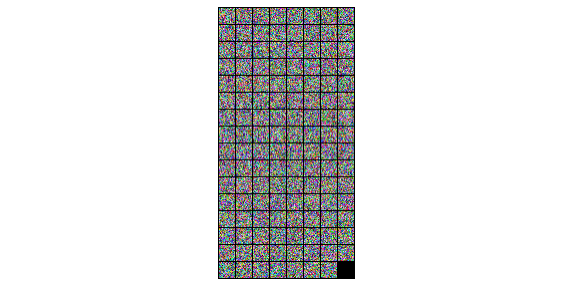

In [ ]:
import sys
from skimage import io
import torchvision.utils as vutils

##function for printing the loss during optimization
def write_flush(text, stream=sys.stdout):
    stream.write(text)
    stream.flush()
    return

## Number of feature maps in the intermediate layer that you have chosen. 
# *****START CODE
n_conv =  127
# *****END CODE

## Size of visualised filter.
img_size = 16

##load your optimal model
# *****START CODE
#I CHANGED THE MODEL NAME TO NET TO SEPARATE BOTH SECTIONS OF THE ASSIGNMENT
net = ConvNet()
net.load_state_dict(torch.load('/content/gdrive/My Drive/Colab Notebooks/FDL/model.pt')) 
# *****END CODE

## Create a submodel, until the intermediate layer of your choice.
## Hint: Use model.#name# to create the succession of layers, where #name#
## stands for the layer names that you defined in the initialization function 
## of your model.
# *****START CODE
submodel = nn.Sequential(
  net.conv1,
  net.batchnorm1,
  net.act1,
  net.conv2,
  net.batchnorm2,
  net.act2,
  net.pool1,
  net.conv3,

)

# *****END CODE

## Put submodel in eval mode.
submodel.eval()

## Tensor to visualised filters. 
img_stack = torch.zeros((n_conv, 3, img_size, img_size))

## Number of epochs to run for every filter. 
# *****START CODE
n_epochs_per_filt = 40   #e.g 30
# *****END CODE

## Visualise every convolution. 
for c in range(n_conv):
    ## Initialise with random image. 
    img = torch.rand(1, 3, img_size, img_size).float()

    ## Turn on gradient calculation on the image
    # *****START CODE
    img.requires_grad_(True)

    # *****END CODE

    ## Define optimizer.
    # *****START CODE
    optimizer = torch.optim.Adam([img], lr = 0.001)
    # *****END CODE
    
    for f in range(n_epochs_per_filt):
        optimizer.zero_grad()

        # *****START CODE
        output = submodel(img)
        loss = -1 * torch.sum(F.relu(output[0][c]))
        loss.backward()
        optimizer.step()

        
        # *****END CODE
        write_flush('\rFilter %d. Epoch %d. Loss = %.4f'%(c, f+1, loss.item()))

    write_flush('\n')
    img_stack[c, :, :, :] = img[0].detach()


G = vutils.make_grid(img_stack, nrow=8, normalize=True, padding=1).permute(1,2,0).numpy()
plt.figure(figsize=(10,5))
plt.imshow(G)
plt.axis('equal')
plt.axis('off')
plt.show()

1f) Use GradCAM algorithm to visualize the saliency maps of your trained model at the same intermediate layer
*   Install pytorch grad cam package if needed (https://github.com/jacobgil/pytorch-grad-cam)
*   Complete the following code that visualizes GradCAM heatmaps on an input image from your model
*   Try on several input images / classes. 
*   Write a small description commenting on the visualized heatmaps. 

In [ ]:
# Install pytorch grad cam package

!pip install grad-cam

     |████████████████████████████████| 4.5 MB 8.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.3.7-py3-none-any.whl size=25953 sha256=657f24d4c467efa618d24c8b3a519bb6d525693b3b97c0da2eb43e361aaa4bf1
  Stored in directory: /root/.cache/pip/wheels/30/ab/9c/53c523785edffdc6c61755cf82e0dac3342d0d36190c187894
Successfully built grad-cam


In [ ]:
train_features, train_labels = next(iter(train_loader))
train_features= train_features.cpu()
train_labels

tensor([4, 9, 7, 8, 7, 7, 4, 1, 6, 8, 0, 8, 4, 7, 5, 8, 2, 1, 2, 7, 8, 6, 7, 7,
        0, 4, 7, 0, 9, 7, 0, 2, 3, 7, 2, 9, 8, 3, 3, 8])

In [ ]:
len(train_features)

40

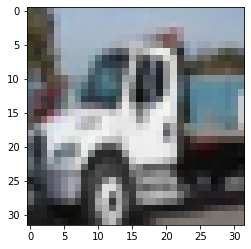

In [ ]:
plt.imshow(np.transpose(train_features[1], (1, 2, 0))) 

In [ ]:
train_labels= train_labels.cpu()

In [ ]:
input_tensor = torch.unsqueeze(train_features[2], 0)

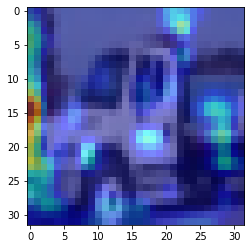

In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
use_cuda = True

# *****START CODE
model = ConvNet()
model.load_state_dict(torch.load('/content/gdrive/My Drive/Colab Notebooks/FDL/model.pt'))

# Get your intermediate layer
target_layers = [model.conv3]

rgb_img = np.transpose(train_features[1], (1, 2, 0))
# Create an input tensor from your image for your model..
input_tensor = torch.unsqueeze(train_features[2], 0)

# Note: input_tensor can be a batch tensor with several images!
target_category = train_labels[1]
# *****END CODE

# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=use_cuda)

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img.numpy().reshape((32, 32, 3)), grayscale_cam, use_rgb=True)

# Plot figure
plt.figure()
plt.imshow(visualization)

## 2. Layer #28

In [ ]:
print('My intermediate layer to visualize is: %s'%(my_architecture_dict['Layer_028']))

My intermediate layer to visualize is: {'input': 510, 'kernel_size': 3, 'output': 510, 'padding': 1, 'type': 'Conv2d'}


Filter 0. Epoch 40. Loss = -0.0000
Filter 1. Epoch 40. Loss = -0.3226
Filter 2. Epoch 40. Loss = -0.0000
Filter 3. Epoch 40. Loss = -0.0000
Filter 4. Epoch 40. Loss = -0.0000
Filter 5. Epoch 40. Loss = -0.0000
Filter 6. Epoch 40. Loss = -0.1258
Filter 7. Epoch 40. Loss = -0.0000
Filter 8. Epoch 40. Loss = -0.0935
Filter 9. Epoch 40. Loss = -0.0704
Filter 10. Epoch 40. Loss = -0.2795
Filter 11. Epoch 40. Loss = -0.1900
Filter 12. Epoch 40. Loss = -0.1324
Filter 13. Epoch 40. Loss = -0.0000
Filter 14. Epoch 40. Loss = -0.1587
Filter 15. Epoch 40. Loss = -0.2560
Filter 16. Epoch 40. Loss = -0.4594
Filter 17. Epoch 40. Loss = -0.1142
Filter 18. Epoch 40. Loss = -0.1503
Filter 19. Epoch 40. Loss = -0.3811
Filter 20. Epoch 40. Loss = -0.2182
Filter 21. Epoch 40. Loss = -0.1143
Filter 22. Epoch 40. Loss = -0.1386
Filter 23. Epoch 40. Loss = -0.1491
Filter 24. Epoch 40. Loss = -0.2500
Filter 25. Epoch 40. Loss = -0.0000
Filter 26. Epoch 40. Loss = -0.0000
Filter 27. Epoch 40. Loss = -0.0000
Fi

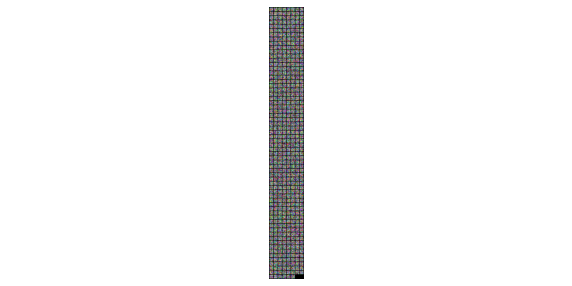

In [ ]:
import sys
from skimage import io
import torchvision.utils as vutils

##function for printing the loss during optimization
def write_flush(text, stream=sys.stdout):
    stream.write(text)
    stream.flush()
    return

## Number of feature maps in the intermediate layer that you have chosen. 
# *****START CODE
n_conv =  510
# *****END CODE

## Size of visualised filter.
img_size = 8

##load your optimal model
# *****START CODE


#I CHANGED THE MODEL NAME TO NET TO SEPARATE BOTH SECTIONS OF THE ASSIGNMENT TO PREVENT ERRORS
net = ConvNet()
net.load_state_dict(torch.load('/content/gdrive/My Drive/Colab Notebooks/FDL/model.pt')) 


# *****END CODE

## Create a submodel, until the intermediate layer of your choice.
## Hint: Use model.#name# to create the succession of layers, where #name#
## stands for the layer names that you defined in the initialization function 
## of your model.
# *****START CODE
submodel = nn.Sequential(
  net.conv1,
  net.batchnorm1,
  net.act1,
  net.conv2,
  net.batchnorm2,
  net.act2,
  net.pool1,
  net.conv3,
  net.batchnorm3,
  net.act3,
  net.conv4, 
  net.batchnorm4,
  net.act4,
  net.pool2,
  net.conv5,
  net.batchnorm5,
  net.act5,
  net.conv6,
  net.batchnorm6,
  net.act6,
  net.conv7,
  net.batchnorm7,
  net.act7,
  net.pool3,
  net.conv8,
  net.batchnorm8,
  net.act8,
  net.conv9

)

# *****END CODE

## Put submodel in eval mode.
submodel.eval()

## Tensor to visualised filters. 
img_stack = torch.zeros((n_conv, 3, img_size, img_size))

## Number of epochs to run for every filter. 
# *****START CODE
n_epochs_per_filt = 40   #e.g 30
# *****END CODE

## Visualise every convolution. 
for c in range(n_conv):
    ## Initialise with random image. 
    img = torch.rand(1, 3, img_size, img_size).float()

    ## Turn on gradient calculation on the image
    # *****START CODE
    img.requires_grad_(True)

    # *****END CODE

    ## Define optimizer.
    # *****START CODE
    optimizer = torch.optim.Adam([img], lr = 0.001)
    # *****END CODE
    
    for f in range(n_epochs_per_filt):
        optimizer.zero_grad()

        ## Feedforward propagation

        # *****START CODE
        output = submodel(img)
        loss = -1 * torch.sum(F.relu(output[0][c]))
        loss.backward()
        optimizer.step()

        
        # *****END CODE
        write_flush('\rFilter %d. Epoch %d. Loss = %.4f'%(c, f+1, loss.item()))

    write_flush('\n')
    img_stack[c, :, :, :] = img[0].detach()

G = vutils.make_grid(img_stack, nrow=8, normalize=True, padding=1).permute(1,2,0).numpy()
plt.figure(figsize=(10,5))
plt.imshow(G)
plt.axis('equal')
plt.axis('off')
plt.show()

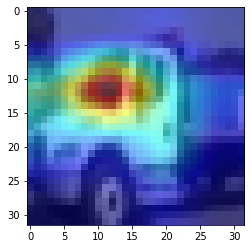

In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
use_cuda = True

# *****START CODE
model = ConvNet()
model.load_state_dict(torch.load('/content/gdrive/My Drive/Colab Notebooks/FDL/model.pt'))

# Get your intermediate layer
target_layers = [model.conv9]

rgb_img = np.transpose(train_features[1], (1, 2, 0))
# Create an input tensor from your image for your model..
input_tensor = torch.unsqueeze(train_features[2], 0)

# Note: input_tensor can be a batch tensor with several images!
target_category = train_labels[1]
# *****END CODE

# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=use_cuda)

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img.numpy().reshape((32, 32, 3)), grayscale_cam, use_rgb=True)


# Plot figure
plt.figure()
plt.imshow(visualization)


### Question 2 - Train on geometrical shapes

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

Function 'generate_a_triangle' produces images depicting random triangles along with the (x,y) coordinates of the vertices. Create a convolutional neural network that receives as input the triangle image and predicts the corresponding (x,y) coordinates of the triangle's vertices. 
*  Read and understand the following code

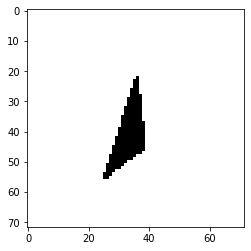

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_triangle():
    figsize = 1.0
    U = np.random.random(3)
    V = np.random.random(3)
    imdata = generate_a_drawing(figsize, U, V)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

[im, v] = generate_a_triangle()
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

def generate_dataset_regression(nb_samples):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle()
    X = X / 255
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300)
    return [X_test, Y_test]

2a) Use function 'generate_dataset_regression' to create the dataset. Split the dataset to training and validation parts.

In [ ]:
##generate dataset
# *****START CODE
train_set= generate_dataset_regression(1000)
# *****END CODE

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [ ]:
##split the dataset to training and validation parts
# *****START CODE
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_set[0], train_set[1], test_size=0.1)
print(X_train.shape)
print(y_train.shape)


(900, 5184)
(900, 6)


In [ ]:
import numpy as np

2b) Use function 'generate_test_set' to create the testing dataset.

In [ ]:
##generate test dataset
# *****START CODE
test_set = generate_test_set_regression()
# *****END CODE

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


2c) Create your own convolutional neural network.
* Begin with the previous exercise model architecture
* Optimize the architecture to perform well on predicting the different coordinates

In [ ]:
#I started with the generated architecture, it wasn't performing the best, so I changed it a little bit below. 

In [ ]:
#This is the architecture that was generated by the URL.

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        self.conv1= nn.Conv1d(1, 66, 3, padding= 1) # 32x32 #L001
        self.batchnorm1 = nn.BatchNorm1d(66) #L002
        self.act1 = nn.ReLU(inplace=False) #L003
        self.conv2 = nn.Conv1d(66,66, 3, padding=1) #L004

        self.batchnorm2 = nn.BatchNorm1d(66) #L005
        self.act2 = nn.ReLU(inplace=False) #L006
        self.pool1 = nn.MaxPool1d(2, stride=2) #L007     16x16
        self.conv3 = nn.Conv1d(66,127,3,padding=1) #L008

        self.batchnorm3 = nn.BatchNorm1d(127)
        self.act3 = nn.ReLU(inplace=False) #10
        self.conv4 = nn.Conv1d(127,127,3,padding=1) 
        self.batchnorm4 = nn.BatchNorm1d(127)

        self.act4 = nn.ReLU(inplace=False)
        self.pool2 = nn.MaxPool1d(2,stride=2)    # 8x8
        self.conv5 = nn.Conv1d(127,252, 3, padding=1) #15
        self.batchnorm5 = nn.BatchNorm1d(252)

        self.act5 = nn.ReLU(inplace=False) #L017
        self.conv6 = nn.Conv1d(252,252, 3, padding=1) #L018
        self.batchnorm6 = nn.BatchNorm1d(252) #L019
        self.act6 = nn.ReLU(inplace=False) #L020

        self.conv7= nn.Conv1d(252,252, 3, padding=1)
        self.batchnorm7 = nn.BatchNorm1d(252)
        self.act7 = nn.ReLU(inplace=False)
        self.pool3 = nn.MaxPool1d(2,stride=2)  #4x4

        self.conv8 = nn.Conv1d(252,510, 3, padding=1) #L025
        self.batchnorm8 = nn.BatchNorm1d(510)
        self.act8= nn.ReLU(inplace=False)
        self.conv9 = nn.Conv1d(510,510, 3, padding=1) 

        self.batchnorm9 = nn.BatchNorm1d(510)
        self.act9 = nn.ReLU(inplace=False) #L030
        self.conv10 = nn.Conv1d(510,510, 3, padding=1)
        self.batchnorm10 = nn.BatchNorm1d(510)

        self.act10 = nn.ReLU(inplace=False)
        self.pool4 = nn.MaxPool1d(2,stride=2)  #2x2
        self.conv11 = nn.Conv1d(510,510, 3, padding=1) #L035
        self.batchnorm11 = nn.BatchNorm1d(510)

        self.act11 = nn.ReLU(inplace=False)
        self.conv12 = nn.Conv1d(510,510, 3, padding=1)
        self.batchnorm12 = nn.BatchNorm1d(510)
        self.act12 = nn.ReLU(inplace=False) #L040

        self.conv13 = nn.Conv1d(510,510, 3, padding=1) #L040
        self.batchnorm13 = nn.BatchNorm1d(510)
        self.act13 = nn.ReLU(inplace=False)
        self.pool5 = nn.MaxPool1d(2,stride=2)  

    #    self.adaptativeavgpool2d_1 = nn.AdaptiveAvgPool2d(1)  
        self.drop = nn.Dropout(p=0.5006913449946377, inplace=False)
        self.f1 = nn.Linear(in_features= 82620 , out_features= 2145)

        self.act14 = nn.ReLU(inplace=False)
        self.f2 = nn.Linear(in_features = 2145, out_features= 6)


    def forward(self, x):
 
        x= self.conv1(x)
        x= self.batchnorm1(x)
        x= self.act1(x)
        x= self.conv2(x)
     
        x= self.batchnorm2(x)
        x= self.act2(x)
        x= self.pool1(x)
        x= self.conv3(x)

        x= self.batchnorm3(x)
        x= self.act3(x)
        x= self.conv4(x) 
        x= self.batchnorm4(x)

        x= self.act4(x)
        x= self.pool2(x)
        x= self.conv5(x)
        x= self.batchnorm5(x)

        x= self.act5(x)
        x= self.conv6(x)
        x= self.batchnorm6(x)
        x= self.act6(x)
        
        x= self.conv7(x)
        x= self.batchnorm7(x)
        x= self.act7(x)
        x= self.pool3(x)

        x= self.conv8(x)
        x= self.batchnorm8(x)
        x= self.act8(x)
        x= self.conv9(x)

        x= self.batchnorm9(x)
        x= self.act9(x)
        x= self.conv10(x)
        x= self.batchnorm10(x)
        
        x= self.act10(x)
        x= self.pool4(x)
        x= self.conv11(x)
        x= self.batchnorm11(x)

        x= self.act11(x)
        x= self.conv12(x)
        x= self.batchnorm12(x)
        x= self.act12(x)

        x= self.conv13(x)
        x= self.batchnorm13(x)
        x= self.act13(x)
        x= self.pool5(x)

    #    x= self.adaptativeavgpool2d_1(x)
        x= self.drop(x)
        x = torch.flatten(x, 1)
        x= self.f1(x)
        x= self.act14(x)

        x= self.f2(x)

        return x

In [ ]:
#Changing it here and using this model for training


class Conv(nn.Module):
    def __init__(self):
        super(Conv, self).__init__()
        self.conv1= nn.Conv1d(in_channels= 1, out_channels= 52, kernel_size=3, padding= 1) # 32x32x3 
        self.batchnorm1 = nn.BatchNorm1d(52)

        self.act1 = nn.ReLU(inplace=False)
        self.conv2 = nn.Conv1d(52,52, 3, padding=1)
        self.batchnorm2 = nn.BatchNorm1d(52)
        self.act2 = nn.ReLU(inplace=False)
        self.pool1 = nn.MaxPool1d(2, stride=2) # 16x16x52
        self.conv3 = nn.Conv1d(52,124,3,padding=1)  
        self.batchnorm3 = nn.BatchNorm1d(124)
        self.act3 = nn.ReLU(inplace=False)
        self.conv4 = nn.Conv1d(124,124,3,padding=1) #LAYER 11
        self.batchnorm4 = nn.BatchNorm1d(124)

        self.act4 = nn.ReLU(inplace=False)
        self.pool2 = nn.MaxPool1d(2,stride=2)    # 8x8x124
        self.conv5 = nn.Conv1d(124,250, 3, padding=1)
        self.batchnorm5 = nn.BatchNorm1d(250)
        self.act5 = nn.ReLU(inplace=False)
        self.conv6 = nn.Conv1d(250,250, 3, padding=1)
        self.batchnorm6 = nn.BatchNorm1d(250)

        self.act6 = nn.ReLU(inplace=False)
        self.pool3 = nn.MaxPool1d(2,stride=2)  # 4x4x250
        self.conv7 = nn.Conv1d(250,503, 3, padding=1)
        self.batchnorm7 = nn.BatchNorm1d(503)
        self.act7 = nn.ReLU(inplace=False)
        self.conv8 = nn.Conv1d(503,503, 3, padding=1)
        self.batchnorm8 = nn.BatchNorm1d(503)
        self.act8 = nn.ReLU(inplace=False)
        self.pool4 = nn.MaxPool1d(2,stride=2)  #2x2x503
        self.conv9 = nn.Conv1d(503,503, 3, padding=1)
        self.batchnorm9 = nn.BatchNorm1d(503)
        self.act9 = nn.ReLU(inplace=False)
        self.conv10 = nn.Conv1d(503,503, 3, padding=1)
        self.batchnorm10 = nn.BatchNorm1d(503)
        self.act10 = nn.ReLU(inplace=False)
        self.pool5 = nn.MaxPool1d(2,stride=2)  # 1x 1 x 32192
        self.drop = nn.Dropout(p=0.4237731881067131, inplace=False)
        self.f1 = nn.Linear(in_features= 81486 , out_features= 2303) #input= 503*8*8 
        self.act11 = nn.ReLU(inplace=False)
        self.f2 = nn.Linear(in_features = 2303, out_features= 3158)
        self.act12 = nn.ReLU(inplace=False)
        self.f3 = nn.Linear(in_features= 3158, out_features=6) #compute output  1x1x10

    def forward(self, x):
        x= self.conv1(x)
        x = self.batchnorm1(x)
        x= self.act1(x)
        x= self.conv2(x)
        x = self.batchnorm2(x)
        x= self.act2(x)
        x= self.pool1(x)
        x= self.conv3(x)
        x = self.batchnorm3(x)
        x= self.act3(x)
        x= self.conv4(x)
        x = self.batchnorm4(x)
        x= self.act4(x)
        x= self.pool2(x)
        x= self.conv5(x)
        x = self.batchnorm5(x)
        x= self.act5(x)
        x= self.conv6(x)
        x = self.batchnorm6(x)
        x= self.act6(x)
        x= self.pool3(x)
        x= self.conv7(x)
        x = self.batchnorm7(x)
        x= self.act7(x)
        x= self.conv8(x)
        x = self.batchnorm8(x)
        x= self.act8(x)
        x= self.pool4(x)
        x= self.conv9(x)
        x = self.batchnorm9(x)
        x= self.act9(x)
        x= self.conv10(x)
        x = self.batchnorm10(x)
        x= self.act10(x)
        x= self.pool5(x)
        x= self.drop(x)
        x= torch.flatten(x, 1)
        x= self.f1(x)
        x= self.act11(x)
        x= self.f2(x)
        x= self.act12(x)
        x= self.f3(x)
        return x
      #  return F.log_softmax(x, dim=1)

2d) Define learning rate, model, optimizer, criterion and number of epochs.

In [ ]:
# *****START CODE
lr = 0.01
model= Conv()
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.MSELoss()
criterion= criterion.to(device)
epochs = 10
# *****END CODE

2e) What criterion did you choose and why?
* Write a small description for the loss function that you want to use for this specific problem.
* What was your intuition for using this loss?

****** Answer

---


Mean Squared Error is the average of the squared differences of the predicted Vs. the actual values. 

Here, I used MSE loss function. And this is because what we care about the most is the difference between the actual value and the predicted one. Since this is not a classification problem, it's similar to a regression where you are trying to predict the coordinates which, in our case, are locations on images.

However, in the previous questions, we were using CrossEntropy because we mostly cared about the probability of classification to each class. 

2f) Train your model and validate it at the end of each epoch.
* Similarly to the previous question train and validate your network for each epoch
* Write a small description on how you decide which is the optimal epoch
* Use this epoch and evaluate your model on the test set
* Visualise some predictions using the function 'visualize_prediction'
* What do you observe?

2g) Think and implement a preprocessing step that can boost the accuracy of your network

In [ ]:
# *****START CODE
# Prepare training and validation tensors
from torch.utils.data import TensorDataset, DataLoader
# Train model
tensor_x_train = torch.Tensor(X_train)
tensor_y_train = torch.Tensor(y_train)

tensor_x_train = torch.unsqueeze(tensor_x_train, 1)

train_dataset = TensorDataset(tensor_x_train,tensor_y_train)
train_dataloader = DataLoader(train_dataset)

# Prepare validation tensors
tensor_x_val = torch.Tensor(X_val)
tensor_y_val = torch.Tensor(y_val)

tensor_x_val = torch.unsqueeze(tensor_x_val, 1) # add a dimension

val_dataset = TensorDataset(tensor_x_val, tensor_y_val)
val_dataloader = DataLoader(val_dataset)

# *****END CODE

In [ ]:
# *****START CODE
import numpy as np
from tqdm import tqdm

mean_train_loss = []
mean_val_loss = []

for epoch in range(epochs):

    train_losses = []
    val_losses = []
    
    # Train model
    model.train()

    for i, data in enumerate(tqdm(train_dataloader)):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward and backward and optimization of weights
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Prepare for printing
        train_losses.append(loss.item())
    mean_train_loss.append(np.mean(train_losses))

    # Evaluate model
    model.eval()

    for i, data in enumerate(tqdm(val_dataloader)):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward and backward and optimization of weights
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Prepare for printing
        val_losses.append(loss.item())
    mean_val_loss.append(np.mean(val_losses))

    print("Train Loss for epoch:", epoch, "is:", np.mean(train_losses))
    print("Validation Loss for epoch:", epoch, "is:", np.mean(val_losses))
    print("\n")

print('Model is trained!')


# *****END CODE

100%|██████████| 100/100 [00:00<00:00, 243.40it/s]


Train Loss for epoch: 0 is: 0.07802061173107681
Validation Loss for epoch: 0 is: 0.07421108746901155




100%|██████████| 100/100 [00:00<00:00, 242.06it/s]


Train Loss for epoch: 1 is: 0.06147585823614564
Validation Loss for epoch: 1 is: 0.07425189953297377




100%|██████████| 100/100 [00:00<00:00, 243.38it/s]


Train Loss for epoch: 2 is: 0.058803955221341714
Validation Loss for epoch: 2 is: 0.07833155713044107




100%|██████████| 100/100 [00:00<00:00, 243.21it/s]


Train Loss for epoch: 3 is: 0.05533920529919366
Validation Loss for epoch: 3 is: 0.08410744486376644




100%|██████████| 100/100 [00:00<00:00, 242.30it/s]


Train Loss for epoch: 4 is: 0.04951485319425249
Validation Loss for epoch: 4 is: 0.08300454020500184




100%|██████████| 100/100 [00:00<00:00, 243.49it/s]


Train Loss for epoch: 5 is: 0.03898912056737269
Validation Loss for epoch: 5 is: 0.08522799510508776




100%|██████████| 100/100 [00:00<00:00, 243.47it/s]


Train Loss for epoch: 6 is: 0.025486318643023777
Validation Loss for epoch: 6 is: 0.08505823126994073




100%|██████████| 100/100 [00:00<00:00, 244.65it/s]


Train Loss for epoch: 7 is: 0.017414155462756754
Validation Loss for epoch: 7 is: 0.08344062064774334




100%|██████████| 100/100 [00:00<00:00, 242.41it/s]


Train Loss for epoch: 8 is: 0.014713734353297493
Validation Loss for epoch: 8 is: 0.08578441857825965




100%|██████████| 100/100 [00:00<00:00, 242.95it/s]

Train Loss for epoch: 9 is: 0.012213013275435919
Validation Loss for epoch: 9 is: 0.08581921269185841


Model is trained!


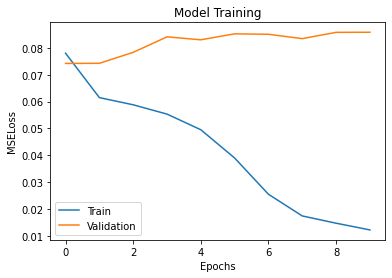

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mean_train_loss, label ='Train')
plt.plot(mean_val_loss, label = 'Validation')
plt.xlabel("Epochs")
plt.ylabel("MSELoss")
plt.title('Model Training')
plt.legend()

In [ ]:
X_test = test_set[0]
y_test = test_set[1]

x_test_tensor = torch.Tensor(X_test) 
y_test_tensor = torch.Tensor(y_test) 
x_test_tensor = torch.unsqueeze(x_test_tensor, 1)

test_dataset = TensorDataset(x_test_tensor,y_test_tensor)
test_dataloader = DataLoader(test_dataset)

In [ ]:

output = []

with torch.no_grad():

    for data in tqdm(test_dataloader):
        inputs, labels = data

        #move to cuda
        inputs = inputs.to(device)
        labels = labels.to(device)

        #get the outputs to display
        outputs = model(inputs)
        output.append(outputs.cpu().detach().numpy())

100%|██████████| 300/300 [00:01<00:00, 251.37it/s]


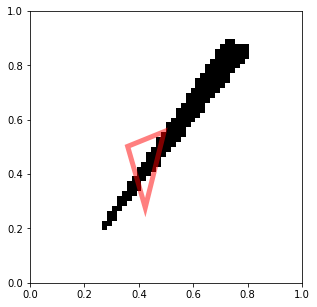

In [ ]:
#vISUALIZE OUTPUT
visualize_prediction(test_set[0][1], output[1])

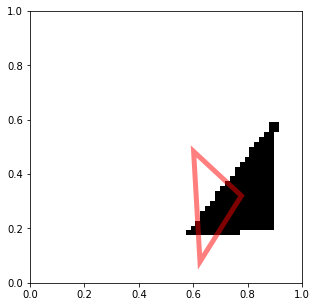

In [ ]:
# VISUALIZE OUTPUT
visualize_prediction(test_set[0][2], output[2])

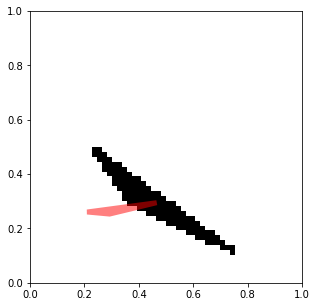

In [ ]:
#VISUALIZE OUTPUT
visualize_prediction(test_set[0][10], output[10])

##Answers to questions


---



I trained using different epochs and epoch=10 is where the model would usually converge. 

What I observe is that the model is not accurate or reliable to actually get the coordinates (it needs more hyperparameter tuning and model changes for optimization and improvement)


However, we can also see that in most cases, the predicted triangles are usually around the center. This means that this model would be more accurate to predict the center of the triangle on the images but it requires improvement to be reliable for more accurate coordinate predictions.